# EDA of the data
* Performing an EDA of the data to discover preliminary patterns and problems which we will use in our preprocessing of the data

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, MinMaxScaler
from datetime import datetime
from tqdm.notebook import tqdm #lets us display pretty progress bars for loops
import seaborn as sns
from datetime import timedelta
from datetime import date
from dateutil.relativedelta import relativedelta
import random #used for randomly selecting which plots to display (as there are a lot)

In C:\Users\psydm7\Anaconda3\envs\mle_tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\psydm7\Anaconda3\envs\mle_tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\psydm7\Anaconda3\envs\mle_tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\psydm7\Anaconda3\envs\mle_tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\psydm7\Anaconda3\envs\mle_tf

# Setting up display options for pandas

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# Loading the data
* Try to load from pickle file as it is quicker to access
* If this fails, load the original CSV and save it to a pickle file

* Hence we are only looking into addInfo and consumption

In [3]:
#try to load pickle file as it is quicker
try:
    df_energy = pd.read_pickle("../Data/Original_Data/consumption.pkl")
    print("Loading consumption via pickle")
# if the file was not found then load the csv then save it to pickle for future loads
except:
    print("Loading consumption via csv")
    df_energy = pd.read_csv("../Data/Original_Data/consumption.csv")
    df_energy.to_pickle("../Data/Original_Data/consumption.pkl")

    #try to load pickle file as it is quicker
try:
    df_info = pd.read_pickle("../Data/Original_Data/addInfo.pkl")
    print("Loading addInfo via pickle")
# if the file was not found then load the csv then save it to pickle for future loads
except:
    print("Loading addInfo via csv")
    df_info = pd.read_csv("../Data/Original_Data/addInfo.csv")
    df_info.to_pickle("../Data/Original_Data/addInfo.pkl")

Loading consumption via pickle
Loading addInfo via pickle


# Inspecting df_energy and df_info

In [4]:
# inspecting the values of the dataframe
df_energy

,meter_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,2017-01-01 04:30:00,2017-01-01 05:00:00,2017-01-01 05:30:00,2017-01-01 06:00:00,2017-01-01 06:30:00,2017-01-01 07:00:00,2017-01-01 07:30:00,2017-01-01 08:00:00,2017-01-01 08:30:00,2017-01-01 09:00:00,2017-01-01 09:30:00,2017-01-01 10:00:00,2017-01-01 10:30:00,2017-01-01 11:00:00,2017-01-01 11:30:00,...,2017-12-31 11:30:00,2017-12-31 12:00:00,2017-12-31 12:30:00,2017-12-31 13:00:00,2017-12-31 13:30:00,2017-12-31 14:00:00,2017-12-31 14:30:00,2017-12-31 15:00:00,2017-12-31 15:30:00,2017-12-31 16:00:00,2017-12-31 16:30:00,2017-12-31 17:00:00,2017-12-31 17:30:00,2017-12-31 18:00:00,2017-12-31 18:30:00,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.126,0.094,0.070,0.064,0.075,0.063,0.078,0.804,0.183,0.149,0.238,0.351,0.108,0.077,0.059,0.052,0.091,0.083,0.082,0.090,0.074,0.092,0.076,0.055,0.036
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.212,0.170,0.078,0.092,0.102,0.253,0.383,0.068,0.077,0.085,0.594,0.413,0.277,0.315,0.691,0.402,0.639,0.537,0.834,0.868,0.394,0.073,0.077,0.049,0.048
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005,0.029,0.196,0.134,0.069,0.067,0.025,0.026,0.020,0.014,0.032,0.019,0.107,0.104,0.124,0.110,0.123,0.012,0.034,0.006,0.027,0.001,0.044,0.004,0.035
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.104,0.039,0.120,0.063,0.078,0.111,0.074,0.103,0.635,0.421,0.466,0.087,0.052,0.115,0.150,0.118,0.096,0.135,0.041,0.018,0.057,0.018,0.038,0.040,0.014
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.545,0.150,0.498,1.165,1.054,0.498,0.199,0.058,0.019,0.068,0.077,0.060,0.024,0.026,0.016,0.022,0.010,0.036,0.006,0.024,0.014,0.028,0.006,0.024,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0.011,1.089,0.014,0.204,0.015,0.159,0.014,0.013,0.174,0.013,0.014,0.014,0.014,0.189,0.015,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,0.195,0.181,0.177,0.184,0.198,0.177,0.182,0.180,0.196,0.182,0.177,0.181,0.203,0.176,0.183,0.176,0.200,0.184,0.177,0.182,0.201,0.181,0.181,0.177,0.198
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,0.015,1.523,0.105,0.296,0.067,0.171,0.025,0.260,0.013,0.024,0.012,0.178,0.018,0.454,0.290,1.228,1.228,1.229,1.199,1.075,0.021,0.009,0.019,0.011,...,0.009,0.008,0.016,0.028,0.008,0.009,0.009,0.015,0.028,0.009,0.012,0.023,0.034,0.040,0.025,0.022,0.009,0.028,0.020,0.010,0.009,0.008,0.033,0.015,0.013
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0.222,0.276,0.097,0.058,0.045,0.045,0.038,0.034,0.043,0.044,0.046,0.033,0.038,0.043,0.056,0.250,0.187,0.207,0.182,0.164,0.144,0.055,0.052,0.051,...,0.181,0.195,0.462,0.631,0.203,0.189,0.242,0.264,0.187,0.479,0.316,0.275,0.503,0.422,0.343,0.144,0.169,0.145,0.200,0.170,0.127,0.135,0.200,0.118,0.106
3246,0x47218b46abb2fcaade487a211911406dc6e13730,0.195,2.881,1.765,1.391,1.609,1.362,1.352,1.321,0.701,0.784,0.587,0.788,0.636,0.728,0.097,0.061,0.177,0.097,0.136,0.128,0.114,0.109,0.152,0.147,...,0.116,0.126,0.118,0.136,0.126,0.137,0.138,0.158,0.220,0.215,0.511,0.717,0.647,0.653,0.330

In [5]:
# inspecting the shape of the dataframe
df_energy.shape

(3248, 17521)

In [6]:
# inspecting the values of the dataframe
df_info

,meter_id,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,terraced_house,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,semi_detached_house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,0xb9c600842cb2d195d461d675f2758ddbf5bb45bb,terraced_house,2.0,2.0,gas,gas,old,y,n,18_to_20,75_to_100,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0
2139,0x429e76a41f3141d9e62c4975e6b5df303cb45e64,bungalow,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,0x65fbd9ba598e703d742a32058ea2b323fe4c1fca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,0x101f2dc409b3b95d2bb08ebe5d282f54317e3f8c,bungalow,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# inspecting the shape of the dataframe
df_info.shape

(2143, 24)

#### Conclusions to be drawn

* Can see that df_info only has entries for 2140 of the 3248 possible rows
* Must add the missing rows filled with NaN
    * Done in the EDA on AddInfo section where we simply join based on meter_id

# EDA on consumption

In [8]:
# how many missing values?
number_of_missing = df_energy.isnull().sum().sum()
number_of_there = df_energy.notnull().sum().sum()
print(number_of_missing)
print(number_of_there)
print(str(round(number_of_missing/(number_of_missing+number_of_there)*100,2))+str("%"))

29378388
27529820
51.62%


##### Conclusions:
* Large number of missing values hence we must find a way to deal with that

        
## Function for resampling into different time periods (will need this a lot)


* df_energy = the dataframe we are wanting to reschedule up
* file_name = name of file we will save it as
* resample_size = "D" or "M" or "W" corresponding to what period we are resampling into
* NaN_staregy
    * ignore : ignore nans and sum up rows regardless
    * removeColumn : if a nan is present in the column corresponding to the new column entry for this row, and set it to nan
    * imputeMean : if a nan is present in the columns corresponding to the new column entry for this row, treat them as the mean of the known values and sum up anyway for a reasonable estimate of what the total would have been

In [10]:
# only currently using this for days but may experiment with the months and weeks if have enough time
def resample_to_different_time(df_energy, file_name, resample_size, NaN_strategy):
    meter_id=df_energy["meter_id"]
    df_energy_new = pd.DataFrame(columns=["meter_id"])
    df_energy_new["meter_id"] = meter_id

    #for date of the resample size in the range of dates
    for new_sample in tqdm(pd.date_range(datetime(2017, 1, 1), datetime(2017, 12, 31), freq = resample_size),position=0):
        
        #get this columns name as a string
        if(resample_size=="M"):
            columnName = str(new_sample.date())[:7]
        elif(resample_size=="D" or resample_size=="W"):
            columnName = str(new_sample.date())
        else:
            return

        #if this isn't a week we can simply take those that start with the new columnName
        if(resample_size!="W"):
            #get all columns that relate to this new sample
            columns = [i for i in df_energy.columns.values[1:] if i.startswith(columnName)]
            
        #if it is a week be a bit more fancy find the days in the range of this week
        else:
            columns = []
            #for each day in range of this week
            for weeks_day in pd.date_range(new_sample, new_sample+timedelta(days=6), freq="D"):
                #get todays name as a string
                dayName = str(weeks_day.date())
                #get all columns that relate to this day
                dayColumns = [i for i in df_energy.columns.values[1:] if i.startswith(dayName)]
                #add it to the week total
                columns = columns+dayColumns
                
        #if we do not want to accept nans in our new columns
        if(NaN_strategy!="ignore"):
            #get series saying sum of nans in each row for the columns corresponding to this new column
            series_bool_contains_nulls = df_energy[columns].apply(lambda row: row.isnull().sum().sum(), axis=1)
            
            #for each rows boolean contains nulls truth value
            for row_id in tqdm(range(len(series_bool_contains_nulls)), position=1, leave=False):
                #this rows corresponding count of nulls
                num_contains_null=series_bool_contains_nulls[row_id]
                
                #if this row contains nulls....
                if(num_contains_null>1):
                    # if our nan strategy is setting the entire column to nan then do that
                    if(NaN_strategy=="removeColumn"):
                        #print(columnName,str(meter_id[row_id]),"(",str(row_id),") contains a null, setting this column to null")
                        df_energy_new.at[row_id,columnName]=np.nan
                        
                    # if our nan strategy is treating each nan as the groups mean then calculate the sum + add the mean * count of nums
                    # effectively imputing the nan entries as the mean to get a reasonable guess of what the total is
                    elif(NaN_strategy=="imputeMean"):
                        rowMean = df_energy[columns].iloc[row_id].mean(skipna=True)
                        #print(columnName,str(meter_id[row_id]),"(",str(row_id),") contains",num_contains_null,"null\n",num_contains_null,"*",rowMean,"=",rowMean*num_contains_null)
                        df_energy_new.at[row_id,columnName]=(df_energy[columns].iloc[row_id].sum()+(rowMean * num_contains_null))
                    
                    # else we aren't using a valid nan strategy so return
                    else:
                        return
                        
                #else this row doesn't contain nulls set it's corresponding cell in the new column to the sum
                else:
                    df_energy_new.at[row_id,columnName]=df_energy[columns].iloc[row_id].sum()

        #else we don't care if it contains nans or not so just sum up these columns to our new day    
        else:
            #sum these up into a value for the new sample size
            df_energy_new[columnName] = df_energy[columns].sum(axis=1)
    
    #if we leave file name blank we don't want to save
    if(file_name!=""):
        #saving the dataframe
        #if(os.path.exists(f"../Data/Preprocessed_Data/{file_name}.pkl")==False):
        #    df_energy_new.to_pickle(f"../Data/Preprocessed_Data/{file_name}.pkl")
        df_energy_new.to_pickle(f"../Data/Preprocessed_Data/{file_name}.pkl")
    return df_energy_new

## Resampling from 30 min intervals into days 
* Resmapling into days as considering we want to predict months, 30 minute intervals are way too granular

In [11]:
# resampling the original data into a daily value setting days that contain a missing to be missing
df_energy_daily = resample_to_different_time(df_energy, "consumption_daily_nan_removeColumn","D","removeColumn")

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

In [12]:
df_energy_daily

,meter_id,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,...,2017-12-07,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.471,3.741,NaN,7.224,4.951,NaN,3.442,3.509,4.675,6.131,4.962,3.336,4.318,3.561,4.279,4.030,5.397,NaN,4.818,3.931,NaN,4.503,NaN,5.129,5.395
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.251,23.469,NaN,24.730,24.597,NaN,20.056,22.546,22.333,23.353,22.774,20.229,21.218,15.419,13.475,13.101,14.327,NaN,14.936,16.174,NaN,24.618,NaN,15.167,11.751
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.360,18.557,NaN,12.423,18.379,NaN,13.281,13.821,12.755,16.712,12.364,16.055,18.562,10.385,10.917,10.201,7.320,NaN,7.384,14.425,NaN,17.705,NaN,8.966,4.633
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.110,23.315,NaN,19.672,21.023,NaN,19.686,23.435,18.733,22.249,20.755,19.730,21.135,16.526,12.677,14.833,12.477,NaN,10.974,19.646,NaN,23.993,NaN,15.841,14.452
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.507,35.388,NaN,48.607,54.760,NaN,42.703,35.045,38.664,36.790,29.009,42.716,29.052,25.444,28.234,39.440,35.538,NaN,8.351,9.957,NaN,25.871,NaN,46.274,16.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.317,2.301,2.352,2.516,2.229,2.354,2.397,2.397,2.269,NaN,2.339,2.212,2.456,2.229,2.503,2.207,2.469,2.266,2.321,2.262,2.286,2.384,2.319,2.289,...,9.675,9.976,NaN,10.635,10.650,NaN,10.149,10.112,10.632,10.566,10.732,10.615,10.386,9.936,9.625,9.390,9.231,NaN,9.216,9.336,NaN,10.032,NaN,9.757,9.480
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,14.437,16.274,7.031,17.018,17.603,15.005,8.987,8.490,10.136,NaN,10.466,8.177,11.929,8.261,12.369,14.352,14.058,10.472,17.396,9.879,21.971,12.708,15.327,8.309,...,3.598,5.862,NaN,7.770,5.091,NaN,6.109,5.056,3.972,3.458,7.793,9.837,8.697,5.079,6.031,4.141,2.828,NaN,4.818,3.357,NaN,12.906,NaN,3.122,3.401
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,7.824,7.517,5.398,6.788,7.360,6.898,7.321,8.042,8.207,NaN,5.464,7.545,6.432,6.001,5.558,6.391,6.066,6.443,6.675,7.363,7.269,7.183,7.102,NaN,...,5.735,7.241,NaN,5.695,8.143,NaN,6.993,6.451,7.629,6.880,5.960,6.231,5.748,5.259,5.258,6.767,5.919,NaN,6.077,7.761,NaN,5.455,NaN,5.679,8.148
3246,0x47218b46abb2fcaade487a211911406dc6e13730,23.965,28.689,27.664,29.229,29.548,27.909,26.923,21.277,23.452,NaN,25.924,26.834,30.346,30.367,26.135,26.842,25.588,30.267,28.921,27.530,28.424,28.961,29.346,28.640,...,23.870,28.726,NaN,29.844,31.899,NaN,30.039,30.470,30.044,28.617,31.578,31.481,32.123,29.524,22.586,20.747,19.979,NaN,20.406,23.668,NaN,31.912,NaN,26.313,24.201


# resampling the original data into a daily value setting days that ignores missing and still sums the day 

In [13]:
df_energy_daily_with_missing = resample_to_different_time(df_energy, "consumption_daily_nan_ignored","D","ignore")
df_energy_daily_with_missing

  0%|          | 0/365 [00:00<?, ?it/s]

,meter_id,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,...,2017-12-07,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4.471,3.741,0.0,7.224,4.951,0.0,3.442,3.509,4.675,6.131,4.962,3.336,4.318,3.561,4.279,4.030,5.397,0.0,4.818,3.931,0.0,4.503,0.0,5.129,5.395
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,17.251,23.469,0.0,24.730,24.597,0.0,20.056,22.546,22.333,23.353,22.774,20.229,21.218,15.419,13.475,13.101,14.327,0.0,14.936,16.174,0.0,24.618,0.0,15.167,11.751
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.360,18.557,0.0,12.423,18.379,0.0,13.281,13.821,12.755,16.712,12.364,16.055,18.562,10.385,10.917,10.201,7.320,0.0,7.384,14.425,0.0,17.705,0.0,8.966,4.633
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,14.110,23.315,0.0,19.672,21.023,0.0,19.686,23.435,18.733,22.249,20.755,19.730,21.135,16.526,12.677,14.833,12.477,0.0,10.974,19.646,0.0,23.993,0.0,15.841,14.452
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,30.507,35.388,0.0,48.607,54.760,0.0,42.703,35.045,38.664,36.790,29.009,42.716,29.052,25.444,28.234,39.440,35.538,0.0,8.351,9.957,0.0,25.871,0.0,46.274,16.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.317,2.301,2.352,2.516,2.229,2.354,2.397,2.397,2.269,0.0,2.339,2.212,2.456,2.229,2.503,2.207,2.469,2.266,2.321,2.262,2.286,2.384,2.319,2.289,...,9.675,9.976,0.0,10.635,10.650,0.0,10.149,10.112,10.632,10.566,10.732,10.615,10.386,9.936,9.625,9.390,9.231,0.0,9.216,9.336,0.0,10.032,0.0,9.757,9.480
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,14.437,16.274,7.031,17.018,17.603,15.005,8.987,8.490,10.136,0.0,10.466,8.177,11.929,8.261,12.369,14.352,14.058,10.472,17.396,9.879,21.971,12.708,15.327,8.309,...,3.598,5.862,0.0,7.770,5.091,0.0,6.109,5.056,3.972,3.458,7.793,9.837,8.697,5.079,6.031,4.141,2.828,0.0,4.818,3.357,0.0,12.906,0.0,3.122,3.401
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,7.824,7.517,5.398,6.788,7.360,6.898,7.321,8.042,8.207,0.0,5.464,7.545,6.432,6.001,5.558,6.391,6.066,6.443,6.675,7.363,7.269,7.183,7.102,0.000,...,5.735,7.241,0.0,5.695,8.143,0.0,6.993,6.451,7.629,6.880,5.960,6.231,5.748,5.259,5.258,6.767,5.919,0.0,6.077,7.761,0.0,5.455,0.0,5.679,8.148
3246,0x47218b46abb2fcaade487a211911406dc6e13730,23.965,28.689,27.664,29.229,29.548,27.909,26.923,21.277,23.452,0.0,25.924,26.834,30.346,30.367,26.135,26.842,25.588,30.267,28.921,27.530,28.424,28.961,29.346,28.640,...,23.870,28.726,0.0,29.844,31.899,0.0,30.039,30.470,30.044,28.617,31.578,31.481,32.123,29.524,22.586,20.747,19.979,0.0,20.406,23.668,0.0,31.912,0.0,26.313,24.201


## Linearly interpolating the missing values from 30 min then resampling into days

* Linearly interpolate the half hours with a limit of 4 hours worth of consecutive missing values
* Then aggregate into days setting days containing a missing to the entire day as missing
* Then interpolating those missing days

- 8 consecutive nans are okay to linearly interpolate (4 hours worth)

In [14]:
# how many consecutive NaNs to fill
seq_nan_limit = 8

In [15]:
#dropping the meter id column for now so we can interpolate
meter_id = df_energy["meter_id"]
df_energy_interpolate = df_energy.drop(["meter_id"], axis=1)

In [16]:
#replacing 0 back to NaN
df_energy_interpolate=df_energy_interpolate.replace(0,np.nan)

In [17]:
# interpolating the missing values
df_energy_interpolate = df_energy_interpolate.interpolate(method="linear", axis=1, limit = seq_nan_limit) 
# adding the meter id back on
df_energy_interpolate = pd.concat([meter_id,df_energy_interpolate],axis=1)

In [18]:
df_energy_interpolate

,meter_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,2017-01-01 04:30:00,2017-01-01 05:00:00,2017-01-01 05:30:00,2017-01-01 06:00:00,2017-01-01 06:30:00,2017-01-01 07:00:00,2017-01-01 07:30:00,2017-01-01 08:00:00,2017-01-01 08:30:00,2017-01-01 09:00:00,2017-01-01 09:30:00,2017-01-01 10:00:00,2017-01-01 10:30:00,2017-01-01 11:00:00,2017-01-01 11:30:00,...,2017-12-31 11:30:00,2017-12-31 12:00:00,2017-12-31 12:30:00,2017-12-31 13:00:00,2017-12-31 13:30:00,2017-12-31 14:00:00,2017-12-31 14:30:00,2017-12-31 15:00:00,2017-12-31 15:30:00,2017-12-31 16:00:00,2017-12-31 16:30:00,2017-12-31 17:00:00,2017-12-31 17:30:00,2017-12-31 18:00:00,2017-12-31 18:30:00,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.126,0.094,0.070,0.064,0.075,0.063,0.078,0.804,0.183,0.149,0.238,0.351,0.108,0.077,0.059,0.052,0.091,0.083,0.082,0.090,0.074,0.092,0.076,0.055,0.036
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.212,0.170,0.078,0.092,0.102,0.253,0.383,0.068,0.077,0.085,0.594,0.413,0.277,0.315,0.691,0.402,0.639,0.537,0.834,0.868,0.394,0.073,0.077,0.049,0.048
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005,0.029,0.196,0.134,0.069,0.067,0.025,0.026,0.020,0.014,0.032,0.019,0.107,0.104,0.124,0.110,0.123,0.012,0.034,0.006,0.027,0.001,0.044,0.004,0.035
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.104,0.039,0.120,0.063,0.078,0.111,0.074,0.103,0.635,0.421,0.466,0.087,0.052,0.115,0.150,0.118,0.096,0.135,0.041,0.018,0.057,0.018,0.038,0.040,0.014
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.545,0.150,0.498,1.165,1.054,0.498,0.199,0.058,0.019,0.068,0.077,0.060,0.024,0.026,0.016,0.022,0.010,0.036,0.006,0.024,0.014,0.028,0.006,0.024,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0.011,1.089,0.014,0.204,0.015,0.159,0.014,0.013,0.174,0.013,0.014,0.014,0.014,0.189,0.015,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,0.195,0.181,0.177,0.184,0.198,0.177,0.182,0.180,0.196,0.182,0.177,0.181,0.203,0.176,0.183,0.176,0.200,0.184,0.177,0.182,0.201,0.181,0.181,0.177,0.198
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,0.015,1.523,0.105,0.296,0.067,0.171,0.025,0.260,0.013,0.024,0.012,0.178,0.018,0.454,0.290,1.228,1.228,1.229,1.199,1.075,0.021,0.009,0.019,0.011,...,0.009,0.008,0.016,0.028,0.008,0.009,0.009,0.015,0.028,0.009,0.012,0.023,0.034,0.040,0.025,0.022,0.009,0.028,0.020,0.010,0.009,0.008,0.033,0.015,0.013
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0.222,0.276,0.097,0.058,0.045,0.045,0.038,0.034,0.043,0.044,0.046,0.033,0.038,0.043,0.056,0.250,0.187,0.207,0.182,0.164,0.144,0.055,0.052,0.051,...,0.181,0.195,0.462,0.631,0.203,0.189,0.242,0.264,0.187,0.479,0.316,0.275,0.503,0.422,0.343,0.144,0.169,0.145,0.200,0.170,0.127,0.135,0.200,0.118,0.106
3246,0x47218b46abb2fcaade487a211911406dc6e13730,0.195,2.881,1.765,1.391,1.609,1.362,1.352,1.321,0.701,0.784,0.587,0.788,0.636,0.728,0.097,0.061,0.177,0.097,0.136,0.128,0.114,0.109,0.152,0.147,...,0.116,0.126,0.118,0.136,0.126,0.137,0.138,0.158,0.220,0.215,0.511,0.717,0.647,0.653,0.330

In [19]:
#resampling to days
df_energy_interpolate_days = resample_to_different_time(df_energy_interpolate, "","D","removeColumn")

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

  0%|          | 0/3248 [00:00<?, ?it/s]

In [20]:
df_energy_interpolate_days

,meter_id,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,...,2017-12-07,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4710,3.7410,NaN,7.224,4.951,NaN,3.4420,3.509,4.6750,6.131,4.962,3.336,4.318,3.561,4.279,4.030,5.397,NaN,4.818,3.931,NaN,4.503,NaN,5.129,5.395
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.2510,23.4690,NaN,24.730,24.597,NaN,20.0560,22.546,22.3330,23.353,22.774,20.229,21.218,15.419,13.475,13.101,14.327,NaN,14.936,16.174,NaN,24.618,NaN,15.167,11.751
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3985,20.0265,NaN,12.423,18.379,NaN,13.3215,13.821,14.2175,16.712,12.364,16.102,18.601,10.385,10.917,10.201,7.320,NaN,7.384,14.425,NaN,17.705,NaN,8.966,4.633
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.1100,23.3150,NaN,19.672,21.023,NaN,19.6860,23.435,18.7330,22.249,20.755,19.730,21.135,16.526,12.677,14.833,12.477,NaN,10.974,19.646,NaN,23.993,NaN,15.841,14.452
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.5070,35.3880,NaN,48.607,54.760,NaN,42.7030,35.045,38.6640,36.790,29.009,42.716,29.052,25.444,28.234,39.440,35.538,NaN,8.351,9.957,NaN,25.871,NaN,46.274,16.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.317,2.301,2.352,2.516,2.229,2.354,2.397,2.397,2.269,NaN,2.339,2.212,2.456,2.229,2.503,2.207,2.469,2.266,2.321,2.262,2.286,2.384,2.319,2.289,...,9.6750,9.9760,NaN,10.635,10.650,NaN,10.1490,10.112,10.6320,10.566,10.732,10.615,10.386,9.936,9.625,9.390,9.231,NaN,9.216,9.336,NaN,10.032,NaN,9.757,9.480
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,14.437,16.274,7.031,17.018,17.603,15.005,8.987,8.490,10.136,NaN,10.466,8.177,11.929,8.261,12.369,14.352,14.058,10.472,17.396,9.879,21.971,12.708,15.327,8.309,...,3.5980,5.8620,NaN,7.770,5.091,NaN,6.1090,5.056,3.9720,3.458,7.793,9.837,8.697,5.079,6.031,4.141,2.828,NaN,4.818,3.357,NaN,12.906,NaN,3.122,3.401
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,7.824,7.517,5.398,6.788,7.360,6.898,7.321,8.042,8.207,NaN,5.464,7.545,6.432,6.001,5.558,6.391,6.066,6.443,6.675,7.363,7.269,7.183,7.102,NaN,...,5.7350,7.2410,NaN,5.695,8.143,NaN,6.9930,6.451,7.6290,6.880,5.960,6.231,5.748,5.259,5.258,6.767,5.919,NaN,6.077,7.761,NaN,5.455,NaN,5.679,8.148
3246,0x47218b46abb2fcaade487a211911406dc6e13730,23.965,28.689,27.664,29.229,29.548,27.909,26.923,21.277,23.452,NaN,25.924,26.834,30.346,30.367,26.135,26.842,25.588,30.267,28.921,27.530,28.424,28.961,29.346,28.640,...,23.8700,28.7260,NaN,29.844,31.899,NaN,30.0390,30.470,30.0440,28.617,31.578,31.481,32.123,29.524,22.586,20.747,19.979,NaN,20.406,23.668,NaN,31.912,NaN,26.313,24.201


In [31]:
#replacing 0 with nan
df_energy_interpolate_days_interpolate = df_energy_interpolate_days.replace(0, np.nan)

In [32]:
seq_nan_day_limit = 30 #interpolate only up to 30 sequential missing days (reasonable that 1 months can be linearly interpolated)

#dropping meter_id
meter_id = df_energy_interpolate_days_interpolate["meter_id"] 
df_energy_interpolate_days_interpolate=df_energy_interpolate_days_interpolate.drop("meter_id", axis=1)
#interpolating the days we set to nan due to containing a missing value as acceptNaNs is false
df_energy_interpolate_days_interpolate = df_energy_interpolate_days_interpolate.interpolate(method="linear", axis=1)#,limit = seq_nan_day_limit) 
#adding meter_id back on
df_energy_interpolate_days_interpolate = pd.concat([pd.DataFrame(meter_id), df_energy_interpolate_days_interpolate],axis=1)

In [33]:
df_energy_interpolate_days_interpolate

,meter_id,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,...,2017-12-07,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4710,3.7410,5.48250,7.224,4.951,4.19650,3.4420,3.509,4.6750,6.131,4.962,3.336,4.318,3.561,4.279,4.030,5.397,5.1075,4.818,3.931,4.2170,4.503,4.8160,5.129,5.395
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.2510,23.4690,24.09950,24.730,24.597,22.32650,20.0560,22.546,22.3330,23.353,22.774,20.229,21.218,15.419,13.475,13.101,14.327,14.6315,14.936,16.174,20.3960,24.618,19.8925,15.167,11.751
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3985,20.0265,16.22475,12.423,18.379,15.85025,13.3215,13.821,14.2175,16.712,12.364,16.102,18.601,10.385,10.917,10.201,7.320,7.3520,7.384,14.425,16.0650,17.705,13.3355,8.966,4.633
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.1100,23.3150,21.49350,19.672,21.023,20.35450,19.6860,23.435,18.7330,22.249,20.755,19.730,21.135,16.526,12.677,14.833,12.477,11.7255,10.974,19.646,21.8195,23.993,19.9170,15.841,14.452
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.5070,35.3880,41.99750,48.607,54.760,48.73150,42.7030,35.045,38.6640,36.790,29.009,42.716,29.052,25.444,28.234,39.440,35.538,21.9445,8.351,9.957,17.9140,25.871,36.0725,46.274,16.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.317,2.301,2.352,2.516,2.229,2.354,2.397,2.397,2.269,2.3040,2.339,2.212,2.456,2.229,2.503,2.207,2.469,2.266,2.321,2.262,2.286,2.384,2.319,2.289,...,9.6750,9.9760,10.30550,10.635,10.650,10.39950,10.1490,10.112,10.6320,10.566,10.732,10.615,10.386,9.936,9.625,9.390,9.231,9.2235,9.216,9.336,9.6840,10.032,9.8945,9.757,9.480
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,14.437,16.274,7.031,17.018,17.603,15.005,8.987,8.490,10.136,10.3010,10.466,8.177,11.929,8.261,12.369,14.352,14.058,10.472,17.396,9.879,21.971,12.708,15.327,8.309,...,3.5980,5.8620,6.81600,7.770,5.091,5.60000,6.1090,5.056,3.9720,3.458,7.793,9.837,8.697,5.079,6.031,4.141,2.828,3.8230,4.818,3.357,8.1315,12.906,8.0140,3.122,3.401
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,7.824,7.517,5.398,6.788,7.360,6.898,7.321,8.042,8.207,6.8355,5.464,7.545,6.432,6.001,5.558,6.391,6.066,6.443,6.675,7.363,7.269,7.183,7.102,6.449,...,5.7350,7.2410,6.46800,5.695,8.143,7.56800,6.9930,6.451,7.6290,6.880,5.960,6.231,5.748,5.259,5.258,6.767,5.919,5.9980,6.077,7.761,6.6080,5.455,5.5670,5.679,8.148
3246,0x47218b46abb2fcaade487a211911406dc6e13730,23.965,28.689,27.664,29.229,29.548,27.909,26.923,21.277,23.452,24.6880,25.924,26.834,30.346,30.367,26.135,26.842,25.588,30.267,28.921,27.530,28.424,28.961,29.346,28.640,...,23.8700,28.7260,29.28500,29.844,31.899,30.96900,30.0390,30.470,30.0440,28.617,31.578,31.481,32.123,29.524,22.586,20.747,19.979,20.1925,20.406,23.668,27.7900,31.912,29.1125,26.313,24.201


In [34]:
print("Interpolated dataset has this many missing values")
print(df_energy_interpolate_days_interpolate.replace(0, np.nan).isna().sum().sum())

Interpolated dataset has this many missing values
545221


In [35]:
# saving the dataframe
#if(os.path.exists("../Data/Preprocessed_Data/consumption_daily_nan_interpolated.pkl")==False):
#        df_energy_interpolate_days_interpolate.to_pickle("../Data/Preprocessed_Data/consumption_daily_nan_interpolated.pkl")
df_energy_interpolate_days_interpolate.to_pickle("../Data/Preprocessed_Data/consumption_daily_nan_interpolated.pkl")

## Plotting graph of the time patterns for each meter

time_step_size =
* O : Original
* D : Day

In [30]:
def plot_time_patterns(df_energy_day, directory, show_pid, time_step_size, num_iters):
      
    df_energy_day_plot = df_energy_day.drop(["meter_id"], axis=1)
   
    for pid in tqdm(range(0,3248)):
        if num_iters>0 and pid>num_iters:
            return
        
        #getting this row
        meter_id = df_energy_day.iloc[pid,0]
        df_days_pid = df_energy_day_plot[pid:pid+1].T

        #converting index to datetime for ease of plots key
        df_days_pid.index=pd.to_datetime(df_days_pid.index)
        
        #creating figure
        fig = plt.figure(figsize=(20,10))
        
        if(time_step_size == "D"):
            plt.plot(df_days_pid, label="total daily energy", lw=1,color="skyblue")
        elif(time_step_size == "O"):
            plt.plot(df_days_pid, label="total half hourly energy", lw=0.2,color="skyblue")
                     
        #else it's uncrecognised so return
        else:
            return
            
        #annotations
        plt.legend(fontsize=20)
        plt.title("Meter '"+str(meter_id)+"' energy readings", fontsize=15)
        plt.xlabel("Date")
        plt.ylabel("Energy Usage kWh")
        
        #showing a subset of the plots
        if(pid in show_pid):
            print("showing row: ",pid)
            plt.show()
        
        #saving plot if it doesn't already exist
        #if(os.path.exists(f"../EDA/plots/consumption/{directory}/energy_usage_{pid}_{meter_id}.png")==False):
        #    fig.savefig(f"../EDA/plots/consumption/{directory}/energy_usage_{pid}_{meter_id}.png")
        fig.savefig(f"../EDA/plots/consumption/{directory}/energy_usage_{pid}_{meter_id}.png")
        plt.close(fig)
        del fig
        
        

In [31]:
#getting plot id's we want to show (random amount as no point in showing 9000 plots in compiler it'll make it unnecessarily slow)
#display_pid = random.sample(range(0,3248),showPlots) # new randomly selected sample
#display_pid = [651, 3034, 1346, 1618, 2105] # previously randomly selected sample which we can repeat

# display_pid=[849,2410,2676,2680,2965,3158]#meters which contained values from within the max sequential nan limit

#display_pid=[]#empty for not displaying any
display_pid=list(range(0,3248))#display all

display_pid

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


  0%|          | 0/3248 [00:00<?, ?it/s]

showing row:  0


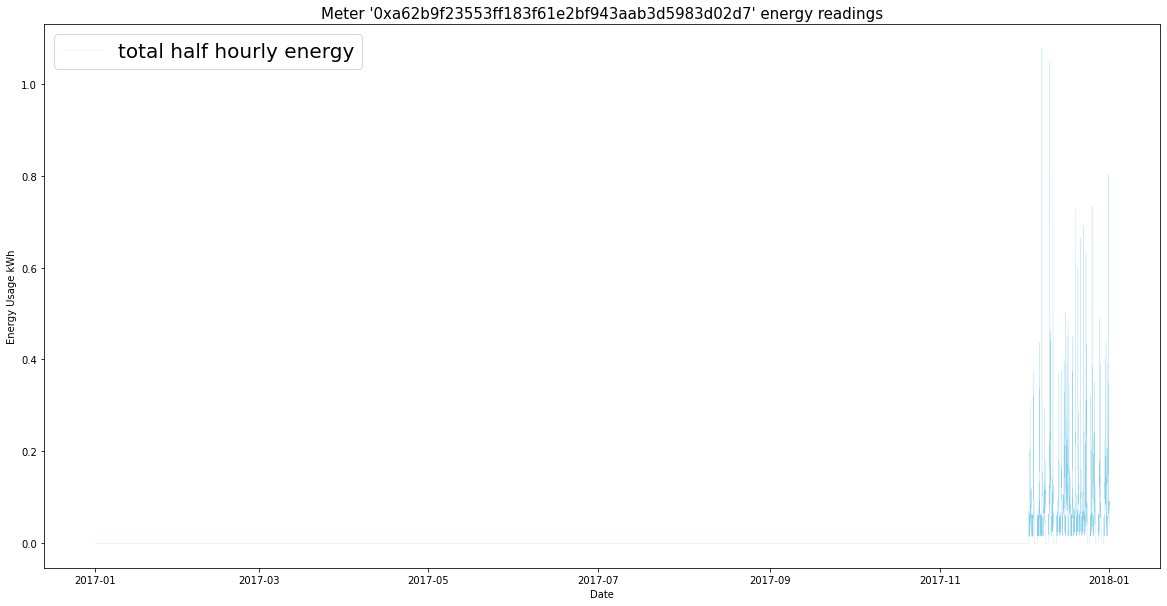

showing row:  1


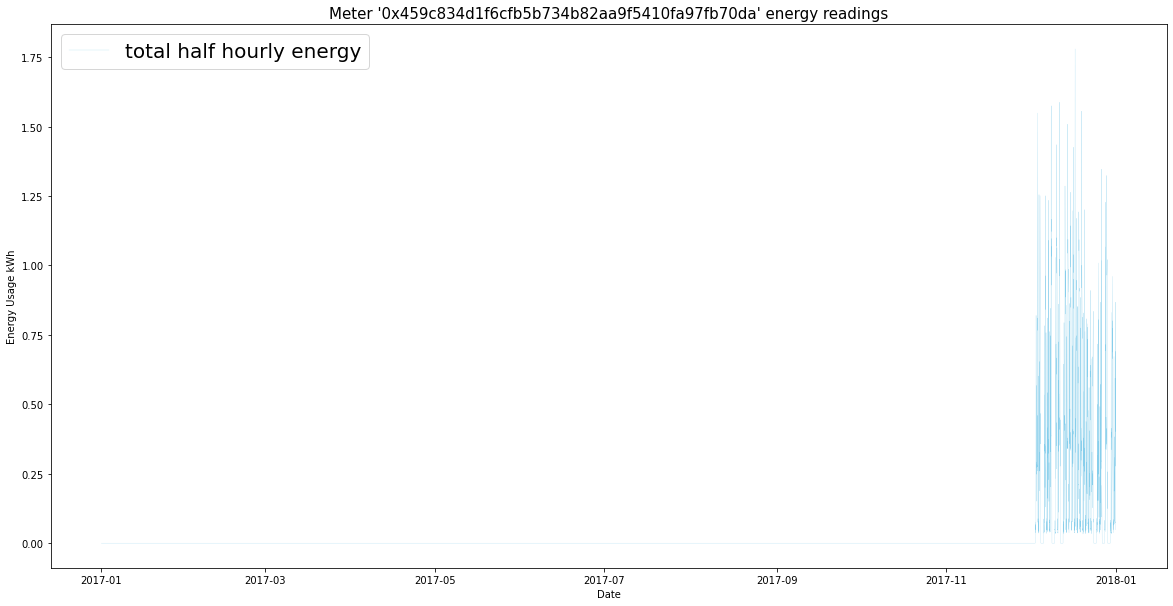

showing row:  2


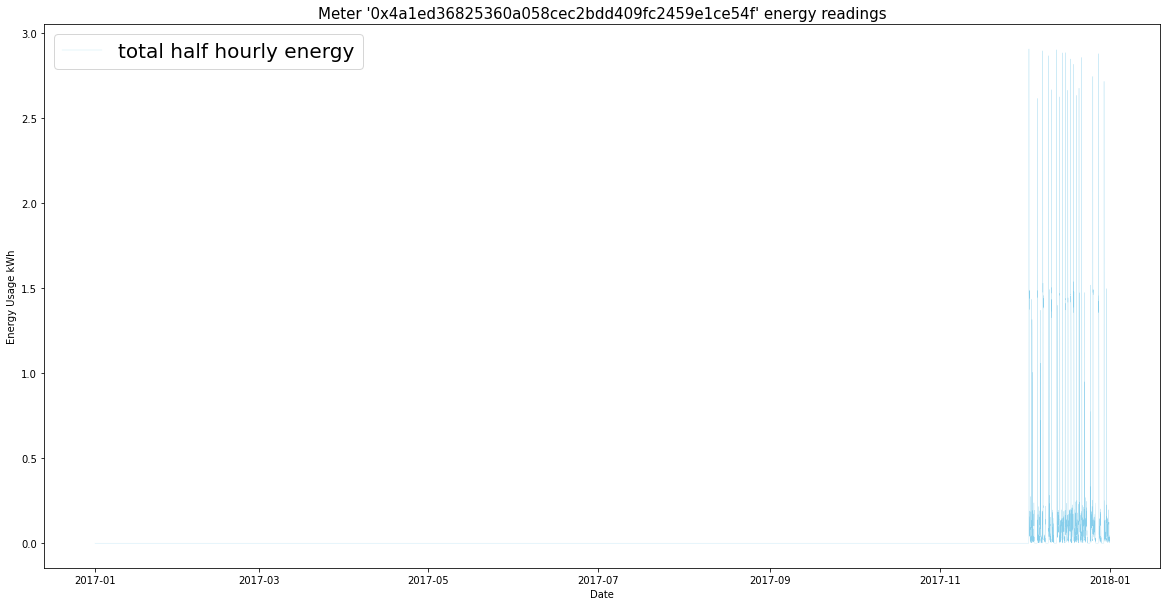

showing row:  3


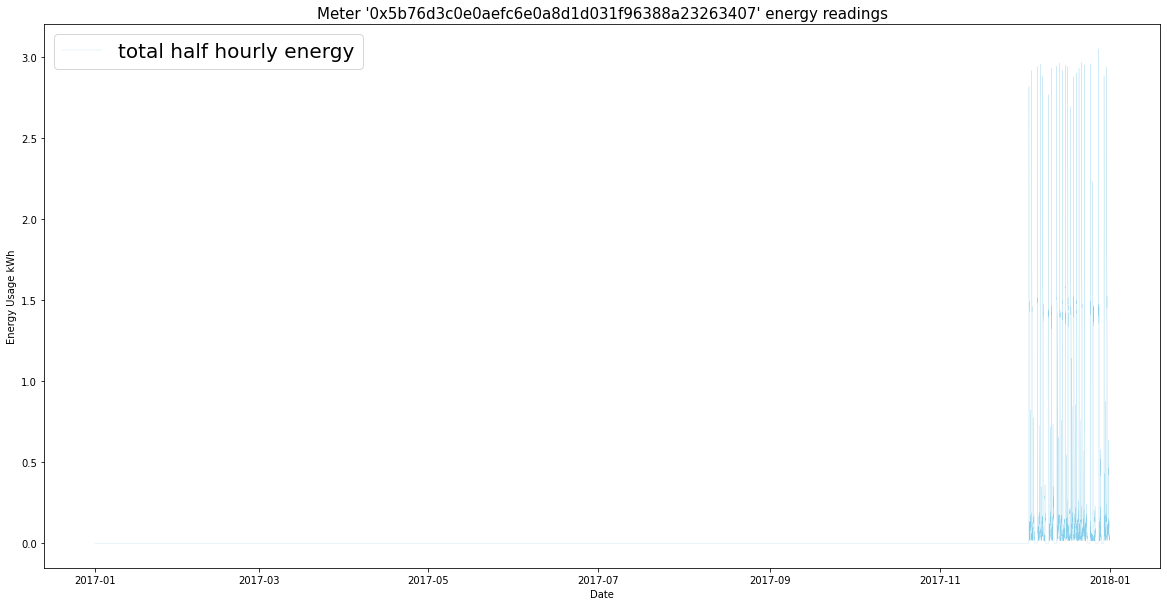

showing row:  4


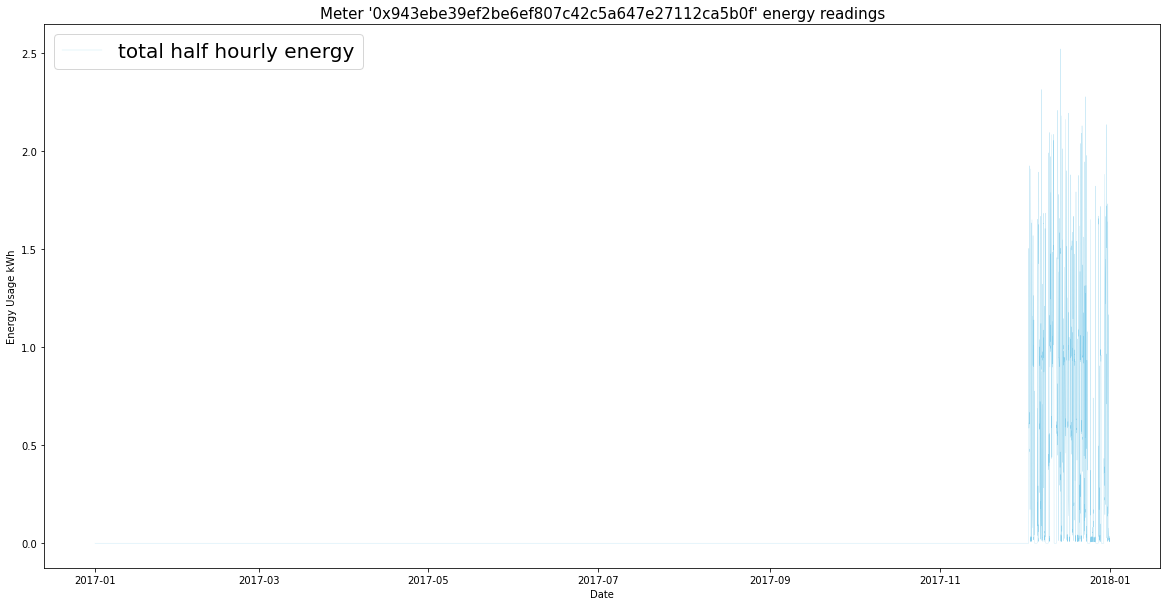

showing row:  5


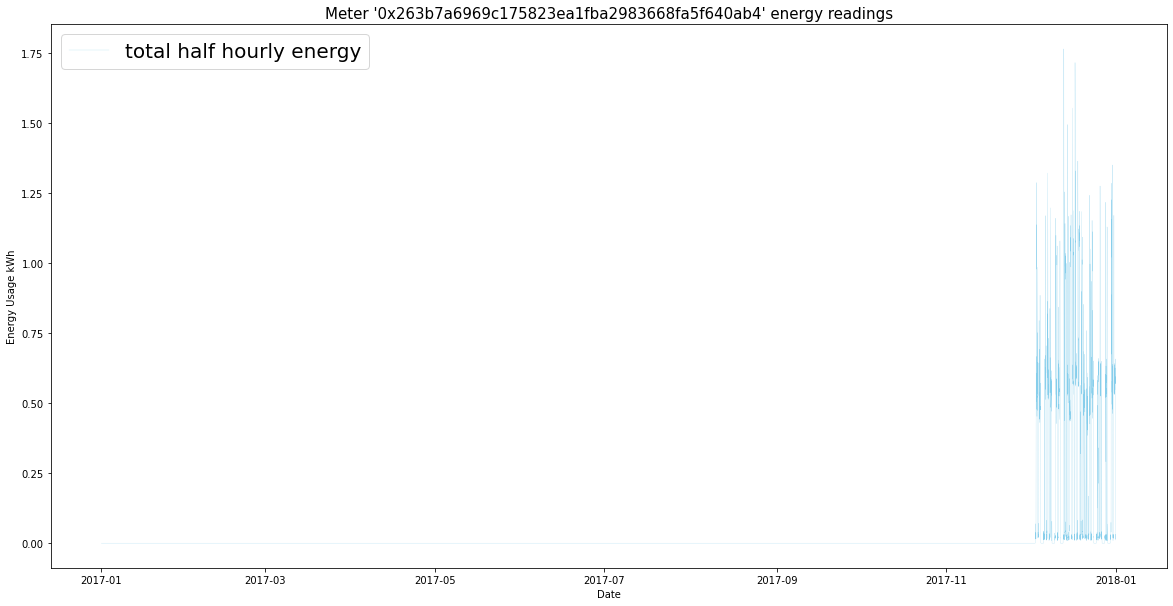

showing row:  6


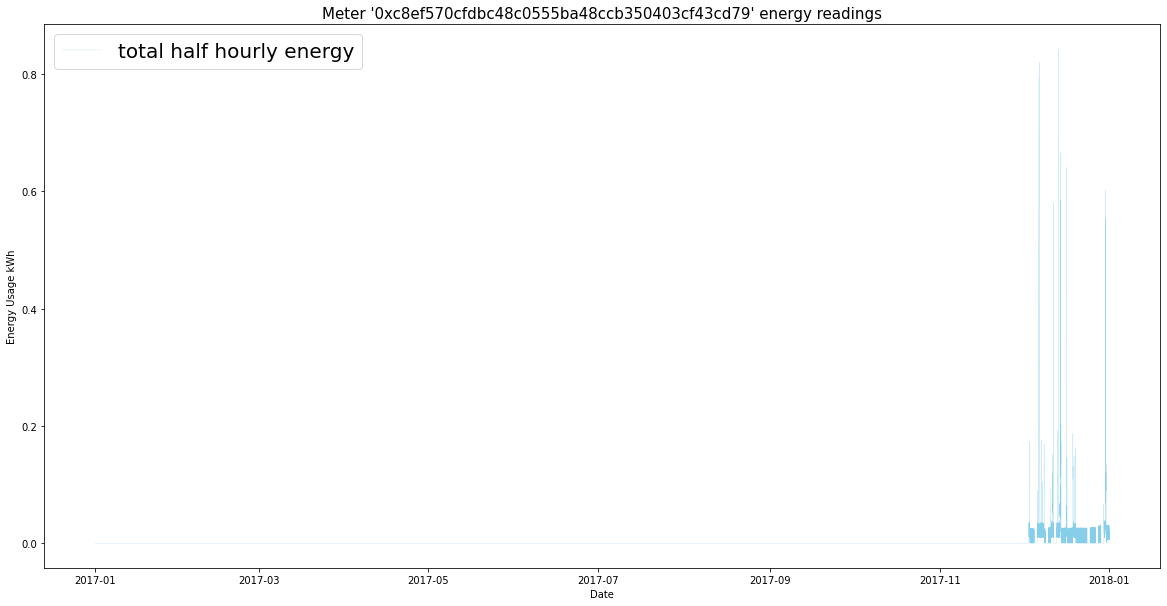

showing row:  7


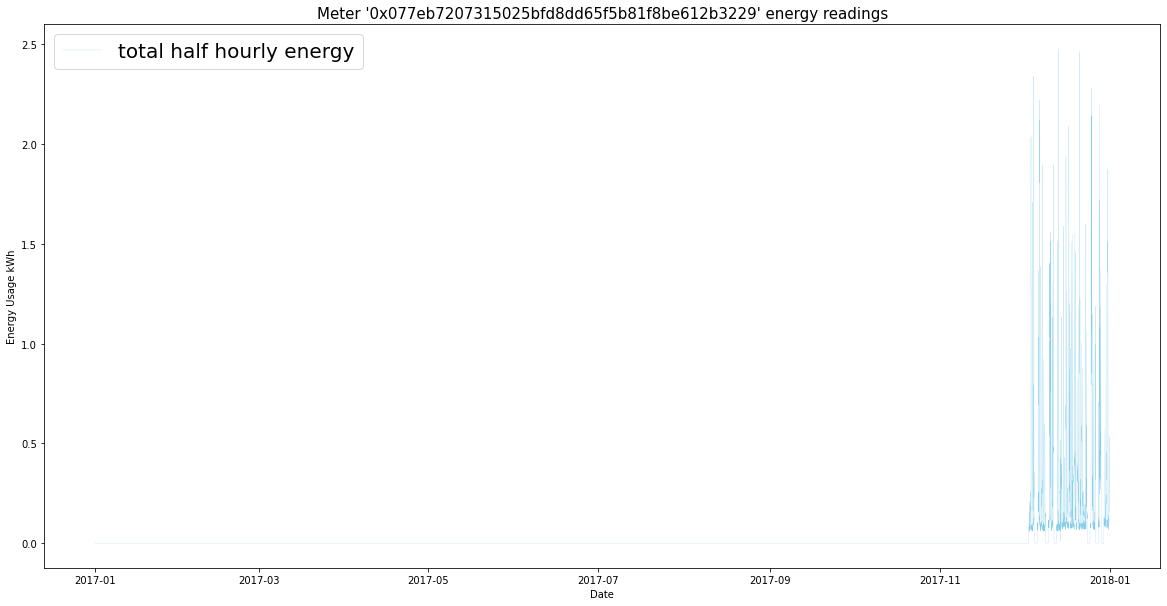

showing row:  8


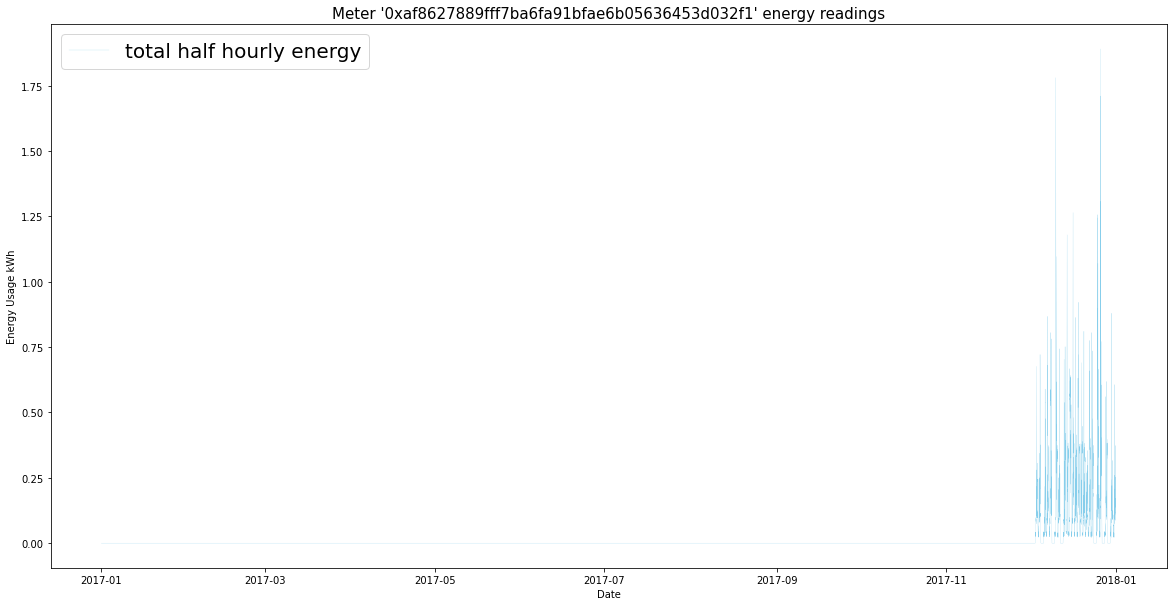

showing row:  9


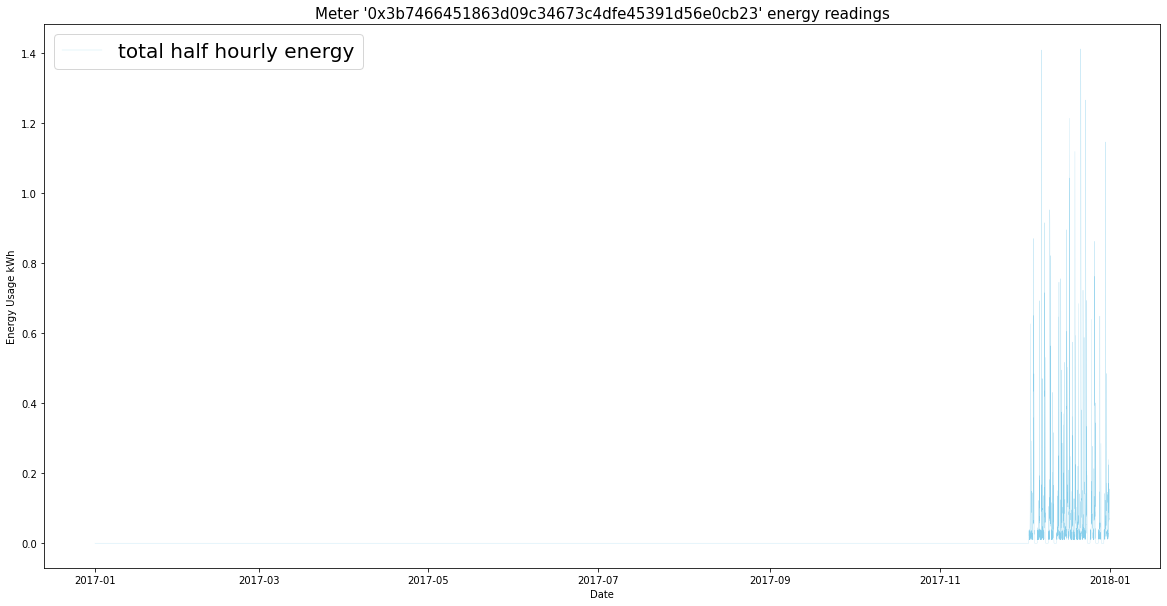

showing row:  10


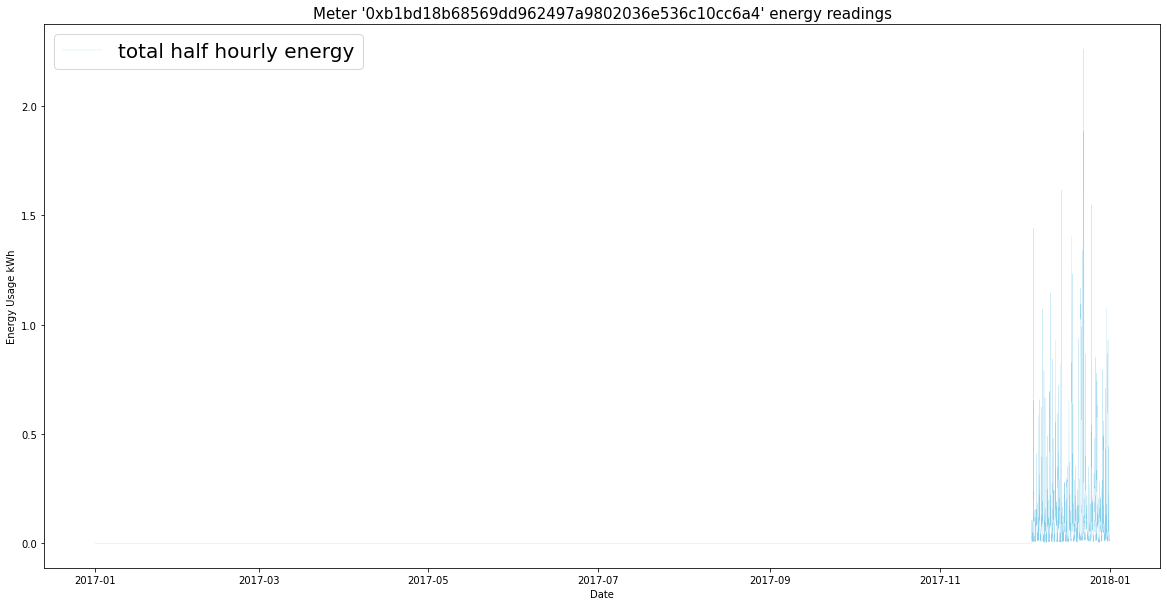

In [32]:
#plotting the original data
plot_time_patterns(df_energy.replace(np.nan,0), "Original", display_pid, "O", 10)

  0%|          | 0/3248 [00:00<?, ?it/s]

showing row:  0


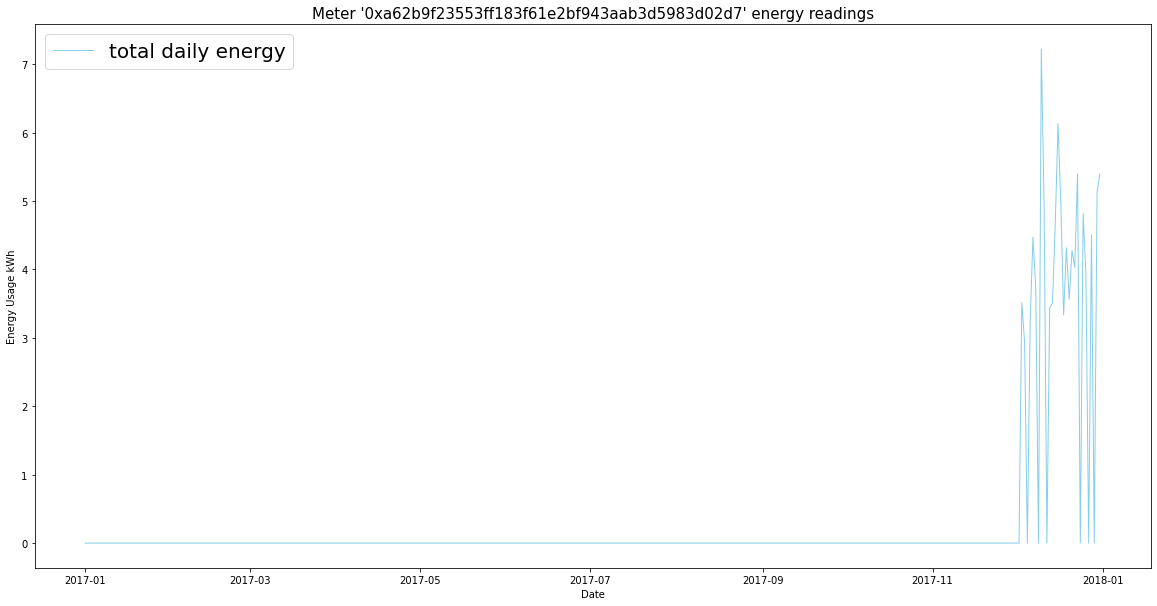

showing row:  1


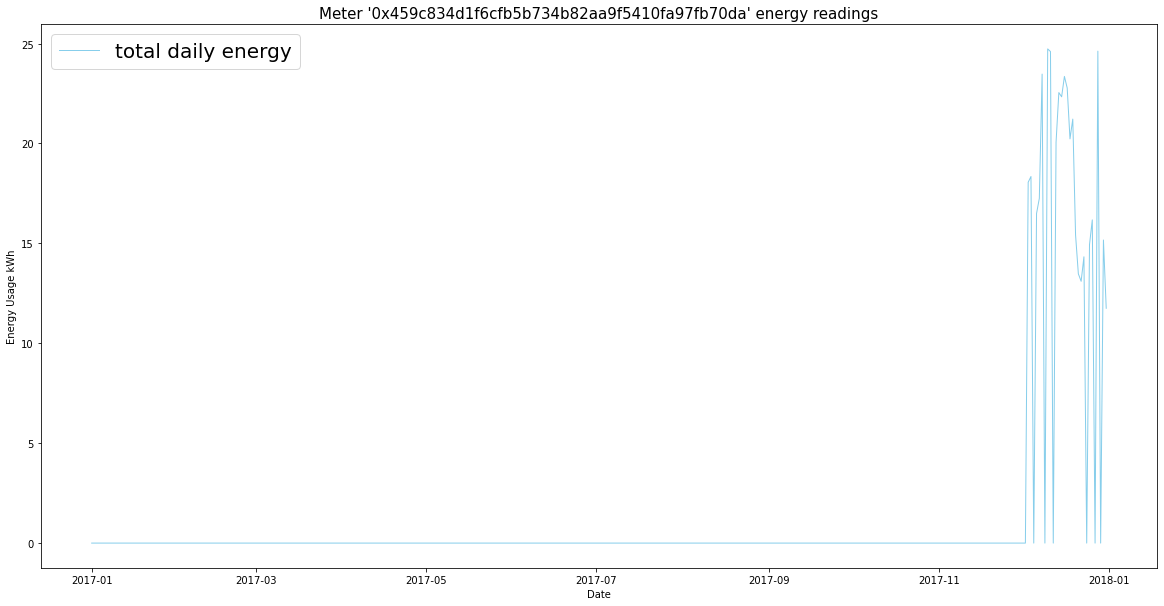

showing row:  2


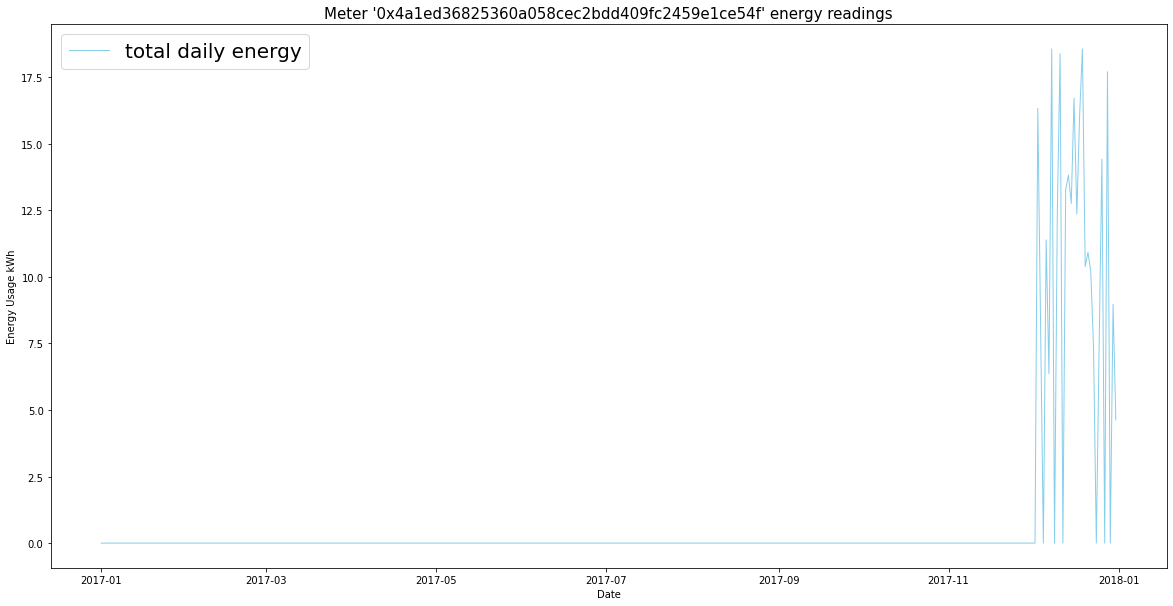

showing row:  3


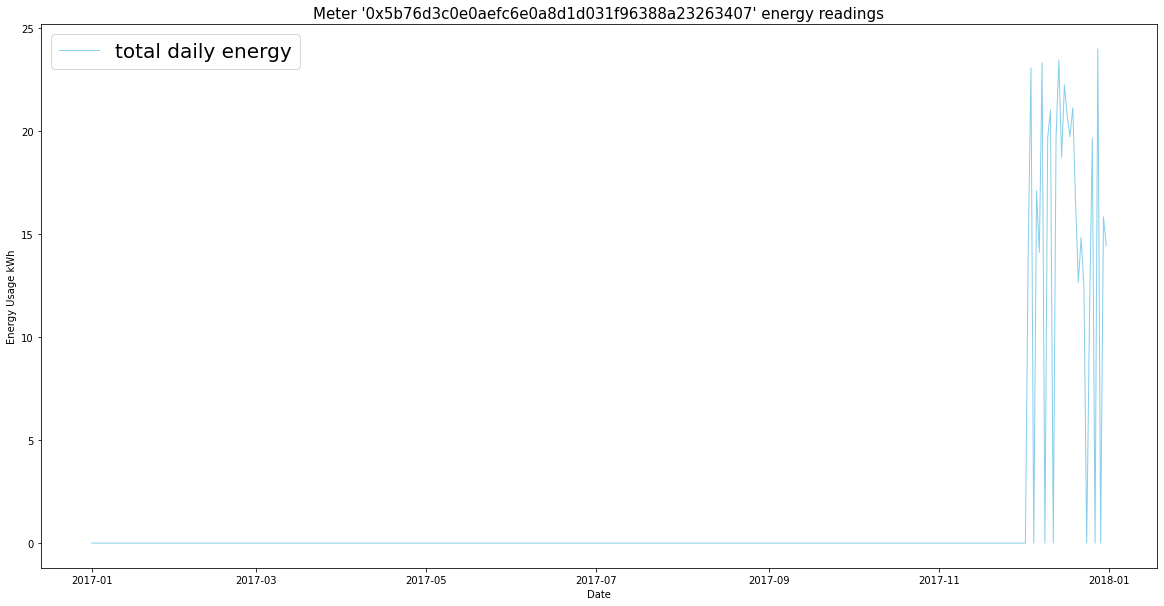

showing row:  4


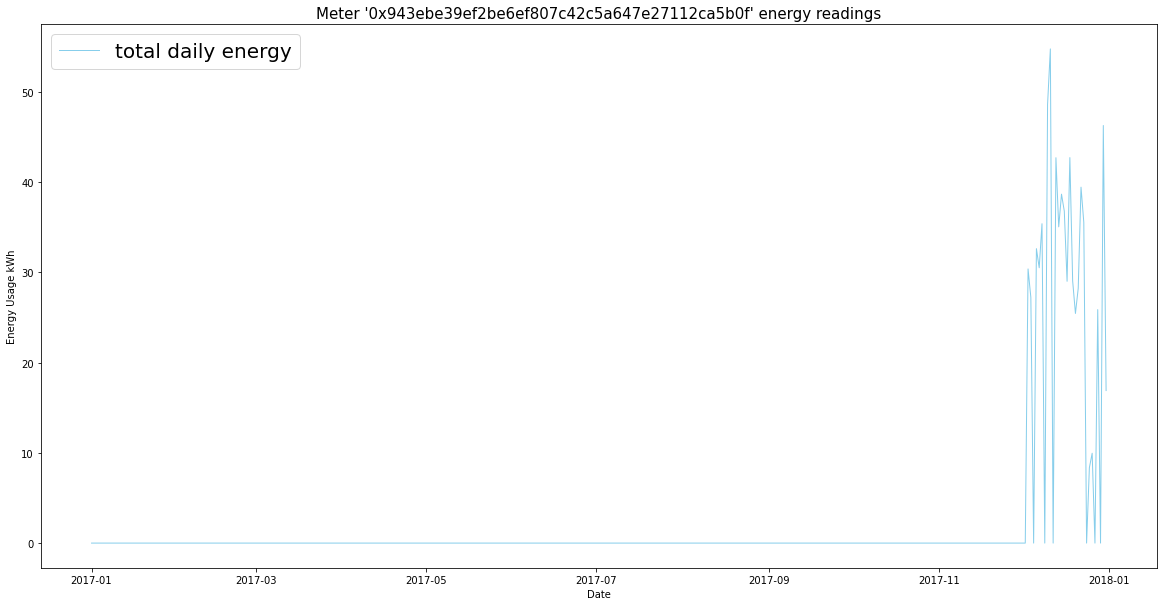

showing row:  5


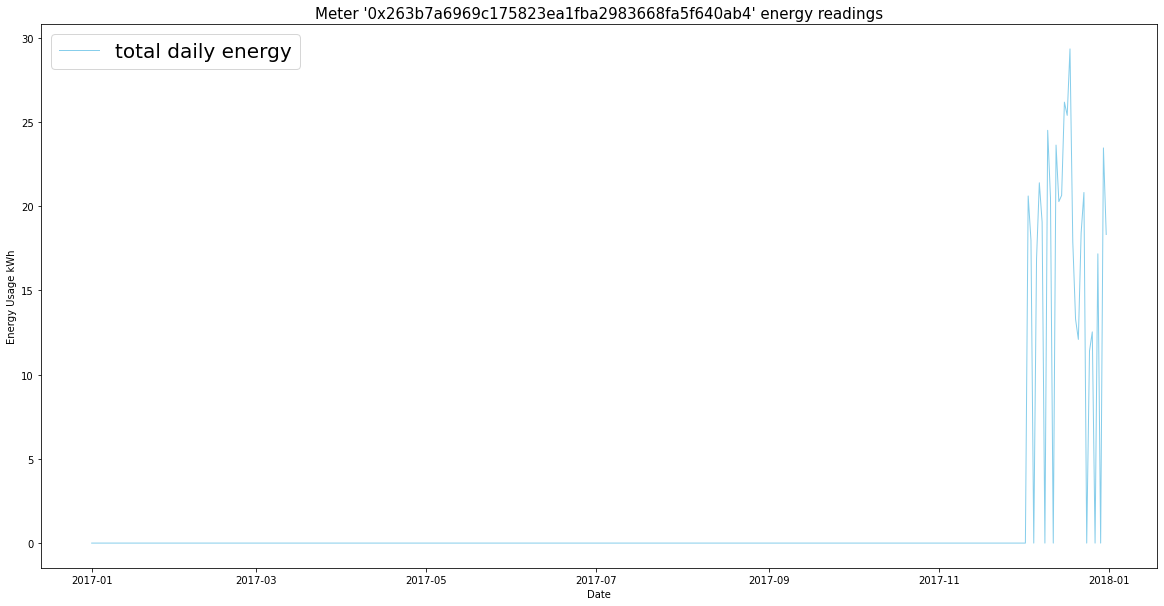

showing row:  6


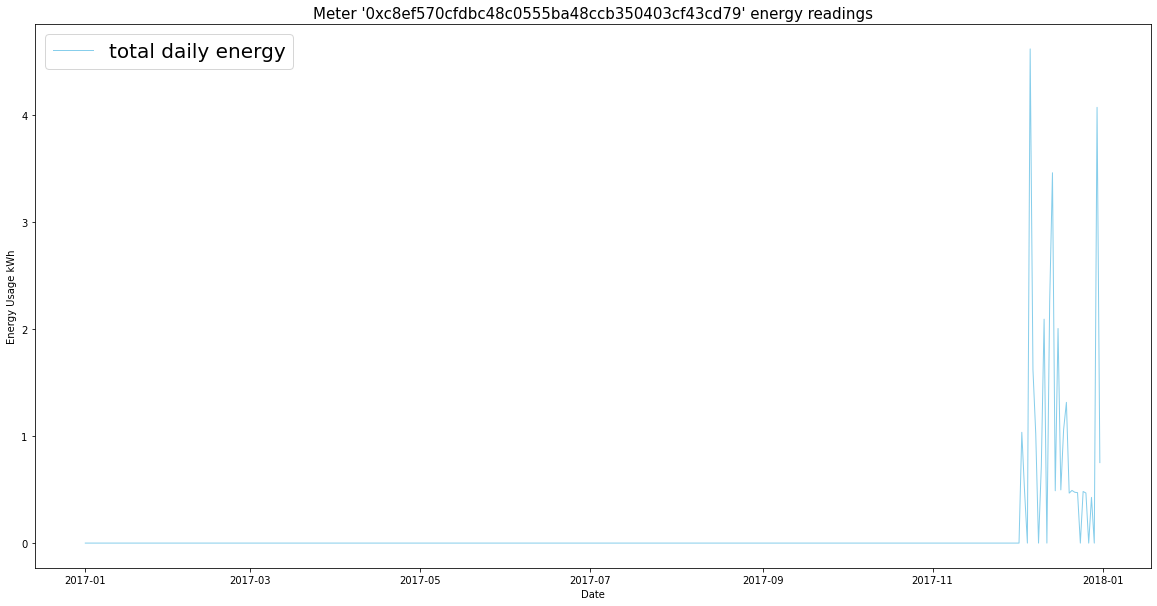

showing row:  7


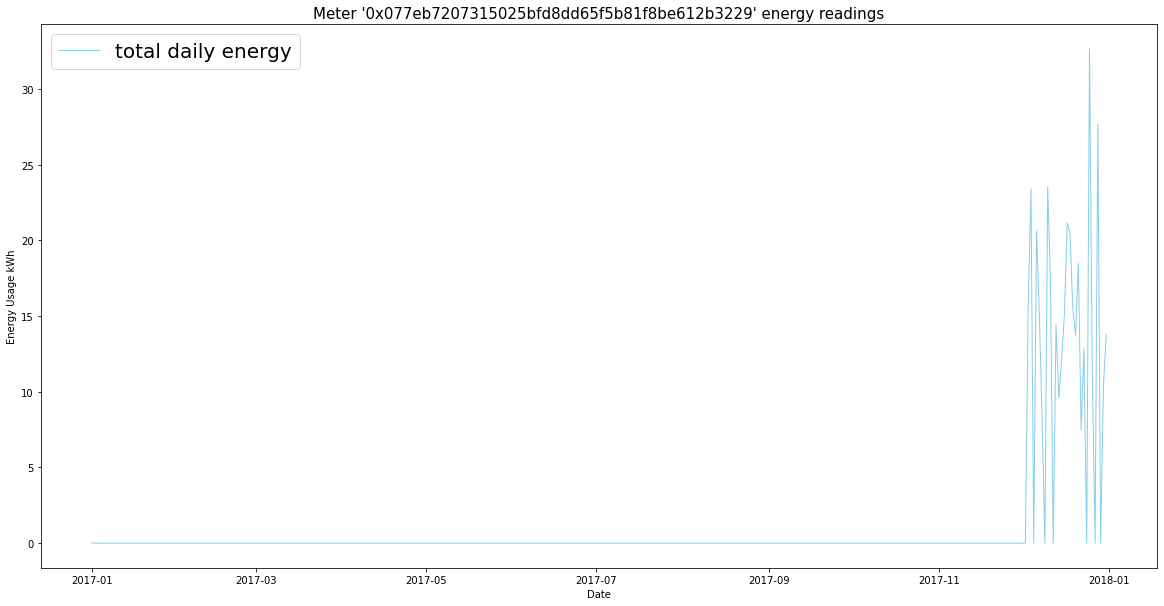

showing row:  8


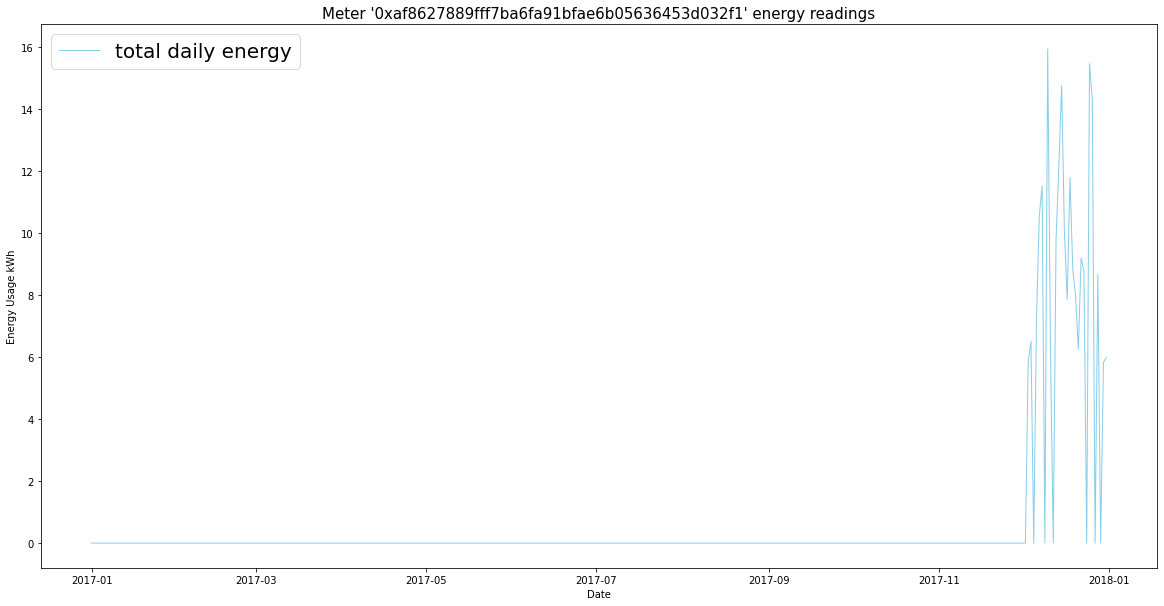

showing row:  9


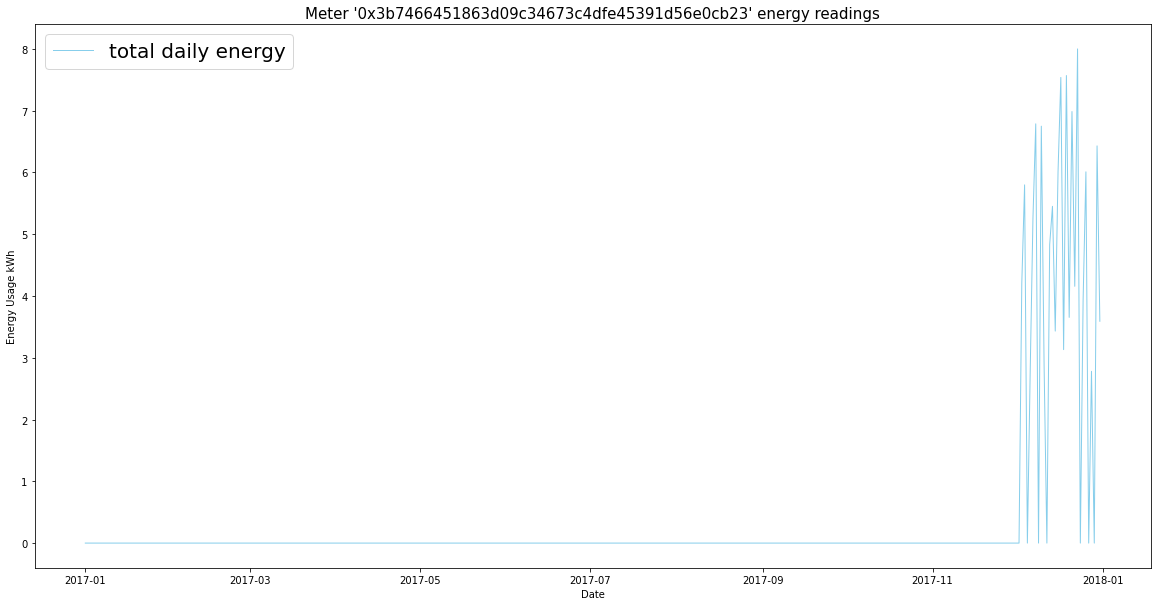

showing row:  10


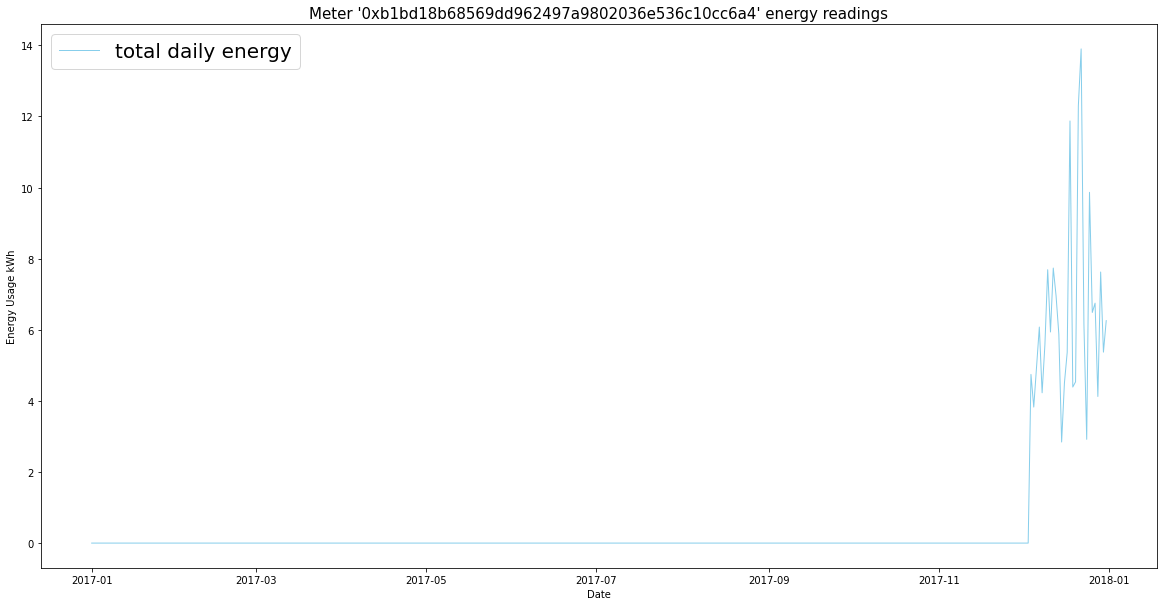

In [33]:
#plotting the uninterpolated data with days with missing still summed to a daily value (but inaccurate as some hours missing)
plot_time_patterns(df_energy_daily_with_missing.replace(np.nan, 0), "Daily_Ignored", display_pid, "D", 10)

  0%|          | 0/3248 [00:00<?, ?it/s]

showing row:  0


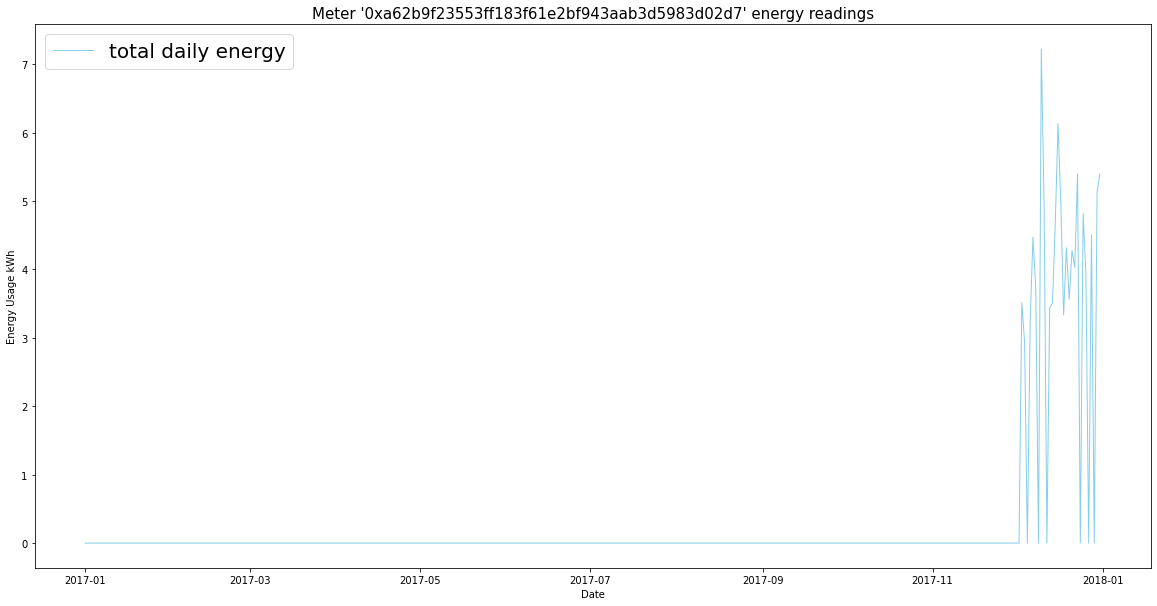

showing row:  1


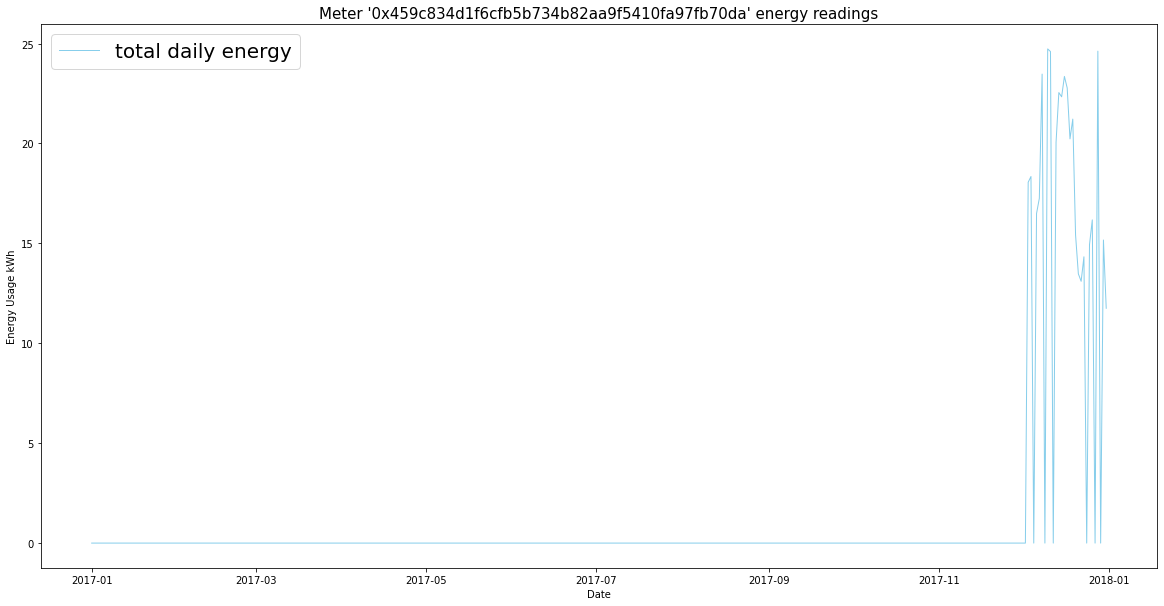

showing row:  2


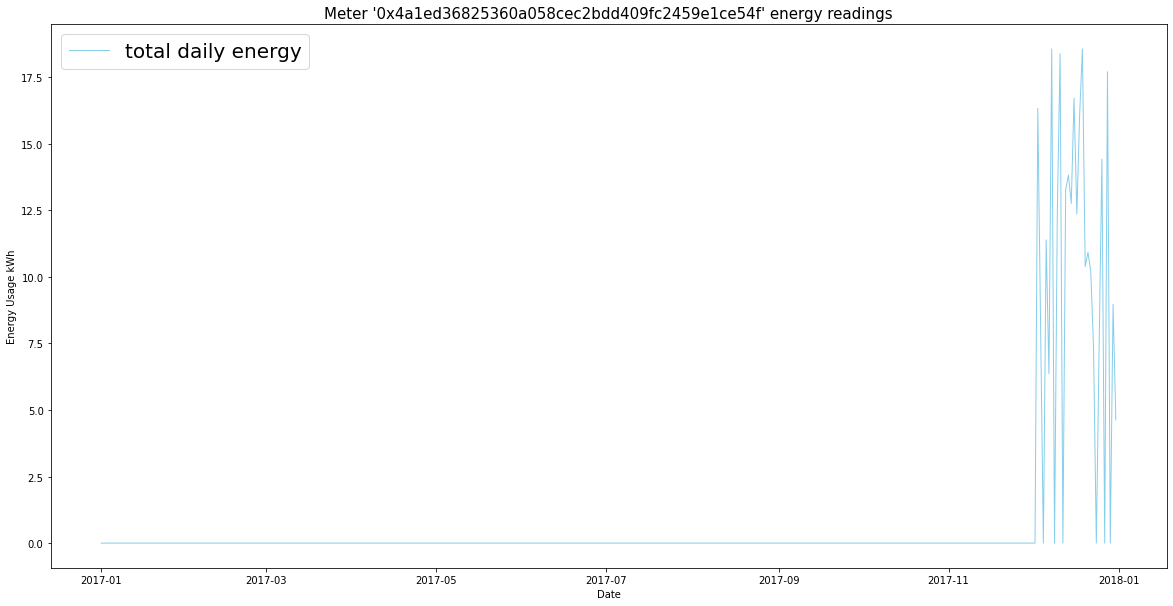

showing row:  3


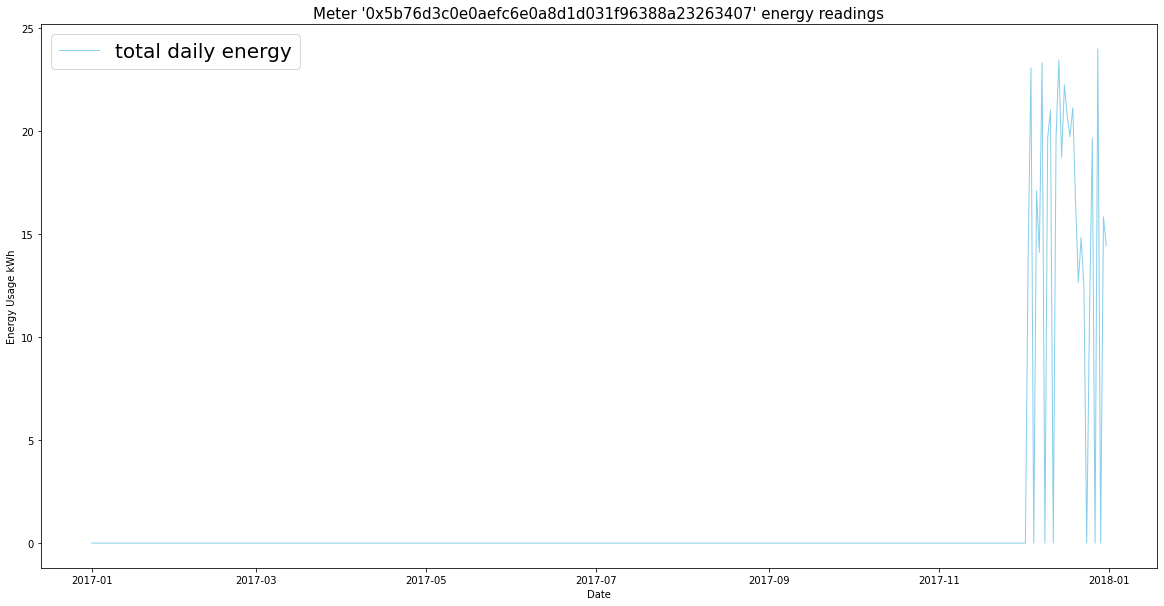

showing row:  4


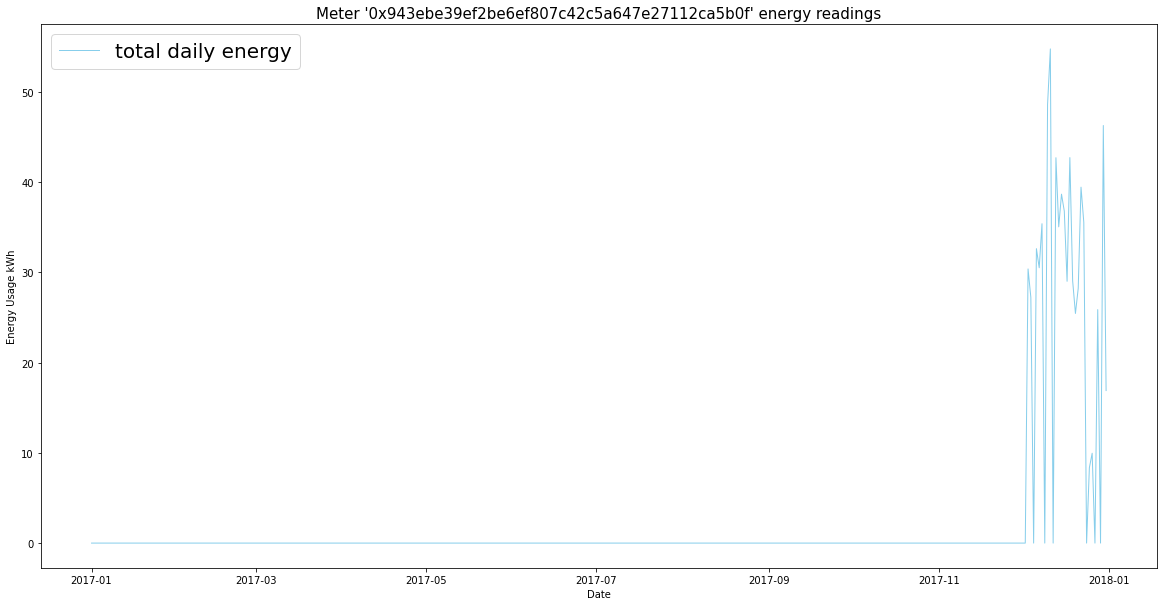

showing row:  5


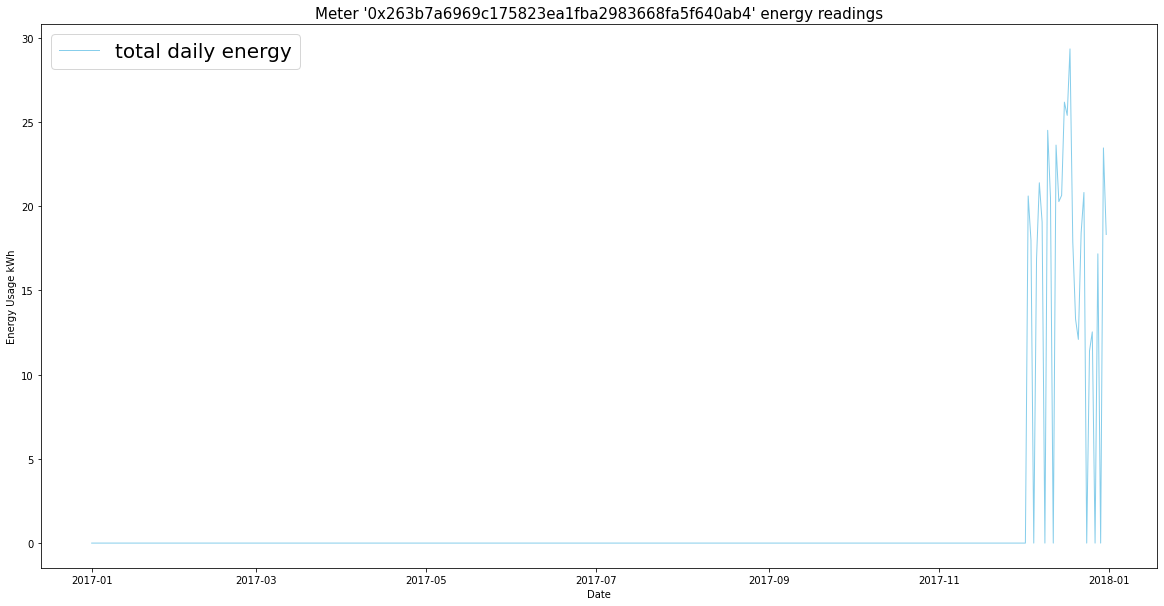

showing row:  6


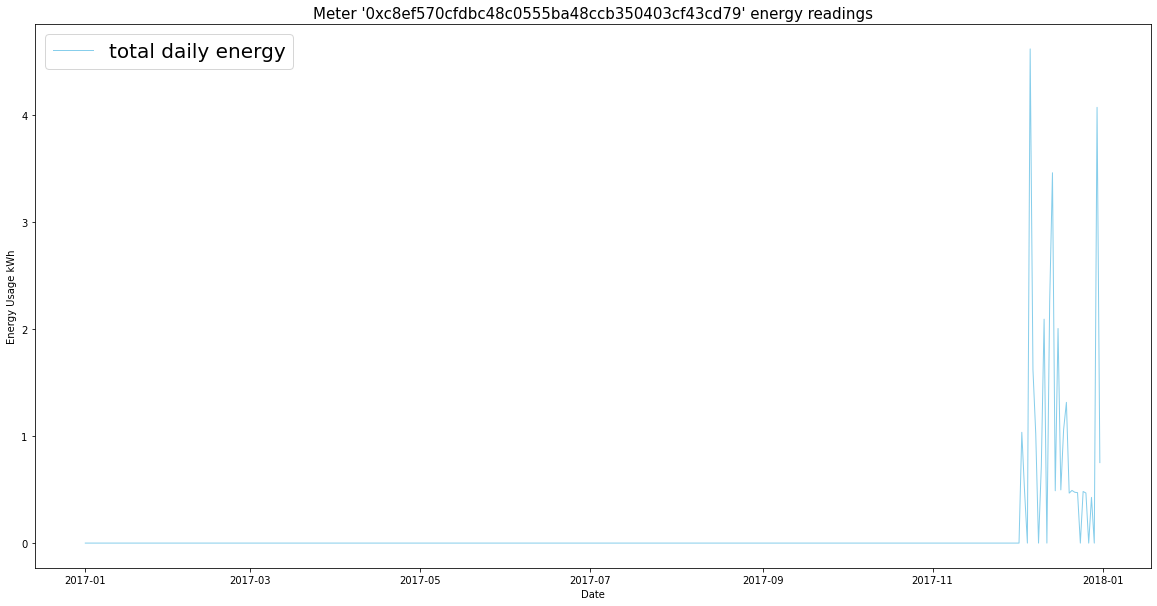

showing row:  7


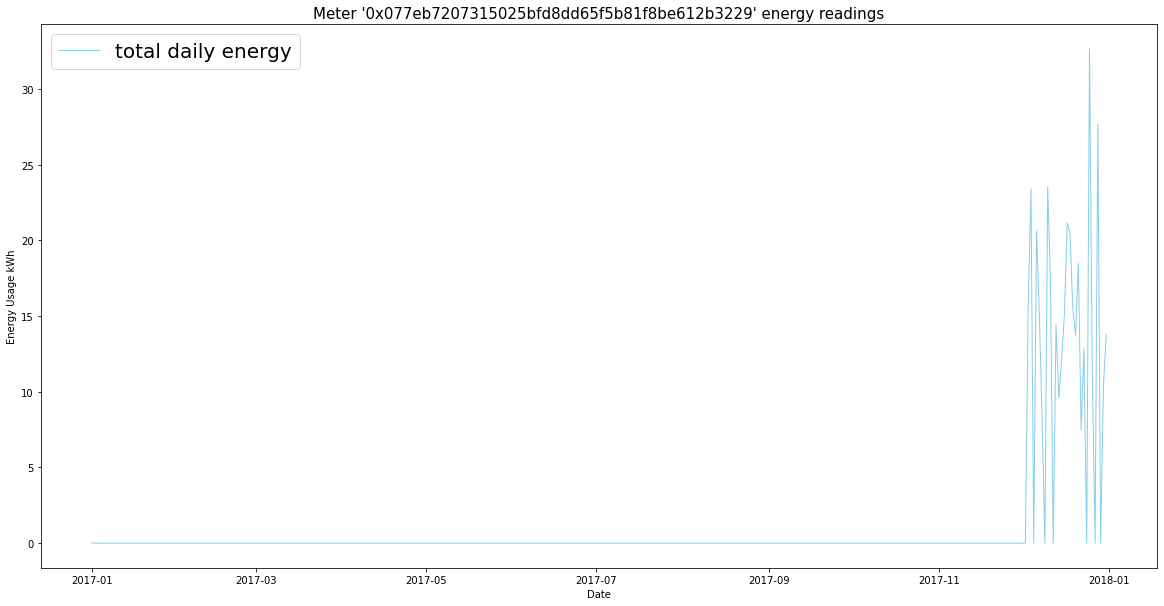

showing row:  8


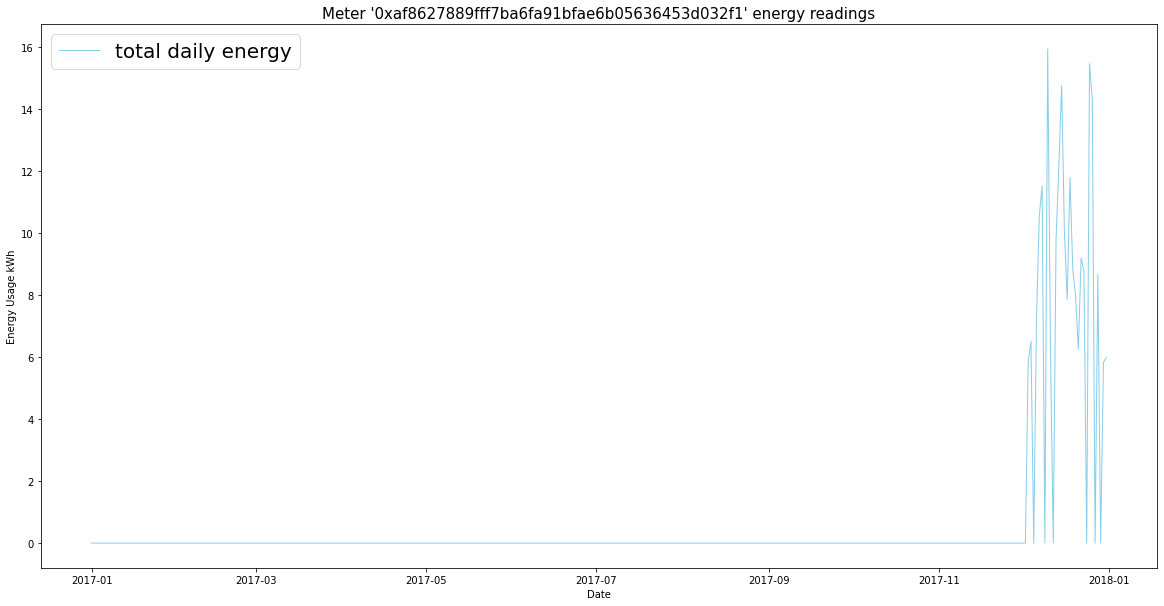

showing row:  9


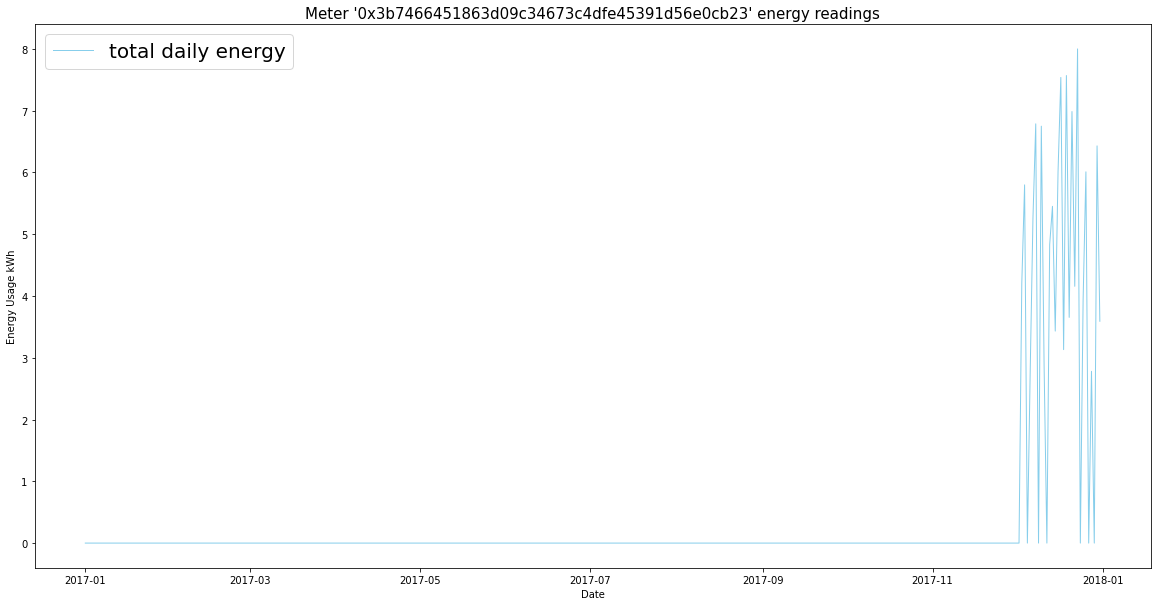

showing row:  10


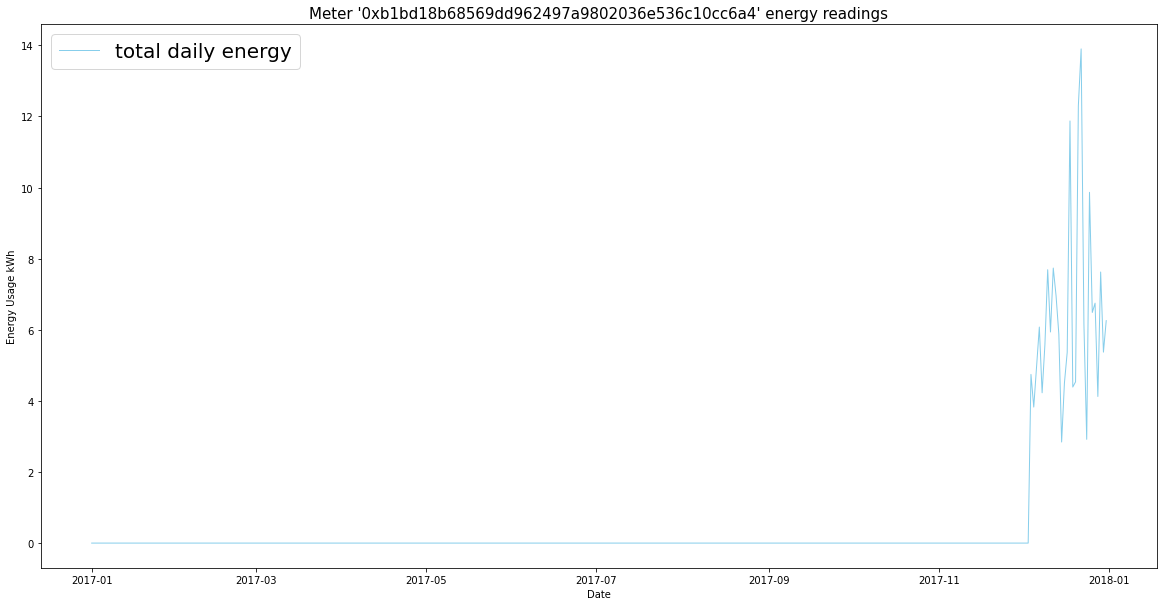

In [34]:
#plotting the uninterpolated data with days with missing set to missing
plot_time_patterns(df_energy_daily.replace(np.nan, 0), "Daily_Removed", display_pid, "D", 10)

  0%|          | 0/3248 [00:00<?, ?it/s]

showing row:  0


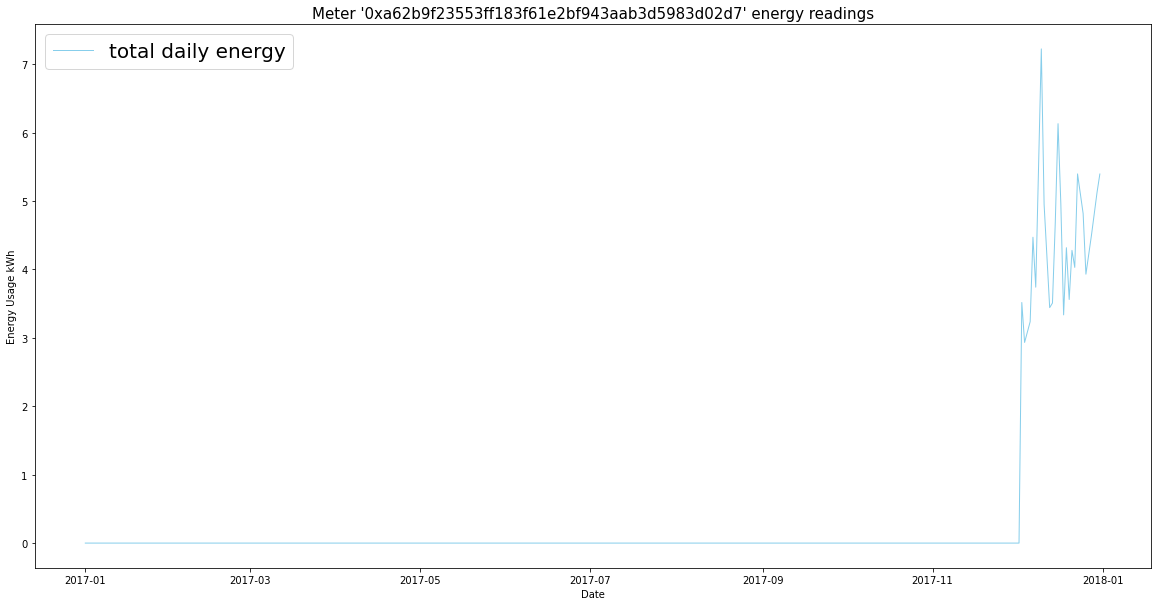

showing row:  1


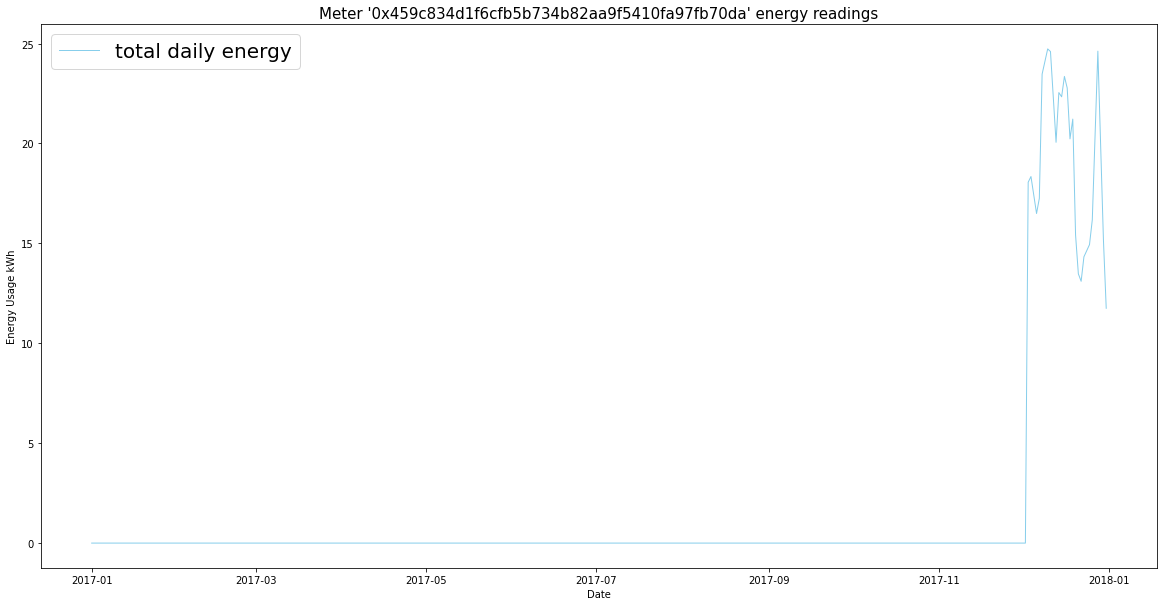

showing row:  2


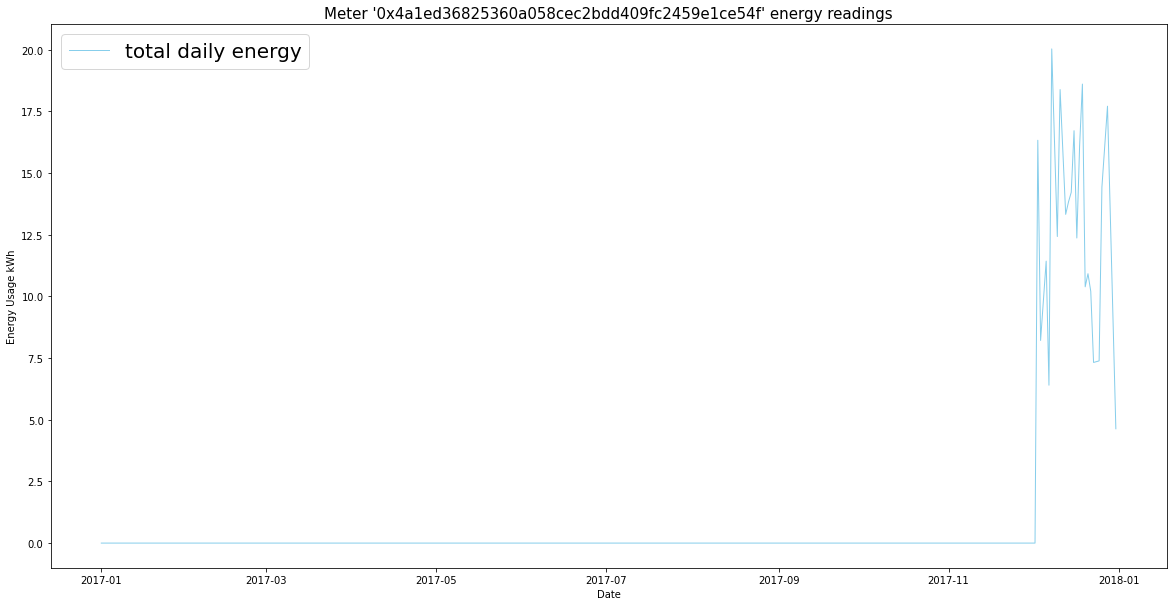

showing row:  3


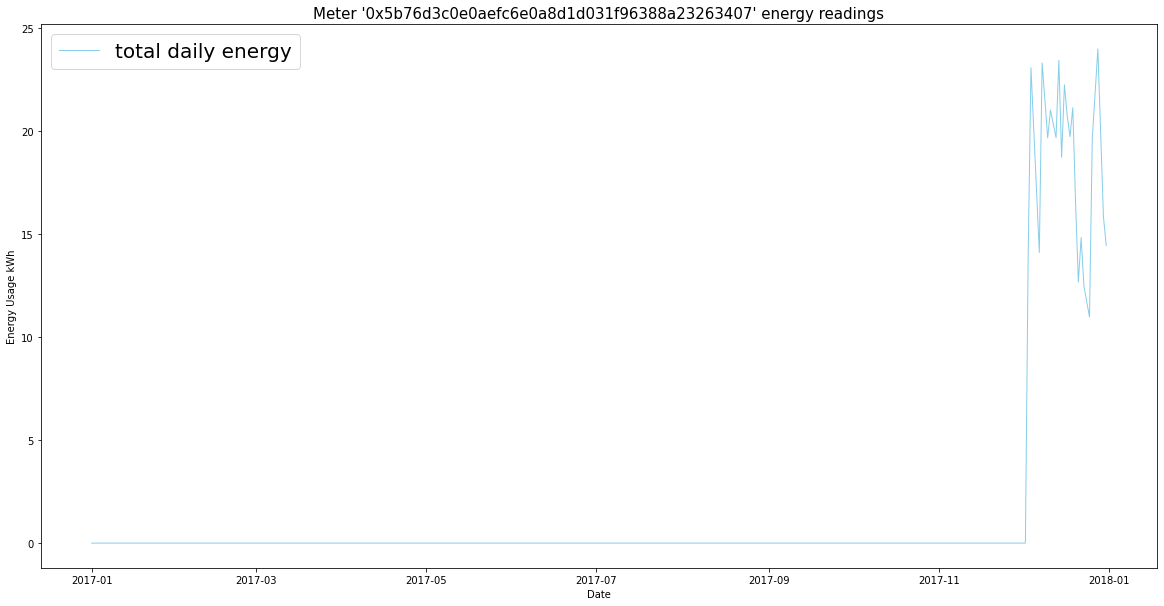

showing row:  4


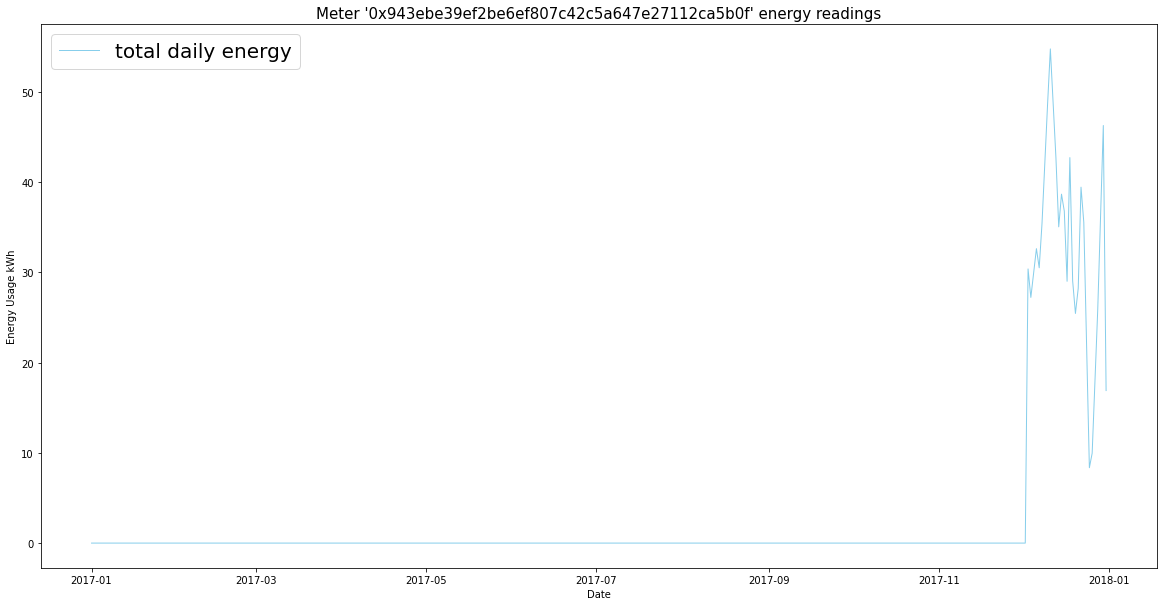

showing row:  5


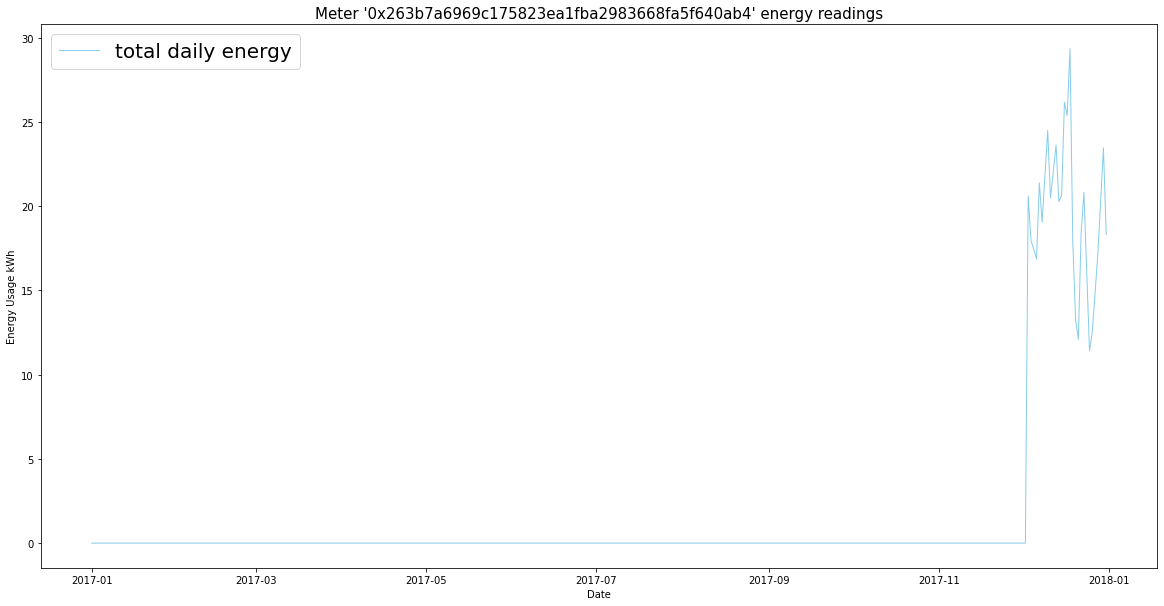

showing row:  6


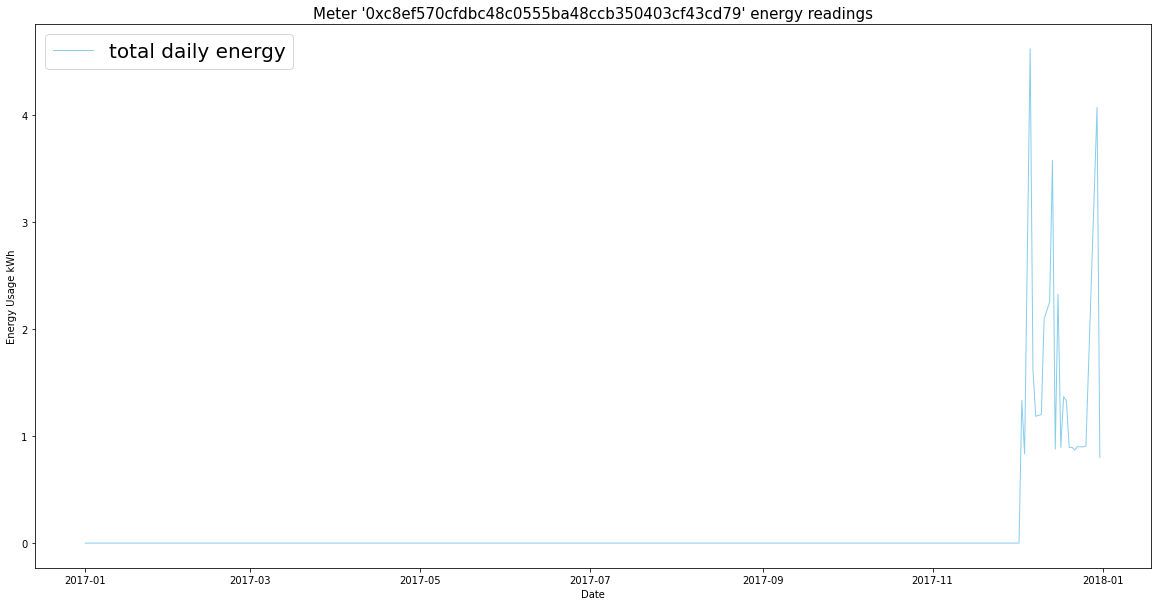

showing row:  7


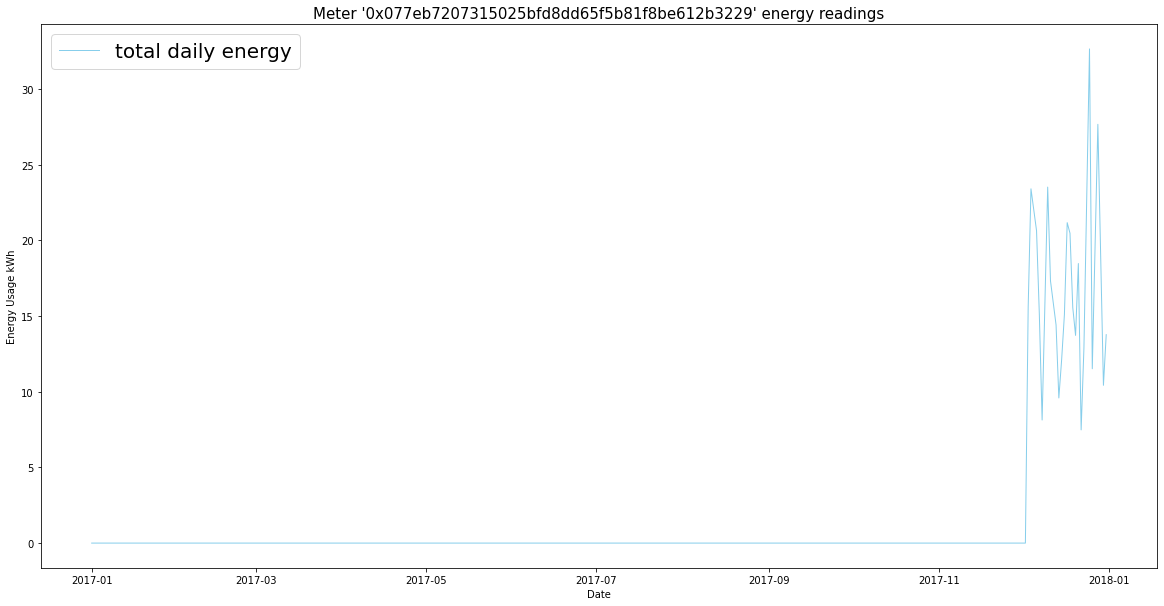

showing row:  8


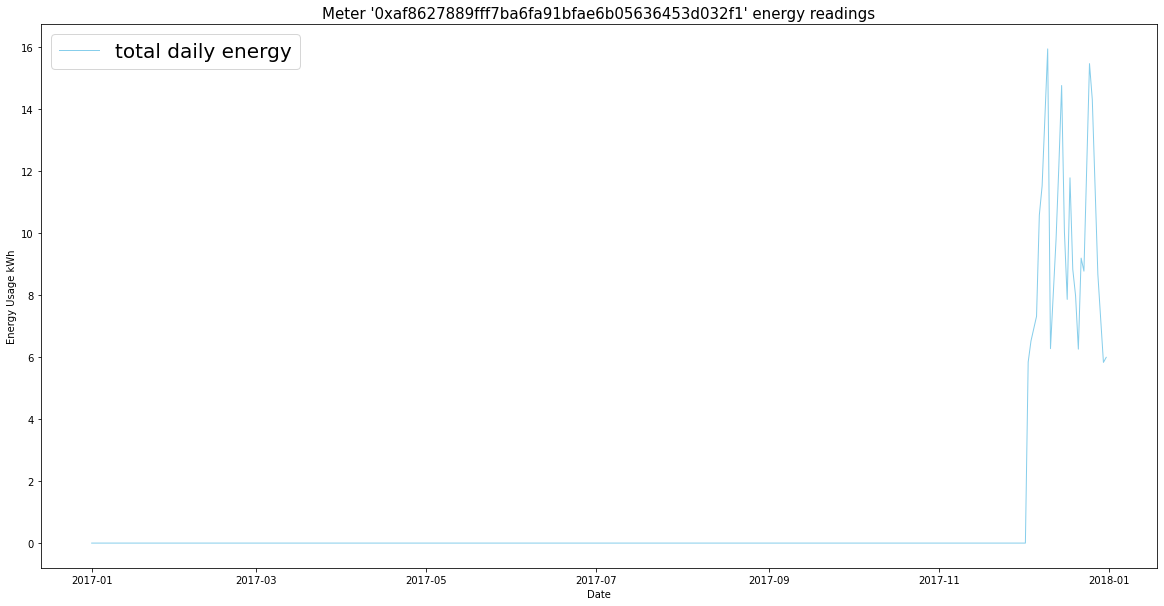

showing row:  9


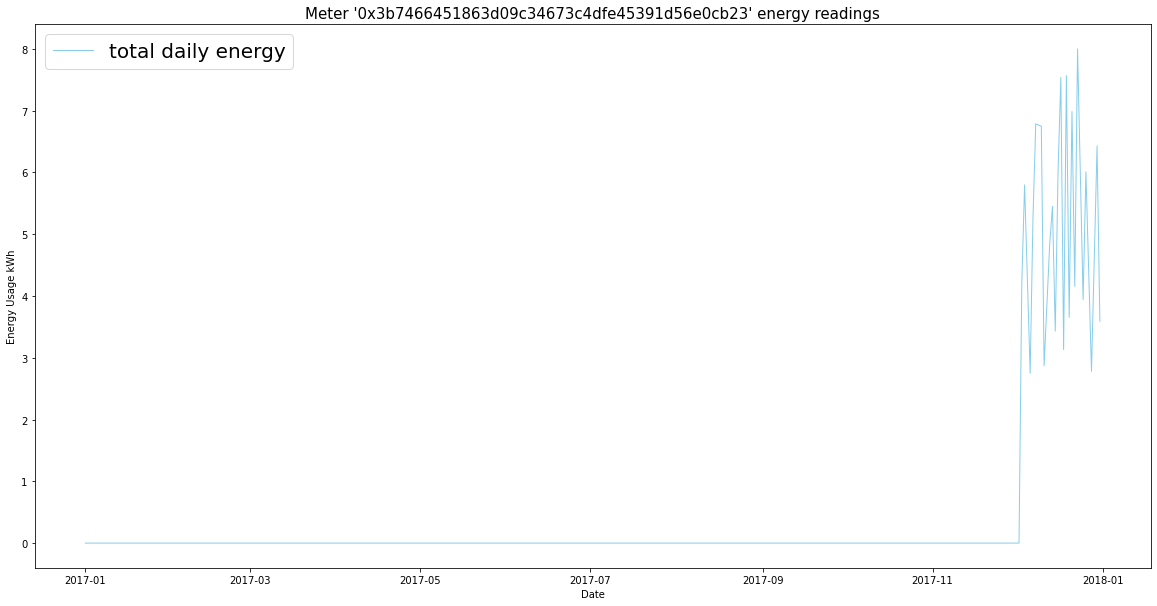

showing row:  10


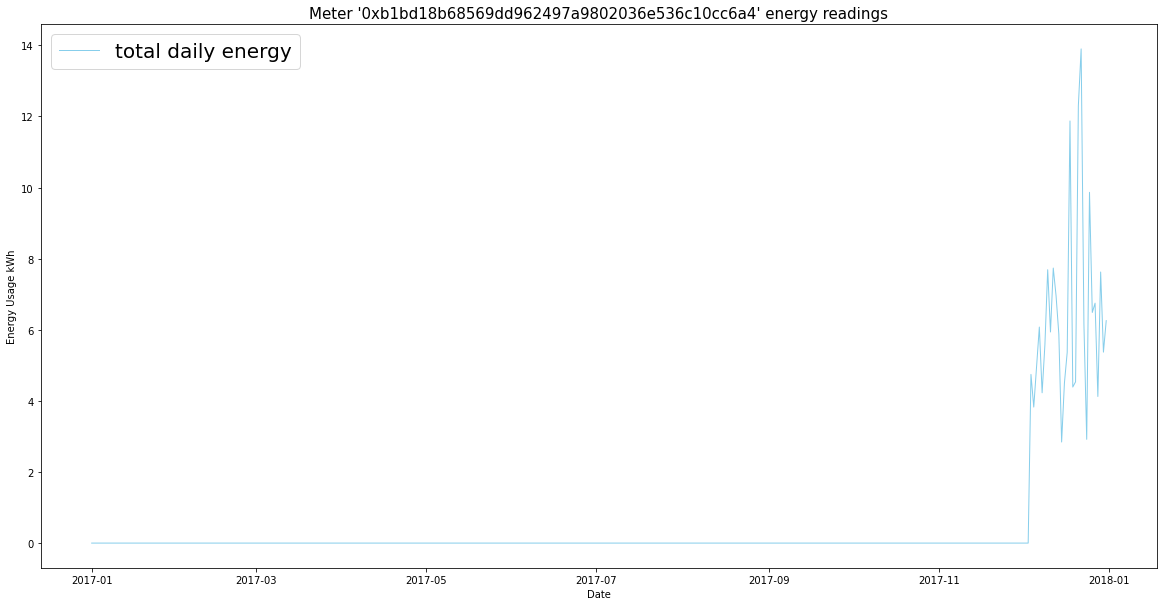

In [35]:
#plotting the interpolated data
plot_time_patterns(df_energy_interpolate_days_interpolate.replace(np.nan,0), "Daily_Interpolated", display_pid, "D", 10)

## Comparing how many missing values are now missing

In [36]:
print("Interpolated dataset has this many missing values")
print(df_energy_interpolate_days_interpolate.replace(0, np.nan).isna().sum().sum())

Interpolated dataset has this many missing values
551911


In [37]:
print("Uninterpolated dataset with days with missing values set to missing has this many missing values")
print(df_energy_daily.replace(0, np.nan).isna().sum().sum())

Uninterpolated dataset with days with missing values set to missing has this many missing values
617488


In [38]:
print("Uninterpolated dataset with days with missing values set to sum of values it does have has this many missing values")
print(df_energy_daily_with_missing.replace(0, np.nan).isna().sum().sum())

Uninterpolated dataset with days with missing values set to sum of values it does have has this many missing values
616351


##### Conclusion
* Essentially can conclude interpolated has successfully done a good job at imputing the missing values
    * Has similar pattern to that of the summed with missing
        * But more accurate and much fewer missing values
* Will use this dataset in the future for that reason
* Now only has the 'prefix nans' still missing (nans from before the meters started)
* And some 'sufix na' (when meter failed and stopped recording)



_________
_________________________________________________________
_________


# EDA on AddInfo
## Adding missing rows to AddInfo based on missing meter_id's

In [39]:
# first making both dataframes alphabetical in order of meter_id for ease of comparison
df_info.sort_values('meter_id')

,meter_id,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
750,0x000f697092696c27b0bb489ea4c11280ef72ab82,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0x001d6227832325ab6167b82d6d7175d254f57c3a,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1643,0x005958406351bb29580475df698b5f1070096397,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,0x00735e1aa83d97d9209cce47d8777b4ff3cc0554,terraced_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,0x0079fa6c2cbd3de97c8aa6073ff365b41ee087ab,terraced_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,0xffb4c5014834a46d09d0092e748c1ef5acd8733f,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463,0xffbdc1d9209f45668fb0be65b6d50cb999890ccb,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1685,0xffcbcdc7c3ce3451252b84c2aaf6f40d652d16d5,detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,0xffe91f021d145e1560fcad8c3af5ac0ef9d76a02,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_energy.sort_values('meter_id')

,meter_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,2017-01-01 04:30:00,2017-01-01 05:00:00,2017-01-01 05:30:00,2017-01-01 06:00:00,2017-01-01 06:30:00,2017-01-01 07:00:00,2017-01-01 07:30:00,2017-01-01 08:00:00,2017-01-01 08:30:00,2017-01-01 09:00:00,2017-01-01 09:30:00,2017-01-01 10:00:00,2017-01-01 10:30:00,2017-01-01 11:00:00,2017-01-01 11:30:00,...,2017-12-31 11:30:00,2017-12-31 12:00:00,2017-12-31 12:30:00,2017-12-31 13:00:00,2017-12-31 13:30:00,2017-12-31 14:00:00,2017-12-31 14:30:00,2017-12-31 15:00:00,2017-12-31 15:30:00,2017-12-31 16:00:00,2017-12-31 16:30:00,2017-12-31 17:00:00,2017-12-31 17:30:00,2017-12-31 18:00:00,2017-12-31 18:30:00,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
1124,0x0001f1c389823f953b2eaee0a61c33539744da0c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.074,0.045,0.046,0.069,0.094,0.077,0.075,0.052,0.060,0.045,0.081,0.076,0.096,0.057,0.046,0.046,0.093,0.079,0.077,0.061,0.060,0.051,0.069,0.078,0.081
602,0x000f697092696c27b0bb489ea4c11280ef72ab82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.092,0.113,0.097,0.095,0.116,0.333,0.230,0.176,0.309,0.359,0.552,2.171,0.552,0.393,0.300,0.378,0.387,0.369,0.372,0.368,0.381,0.299,0.247,0.109,0.069
972,0x0019979ee12c59accd24d1c83291528ced1bb734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.113,0.220,0.154,0.101,0.093,0.168,0.099,0.212,0.292,0.299,0.341,0.403,0.522,0.288,0.278,0.343,0.258,0.267,0.311,0.306,0.178,0.258,0.326,0.295,0.299
356,0x001d6227832325ab6167b82d6d7175d254f57c3a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064,0.109,0.142,0.128,0.119,0.145,0.286,0.158,0.079,0.699,0.535,0.656,0.083,0.194,0.110,0.113,0.097,0.262,0.135,0.155,0.139,0.156,0.138,0.145,0.120
133,0x005958406351bb29580475df698b5f1070096397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.114,0.155,0.465,0.230,0.145,0.146,0.131,0.156,1.017,0.813,0.287,0.280,0.354,0.355,0.340,0.356,0.317,0.367,0.378,0.312,0.304,0.331,0.330,0.252,0.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,0xffb4c5014834a46d09d0092e748c1ef5acd8733f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.226,0.090,0.735,0.866,0.081,0.148,0.125,0.128,0.161,0.121,0.078,0.058,0.070,0.071,0.264,0.098,0.079,0.203,0.091,0.083,0.120,0.083,0.096,0.120,0.092
2580,0xffbdc1d9209f45668fb0be65b6d50cb999890ccb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.504,0.934,0.418,0.336,0.431,0.348,0.837,0.741,0.424,0.619,0.417,0.403,0.413,0.398,0.456,0.439,0.491,0.484,0.427,0.415,0.349,0.274,0.282,0.298,0.272
2198,0xffcbcdc7c3ce3451252b84c2aaf6f40d652d16d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.686,0.562,1.223,0.761,0.740,1.143,0.121,0.212,0.222,0.318,0.481,0.754,0.563,0.497,0.494,0.503,0.601,0.390,0.317,0.333,0.378,0.617,0.512,0.463,0.467
2792,0xffe91f021d145e1560fcad8c3af5ac0ef9d76a02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.157,0.136,0.260,0.176,0.518,0.180,0.220,0.663,0.377,0.274,0.186,0.355,0.668,0.729,0.192,0.289,0.416,0.237,0.297,0.218,0.310,0.236,0.145,0.143,0.037


In [41]:
#adding the missing meter rows to df_info
df_info_all_meters = pd.merge(df_info, df_energy["meter_id"], on="meter_id",how="outer")

In [42]:
#checking the values are correct now
df_info_all_meters.sort_values('meter_id')

,meter_id,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
2532,0x0001f1c389823f953b2eaee0a61c33539744da0c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,0x000f697092696c27b0bb489ea4c11280ef72ab82,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2468,0x0019979ee12c59accd24d1c83291528ced1bb734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0x001d6227832325ab6167b82d6d7175d254f57c3a,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1643,0x005958406351bb29580475df698b5f1070096397,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,0xffb4c5014834a46d09d0092e748c1ef5acd8733f,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463,0xffbdc1d9209f45668fb0be65b6d50cb999890ccb,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1685,0xffcbcdc7c3ce3451252b84c2aaf6f40d652d16d5,detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,0xffe91f021d145e1560fcad8c3af5ac0ef9d76a02,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#checking the shape is correct now
df_info_all_meters.shape

(3248, 24)

## Exploring datatypes and unique values

In [44]:
# inspecting the types of each column
df_info_all_meters.dtypes

meter_id                          object
dwelling_type                     object
num_occupants                    float64
num_bedrooms                     float64
heating_fuel                      object
hot_water_fuel                    object
boiler_age                        object
loft_insulation                   object
wall_insulation                   object
heating_temperature               object
efficient_lighting_percentage     object
dishwasher                       float64
freezer                          float64
fridge_freezer                   float64
refrigerator                     float64
tumble_dryer                     float64
washing_machine                  float64
game_console                     float64
laptop                           float64
pc                               float64
router                           float64
set_top_box                      float64
tablet                           float64
tv                               float64
dtype: object

In [45]:
#looking at the unique values for each column
for column in df_info_all_meters.drop(["meter_id"],axis=1).columns:
    print(column+" unique value count: "+str(df_info_all_meters[column].nunique()))
    print(df_info_all_meters[column].unique())
    print()

dwelling_type unique value count: 5
['semi_detached_house' 'terraced_house' 'detached_house' nan 'bungalow'
 'flat']

num_occupants unique value count: 4
[nan  2.  4.  3.  1.]

num_bedrooms unique value count: 5
[ 3.  2. nan  4.  5.  1.]

heating_fuel unique value count: 4
[nan 'gas' 'elec' 'other' 'lpg_oil']

hot_water_fuel unique value count: 3
[nan 'gas' 'elec' 'other']

boiler_age unique value count: 2
[nan 'new' 'old']

loft_insulation unique value count: 2
[nan 'y' 'n']

wall_insulation unique value count: 5
[nan 'y_cavity' 'n' 'y_internal' 'not_sure' 'y_external']

heating_temperature unique value count: 4
[nan '18_to_20' 'above_20' 'below_18' 'not_sure']

efficient_lighting_percentage unique value count: 4
[nan '0_to_25' '25_to_50' '50_to_75' '75_to_100']

dishwasher unique value count: 3
[nan  1.  0.  2.]

freezer unique value count: 3
[nan  2.  1.  0.]

fridge_freezer unique value count: 3
[nan  2.  0.  1.]

refrigerator unique value count: 3
[nan  2.  1.  0.]

tumble_dryer u

* We now know:
    1. The columns that contain categorical values vs the columns that contain real numbers
    2. The unique values for each column
    
## Exploring missing values
### Visualising as histogram

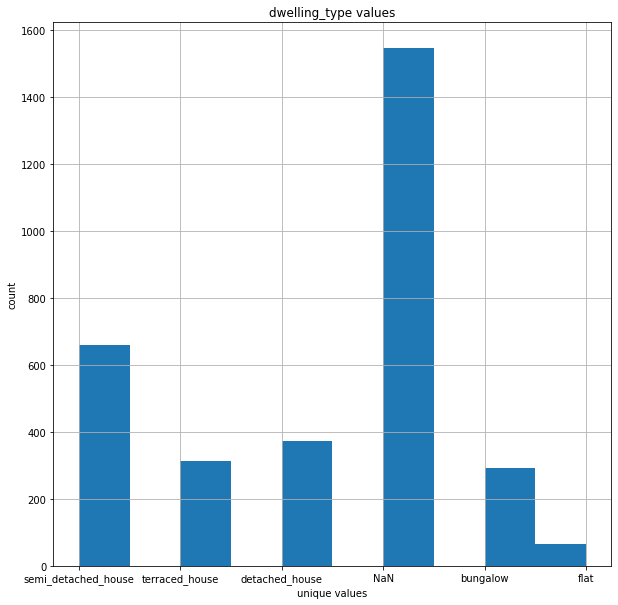

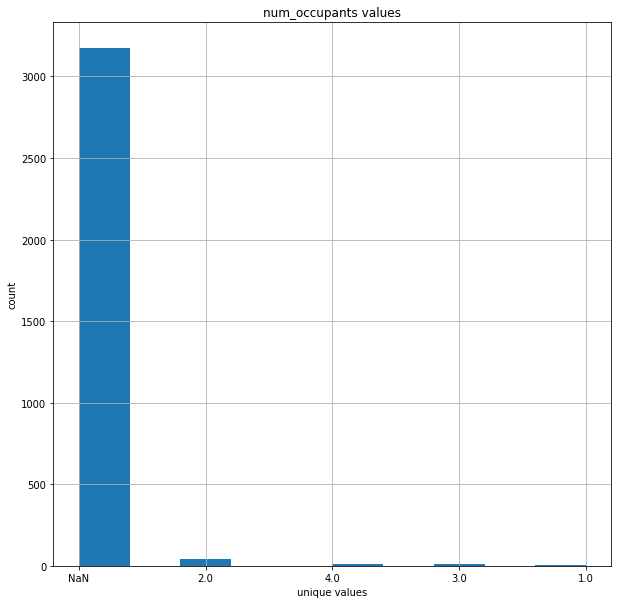

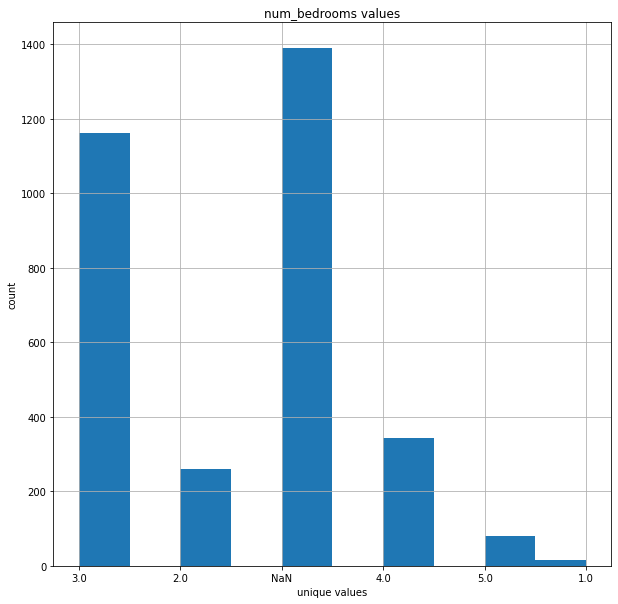

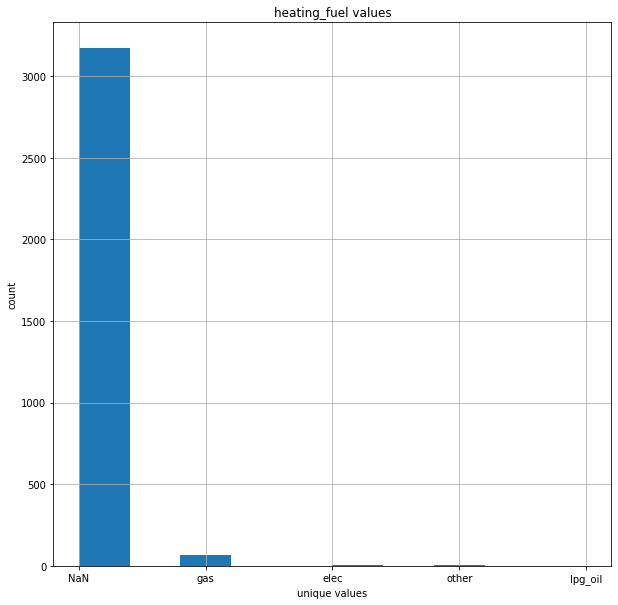

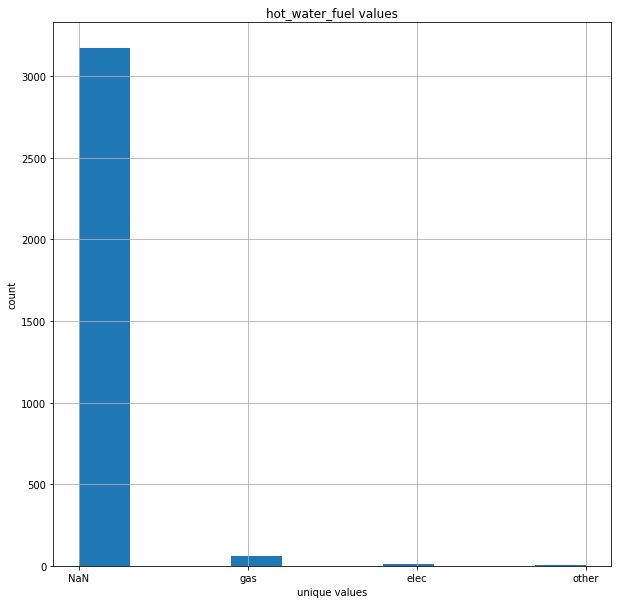

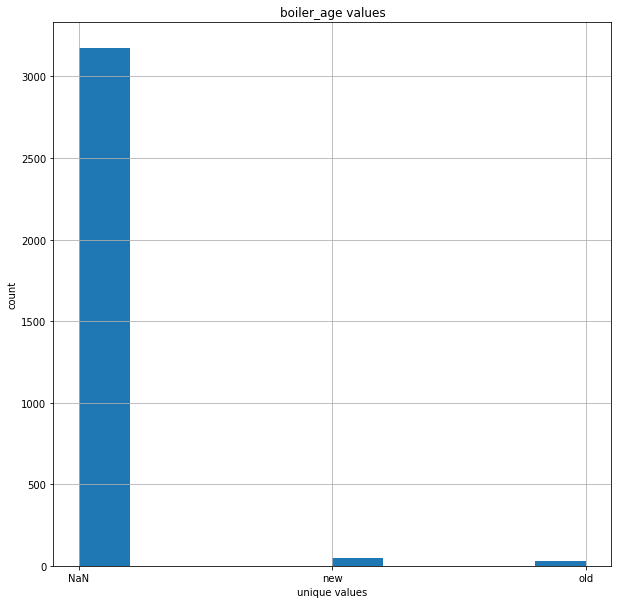

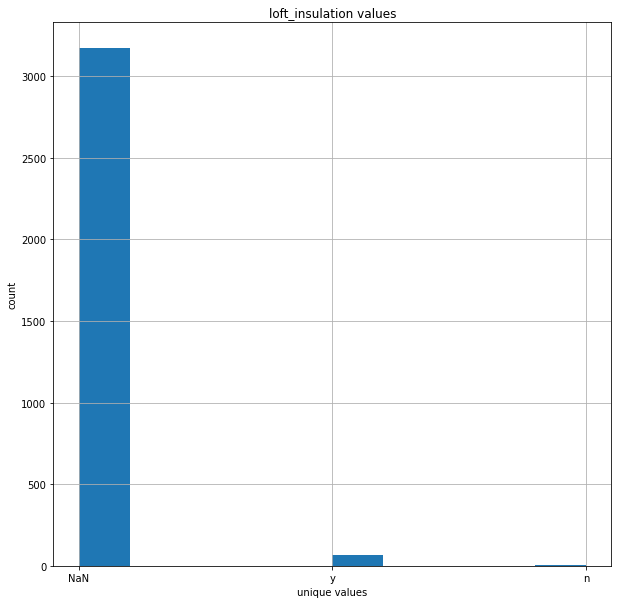

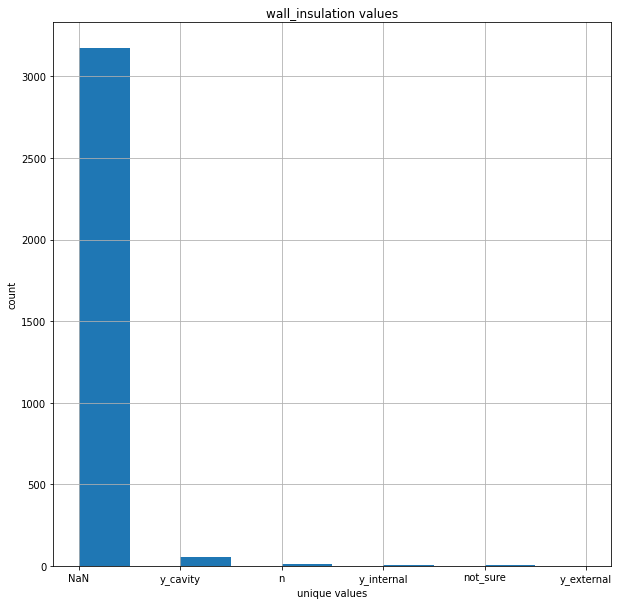

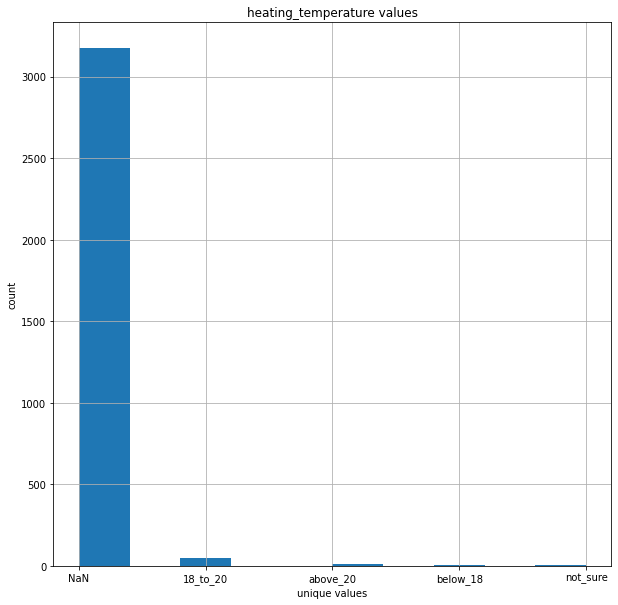

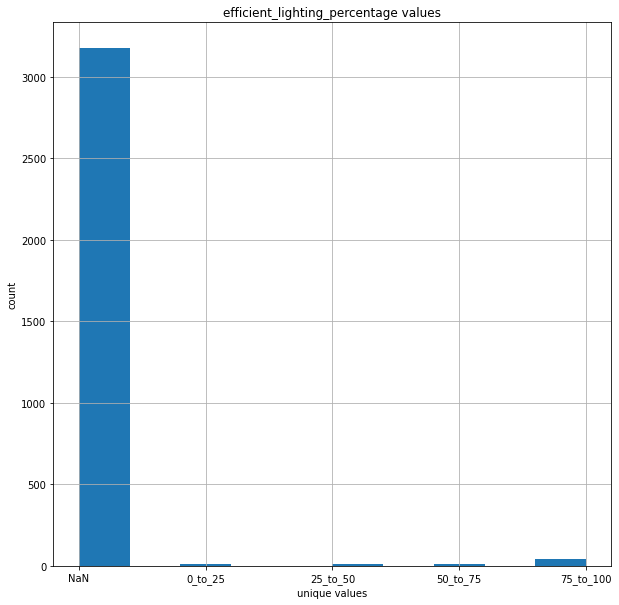

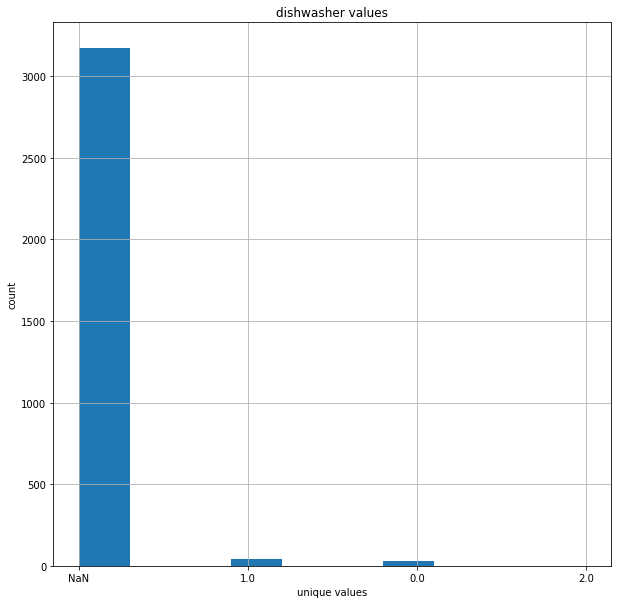

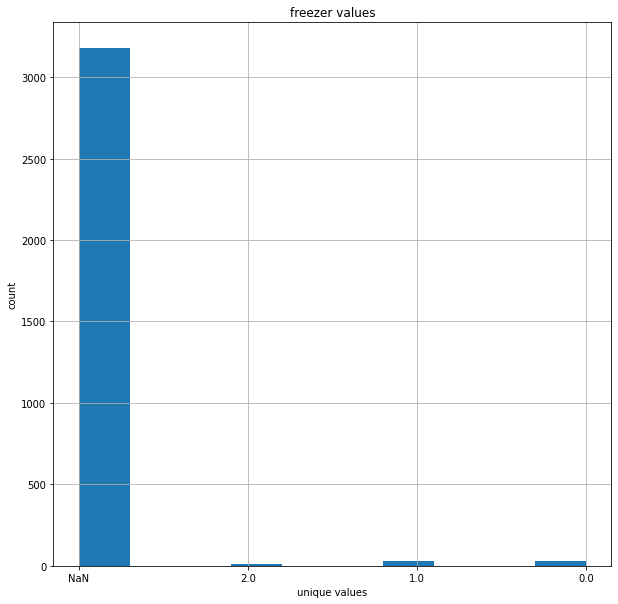

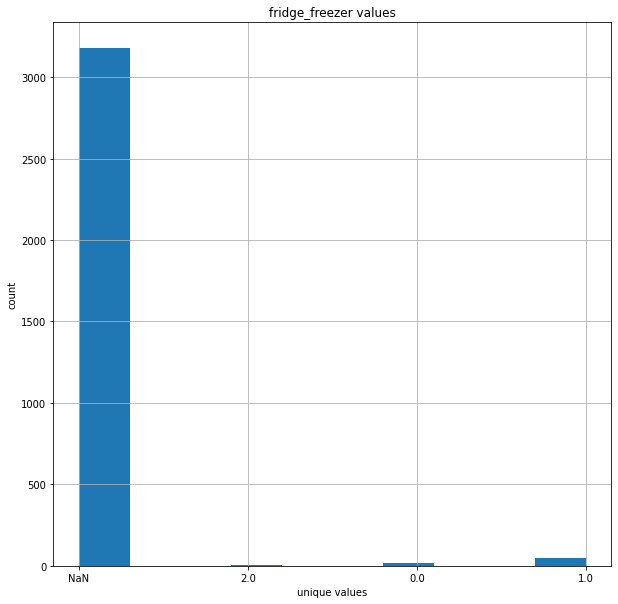

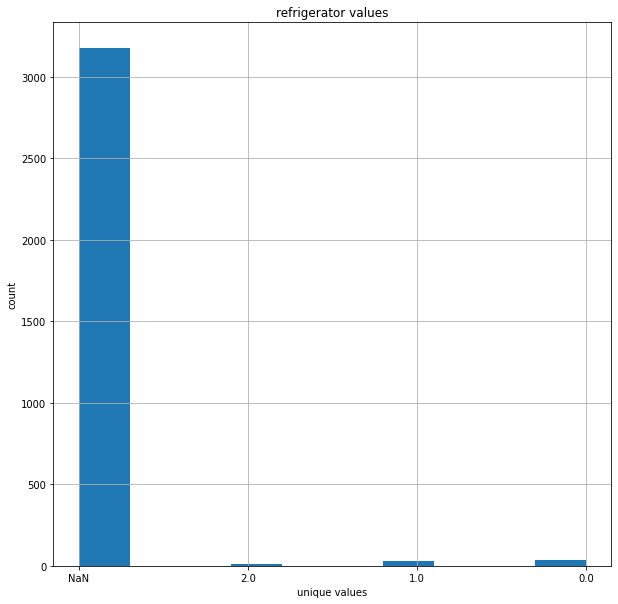

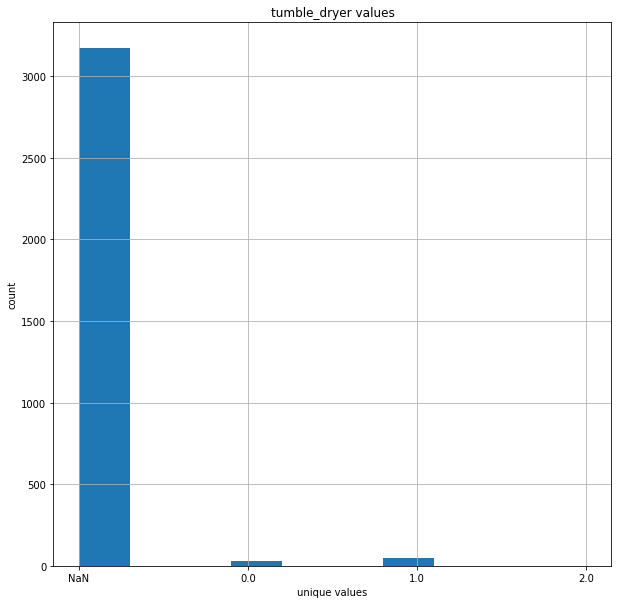

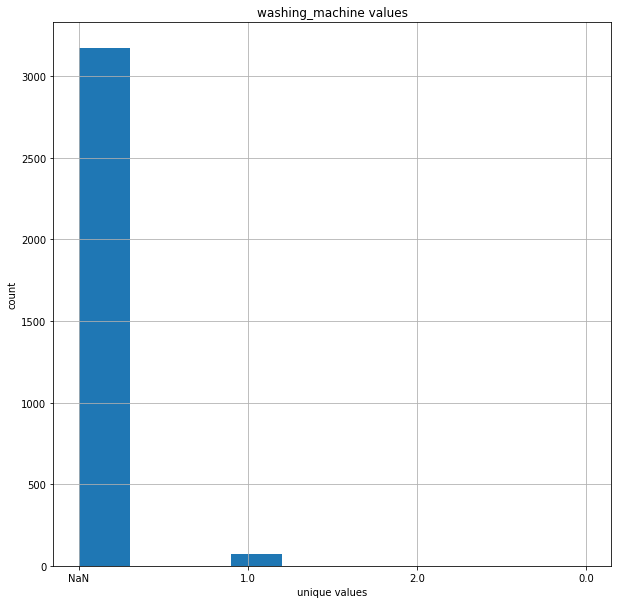

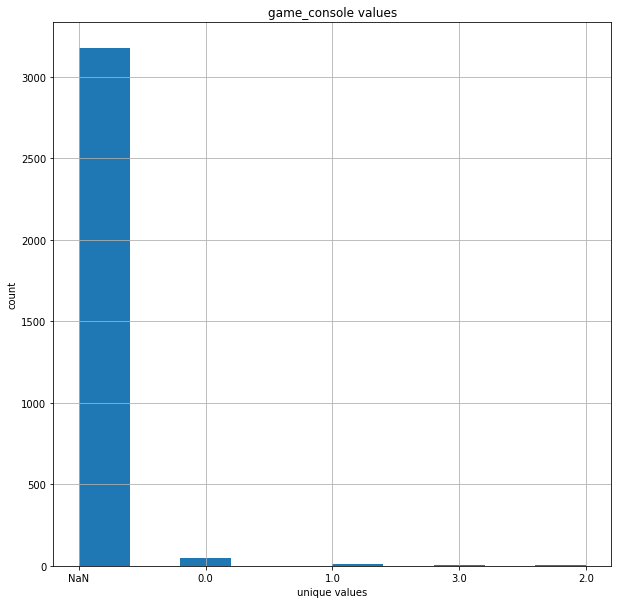

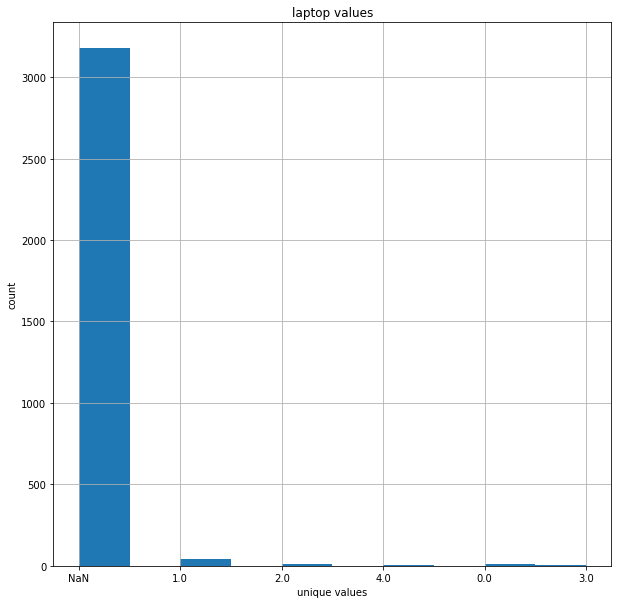

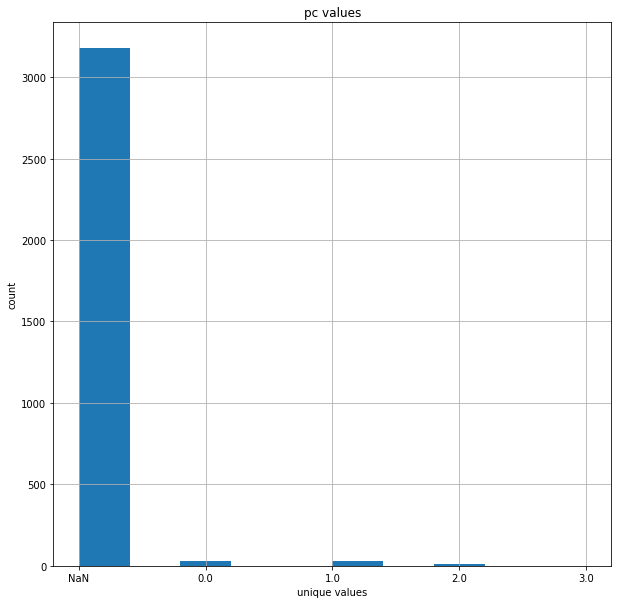

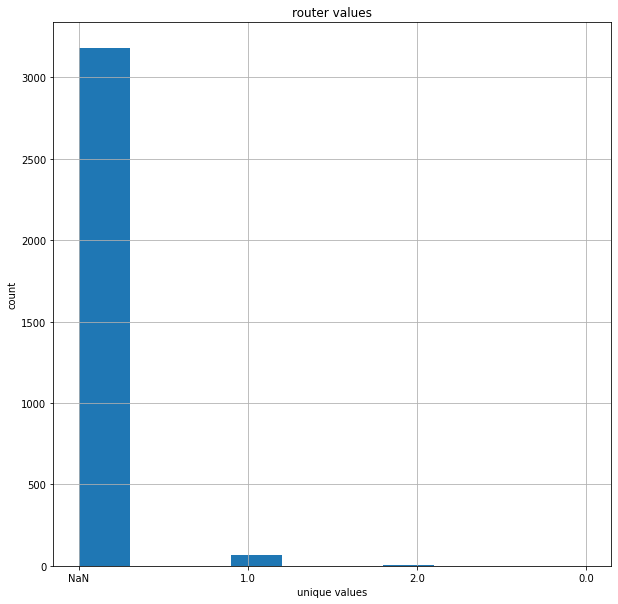

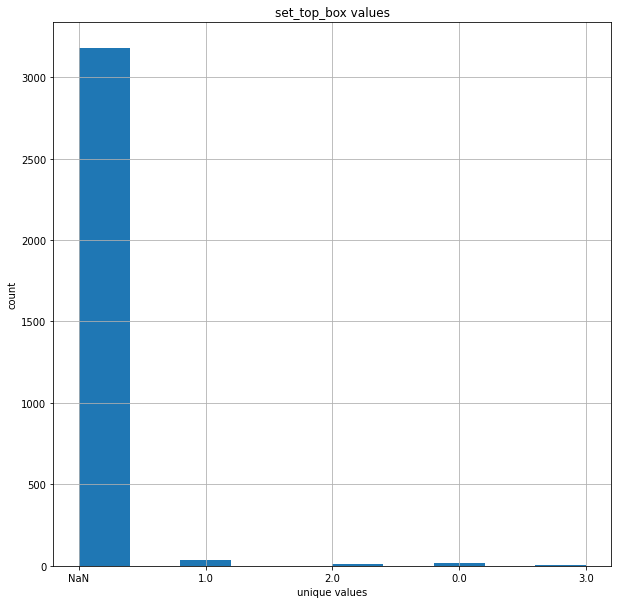

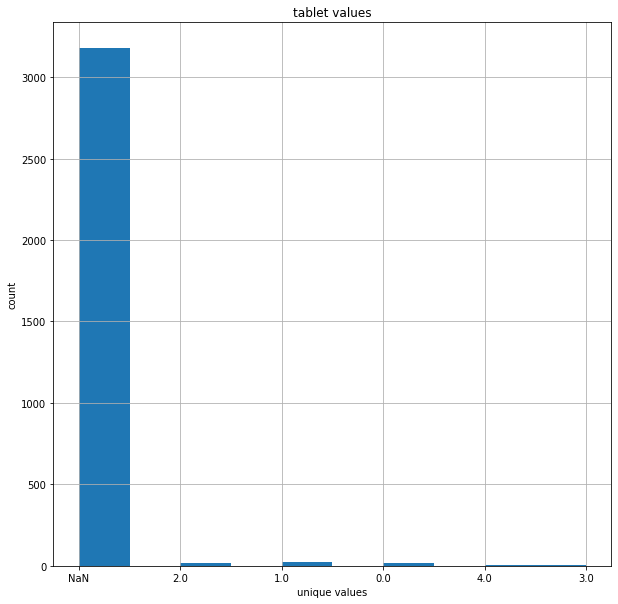

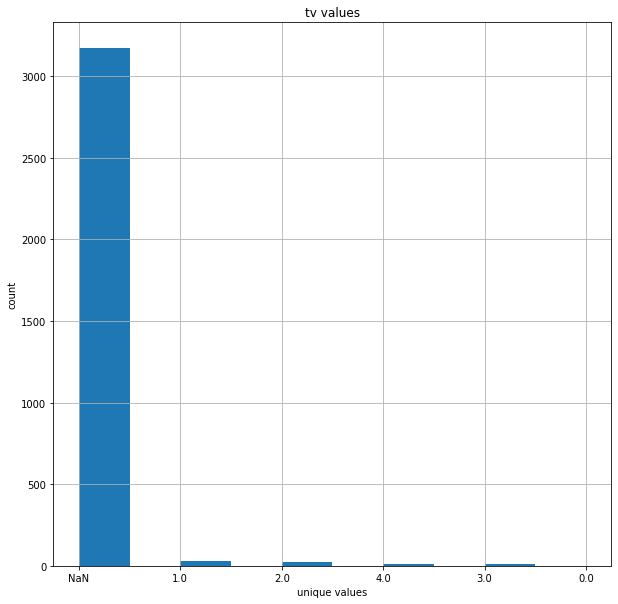

In [46]:
# plotting a histogram for each of the columns in the dataset
for column in df_info_all_meters.drop(["meter_id"],axis=1).columns:
    df_temp = df_info_all_meters[column].replace(np.nan,"NaN").apply(str)
    ax = df_temp.hist(figsize=(10,10))
    ax.set_xlabel("unique values")
    ax.set_ylabel("count")
    fig = ax.get_figure()
    plt.title(column+" values")
    plt.show(block=False)
    
#     if(os.path.exists(f"../EDA/plots/addInfo/{column}_hist.png")==False):
#         fig.savefig(f"../EDA/plots/addInfo/{column}_hist.png")
    fig.savefig(f"../EDA/plots/addInfo/{column}_hist.png")
            
    plt.close(fig)

### Calculating percentage of missing values for each column

In [47]:
# Calculating percentage of missing values
#stores index of columns to keep: defaults all to true and will check which to make false
columns = np.full((df_info_all_meters.shape[1],), True, dtype=bool)

# getting the count of each object type in each column
for i in range(0,len(df_info_all_meters.columns)):
    column =df_info_all_meters.columns[i]
    #calculating the percentage of missing values
    percent_missing = df_info_all_meters[column].isnull().sum() * 100 / len(df_info_all_meters)
    print(column+" contains missing values: "+str(df_info_all_meters[column].isna().values.any()))
    print(column+" is missing: "+str(round(percent_missing,2))+"%")
    
    #if the percentage of missing values is greater than 50% mark them to be removed
    if(percent_missing>=50):
        print("Marked ",column,"for removal due to it having more than 50% missing values")
        columns[i] = False
    else:
        print("Not marked ",column,"for removal due to it not having more than 50% missing values")
    print()

meter_id contains missing values: False
meter_id is missing: 0.0%
Not marked  meter_id for removal due to it not having more than 50% missing values

dwelling_type contains missing values: True
dwelling_type is missing: 47.6%
Not marked  dwelling_type for removal due to it not having more than 50% missing values

num_occupants contains missing values: True
num_occupants is missing: 97.72%
Marked  num_occupants for removal due to it having more than 50% missing values

num_bedrooms contains missing values: True
num_bedrooms is missing: 42.76%
Not marked  num_bedrooms for removal due to it not having more than 50% missing values

heating_fuel contains missing values: True
heating_fuel is missing: 97.6%
Marked  heating_fuel for removal due to it having more than 50% missing values

hot_water_fuel contains missing values: True
hot_water_fuel is missing: 97.66%
Marked  hot_water_fuel for removal due to it having more than 50% missing values

boiler_age contains missing values: True
boiler_a

#### Meaning of findings;
* As the histograms and calculations show: there is a massive amount of missing values
* Marked all columns with > 50% missing values for removal
    * as if more than half of the values are missing it is likely what we do impute won't be accurate
* Need to decide what to do with the the remaining 2 as they have 40% missing values: is this good enough?
    * Will likely require experimentation:
        * So will allow hyper parameter optimisation to determine this for us
    

## Removing the columns with greater than 50% missing values

In [48]:
# Removing the columns marked for removal
selected_columns = df_info_all_meters.columns[columns]
df_info_all_meters = df_info_all_meters[selected_columns]

In [49]:
# inspecting the current state of df_info_all_meters
df_info_all_meters

,meter_id,dwelling_type,num_bedrooms
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,semi_detached_house,3.0
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,terraced_house,2.0
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,semi_detached_house,NaN
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,detached_house,4.0
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,NaN,NaN
...,...,...,...
3243,0xdf6a54b92985398af03423426e744c6d40ee8c69,NaN,NaN
3244,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,NaN,NaN
3245,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,NaN,NaN
3246,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN


## Imputing the missing values


### Preparing dataframe for use by KNNImputer
### Adding information on the energy time series data that may be useful for imputing the missing addInfo values
Experimenting with different combinations 9think it may have been too many when I originally used 4 different energy ones and it got weighted too highly skewing it due to the multi collinearity problems

In [50]:
# Calculating the total, mean, max, and min energy usage only using KNOWN values (not including the interpolated ones)
df_energy_info = pd.DataFrame(columns=["meter_id",
                                       "mean_energy_usage",
                                       #"max_energy_usage",
                                       #"min_energy_usage",
                                       "total_energy_usage"
                                      ])
df_energy_info["meter_id"]=df_energy_interpolate_days_interpolate["meter_id"].values
df_energy_info["mean_energy_usage"] = df_energy_interpolate_days_interpolate.replace(0,np.nan).iloc[:, 1:].mean(axis=1).round(3)
#df_energy_info["max_energy_usage"] = df_energy_interpolate_days_interpolate.replace(0,np.nan).iloc[:, 1:].max(axis=1).round(3)
#df_energy_info["min_energy_usage"] = df_energy_interpolate_days_interpolate.replace(0,np.nan).iloc[:, 1:].min(axis=1).round(3)
df_energy_info["total_energy_usage"] = df_energy_interpolate_days_interpolate.replace(0,np.nan).iloc[:, 1:].sum(axis=1).round(3)

In [51]:
df_energy_info#.loc[df_energy_means["meter_id"]=="0xa62b9f23553ff183f61e2bf943aab3d5983d02d7"]

,meter_id,mean_energy_usage,total_energy_usage
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,4.427,128.395
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,19.075,553.184
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,12.721,368.910
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,18.443,534.846
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,32.623,946.064
...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,5.355,1954.530
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,5.858,2050.184
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,5.790,2113.232
3246,0x47218b46abb2fcaade487a211911406dc6e13730,15.208,5550.902


In [52]:
#add the total, mean, max, and min to the df for use with knn imputation
df_info_knn = df_info_all_meters
df_info_knn = df_info_knn.merge(df_energy_info[["meter_id",
                                                "mean_energy_usage",
                                                #"max_energy_usage",
                                                #"min_energy_usage", 
                                                "total_energy_usage"
                                               ]], on="meter_id",how="left")
df_info_knn

,meter_id,dwelling_type,num_bedrooms,mean_energy_usage,total_energy_usage
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,semi_detached_house,3.0,7.431,683.609
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,terraced_house,2.0,5.549,1187.545
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,semi_detached_house,NaN,5.901,1262.712
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,detached_house,4.0,10.788,647.270
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,NaN,NaN,14.060,843.608
...,...,...,...,...,...
3243,0xdf6a54b92985398af03423426e744c6d40ee8c69,NaN,NaN,21.282,7768.098
3244,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,NaN,NaN,18.214,6648.003
3245,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,NaN,NaN,11.914,4348.644
3246,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN,5.355,1954.530


### Dropping meter_id, encoding and normalizing data so it is suitable for KNN Imputation
#### Dropping meter_id

In [53]:
#dropping the id column so it doesn't negatively influence the knn algorithm
meter_id = df_info_knn["meter_id"]
df_info_knn = df_info_knn.drop(["meter_id"], axis=1)

In [54]:
#inspecting the df without the id column
df_info_knn

,dwelling_type,num_bedrooms,mean_energy_usage,total_energy_usage
0,semi_detached_house,3.0,7.431,683.609
1,terraced_house,2.0,5.549,1187.545
2,semi_detached_house,NaN,5.901,1262.712
3,detached_house,4.0,10.788,647.270
4,NaN,NaN,14.060,843.608
...,...,...,...,...
3243,NaN,NaN,21.282,7768.098
3244,NaN,NaN,18.214,6648.003
3245,NaN,NaN,11.914,4348.644
3246,NaN,NaN,5.355,1954.530


#### Encoding the categorical values ready for knn

In [55]:
df_info_knn_encoded = df_info_knn
df_info_knn_encoded["dwelling_type"]=df_info_knn_encoded["dwelling_type"].replace("flat",0).replace("terraced_house",1).replace("semi_detached_house",2).replace("detached_house",3).replace("bungalow",4)

In [56]:
df_info_knn_encoded

,dwelling_type,num_bedrooms,mean_energy_usage,total_energy_usage
0,2.0,3.0,7.431,683.609
1,1.0,2.0,5.549,1187.545
2,2.0,NaN,5.901,1262.712
3,3.0,4.0,10.788,647.270
4,NaN,NaN,14.060,843.608
...,...,...,...,...
3243,NaN,NaN,21.282,7768.098
3244,NaN,NaN,18.214,6648.003
3245,NaN,NaN,11.914,4348.644
3246,NaN,NaN,5.355,1954.530


#### Normalizing the data

In [57]:
# Normalizing the data as KNN is done via a distance measure and we don't want to skew it
scaler = MinMaxScaler()
df_info_knn_normalized = pd.DataFrame(scaler.fit_transform(df_info_knn_encoded), columns = df_info_knn_encoded.columns)

# inspecting new state of the dataframe after normalisation
df_info_knn_normalized

,dwelling_type,num_bedrooms,mean_energy_usage,total_energy_usage
0,0.50,0.50,0.101329,0.038190
1,0.25,0.25,0.075061,0.066343
2,0.50,NaN,0.079974,0.070542
3,0.75,0.75,0.148183,0.036160
4,NaN,NaN,0.193850,0.047129
...,...,...,...,...
3243,NaN,NaN,0.294649,0.433968
3244,NaN,NaN,0.251828,0.371394
3245,NaN,NaN,0.163899,0.242939
3246,NaN,NaN,0.072354,0.109191


### Now data is prepared, using KNN to impute the missing values
* Experiment with different numbers for nearest neighbours

In [58]:
# now using KNN to impute the missing values
imputer = KNNImputer(n_neighbors=5)
df_info_knn_imputed = pd.DataFrame(imputer.fit_transform(df_info_knn_normalized),columns = df_info_knn_normalized.columns)

# inspecting new state of the dataset now it no longer has missing values
df_info_knn_imputed

,dwelling_type,num_bedrooms,mean_energy_usage,total_energy_usage
0,0.50,0.50,0.101329,0.038190
1,0.25,0.25,0.075061,0.066343
2,0.50,0.60,0.079974,0.070542
3,0.75,0.75,0.148183,0.036160
4,0.55,0.55,0.193850,0.047129
...,...,...,...,...
3243,0.50,0.70,0.294649,0.433968
3244,0.85,0.60,0.251828,0.371394
3245,0.60,0.55,0.163899,0.242939
3246,0.45,0.40,0.072354,0.109191


In [59]:
# checking it no longer has missing values
df_info_knn_imputed.isna().any()

dwelling_type         False
num_bedrooms          False
mean_energy_usage     False
total_energy_usage    False
dtype: bool

In [60]:
# looking at sum of missing values
df_info_knn_imputed.isna().sum()

dwelling_type         0
num_bedrooms          0
mean_energy_usage     0
total_energy_usage    0
dtype: int64

#### Turning these imputed values to usable values

In [61]:
#Unnormalsing the data
df_info_knn_imputed.columns[1:] #ignoring meter id as that wasn't normalized
df_info_knn_finished = pd.DataFrame(scaler.inverse_transform(df_info_knn_imputed), columns = df_info_knn_imputed.columns) # reversing the normalization

In [62]:
# viewing the unormalised data
df_info_knn_finished

,dwelling_type,num_bedrooms,mean_energy_usage,total_energy_usage
0,2.0,3.0,7.431,683.609
1,1.0,2.0,5.549,1187.545
2,2.0,3.4,5.901,1262.712
3,3.0,4.0,10.788,647.270
4,2.2,3.2,14.060,843.608
...,...,...,...,...
3243,2.0,3.8,21.282,7768.098
3244,3.4,3.4,18.214,6648.003
3245,2.4,3.2,11.914,4348.644
3246,1.8,2.6,5.355,1954.530


In [63]:
#rounding bedrooms to their final value
num_bedrooms=df_info_knn_finished["num_bedrooms"].round() 

In [64]:
#rounding dwelling type to a real value
df_dwellings=df_info_knn_finished["dwelling_type"].round() 
#reverting the encoding
df_dwellings=df_dwellings.replace(0, "flat").replace(1, "terraced_house").replace(2, "semi_detached_house").replace(3, "detached_house").replace(4, "bungalow")


In [65]:
#concatenating the meter_id, number of bedrooms, and dwellings columns
df_info_knn_finished = pd.concat([meter_id, num_bedrooms, df_dwellings], axis=1)

In [66]:
#inspecting the final configuration of the knn imputed values
df_info_knn_finished

,meter_id,num_bedrooms,dwelling_type
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,3.0,semi_detached_house
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,2.0,terraced_house
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,3.0,semi_detached_house
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,4.0,detached_house
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,3.0,semi_detached_house
...,...,...,...
3243,0xdf6a54b92985398af03423426e744c6d40ee8c69,4.0,semi_detached_house
3244,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,3.0,detached_house
3245,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,3.0,semi_detached_house
3246,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,3.0,semi_detached_house


## Checking the unique values are the same as the original set

In [67]:
#looking at the unique values for each column before imputation
print("Unique values before imputation")

print("num_bedrooms unique value count: "+str(df_info_all_meters["num_bedrooms"].nunique()))
print(df_info_all_meters["num_bedrooms"].unique())
print()
print("dwelling_type unique value count: "+str(df_info_all_meters["dwelling_type"].nunique()))
print(df_info_all_meters["dwelling_type"].unique())
print()

Unique values before imputation
num_bedrooms unique value count: 5
[ 3.  2. nan  4.  5.  1.]

dwelling_type unique value count: 5
['semi_detached_house' 'terraced_house' 'detached_house' nan 'bungalow'
 'flat']



In [68]:
#looking at the unique values for each column before imputation
print("Unique values after imputation\n")

print("num_bedrooms unique value count: "+str(df_info_knn_finished["num_bedrooms"].nunique()))
print(df_info_knn_finished["num_bedrooms"].unique())
print()
print("dwelling_type unique value count: "+str(df_info_knn_finished["dwelling_type"].nunique()))
print(df_info_knn_finished["dwelling_type"].unique())
print()

Unique values after imputation

num_bedrooms unique value count: 5
[3. 2. 4. 5. 1.]

dwelling_type unique value count: 5
['semi_detached_house' 'terraced_house' 'detached_house' 'bungalow' 'flat']



## Comparing the distribution of unique values that were distributed to the original

In [69]:
#looking at percentage distribution of values before imputation
print("Distribution of unique values before imputation")
print()

num_bedrooms_percentages = df_info_all_meters['num_bedrooms'].value_counts(normalize=True) * 100
print("num_bedrooms percentages")
print(num_bedrooms_percentages)
print()
print("num_bedrooms totals")
print(df_info_all_meters['num_bedrooms'].value_counts())
print()
print()

dwelling_type_percentages = df_info_all_meters['dwelling_type'].value_counts(normalize=True) * 100
print("dwelling_type percentages")
print(dwelling_type_percentages)
print()
print("dwelling_type totals")
print(df_info_all_meters['dwelling_type'].value_counts())

Distribution of unique values before imputation

num_bedrooms percentages
3.0    62.506724
4.0    18.396988
2.0    14.039806
5.0     4.249597
1.0     0.806885
Name: num_bedrooms, dtype: float64

num_bedrooms totals
3.0    1162
4.0     342
2.0     261
5.0      79
1.0      15
Name: num_bedrooms, dtype: int64


dwelling_type percentages
semi_detached_house    38.719154
detached_house         21.974148
terraced_house         18.331375
bungalow               17.215041
flat                    3.760282
Name: dwelling_type, dtype: float64

dwelling_type totals
semi_detached_house    659
detached_house         374
terraced_house         312
bungalow               293
flat                    64
Name: dwelling_type, dtype: int64


In [70]:
#looking at percentage distribution of values after imputation
print("Distribution of unique values after imputation")
print()

num_bedrooms_percentages = df_info_knn_finished['num_bedrooms'].value_counts(normalize=True) * 100
print("num_bedrooms percentages")
print(num_bedrooms_percentages)
print()
print("num_bedrooms totals")
print(df_info_knn_finished['num_bedrooms'].value_counts())
print()
print()

dwelling_type_percentages = df_info_knn_finished['dwelling_type'].value_counts(normalize=True) * 100
print("dwelling_type percentages")
print(dwelling_type_percentages)
print()
print("dwelling_type totals")
print(df_info_knn_finished['dwelling_type'].value_counts())
print()

Distribution of unique values after imputation

num_bedrooms percentages
3.0    70.935961
4.0    16.133005
2.0    10.036946
5.0     2.432266
1.0     0.461823
Name: num_bedrooms, dtype: float64

num_bedrooms totals
3.0    2304
4.0     524
2.0     326
5.0      79
1.0      15
Name: num_bedrooms, dtype: int64


dwelling_type percentages
semi_detached_house    50.862069
detached_house         25.862069
terraced_house         12.068966
bungalow                9.236453
flat                    1.970443
Name: dwelling_type, dtype: float64

dwelling_type totals
semi_detached_house    1652
detached_house          840
terraced_house          392
bungalow                300
flat                     64
Name: dwelling_type, dtype: int64



##### Conclusions:
* Hasn't imputed any meters to be a flat
* Hasn't imputed any meters to have 1 or 5 bedrooms
* Has essentially increased the % divide
    * Higher % represented classes were more likely to be picked
    * Whilst lower % represented classes were less likely to be picked 
* Expected behaviour but is this useful and has it imputed accurately?
* As mentioned already will experiment and see if using these meters or not improves performance more
    * From this we can infer if this was effective or not

## Plotting hists of the imputed addInfo
plotting hists of the imputed addInfo columns before and after imputation to compare their patterns

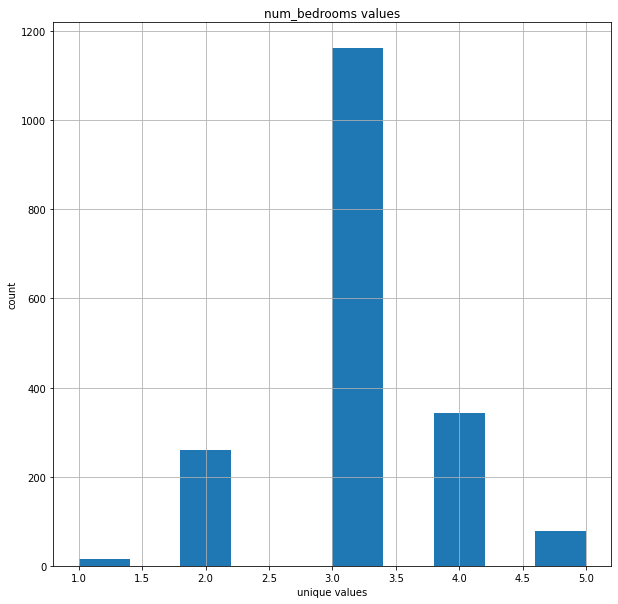

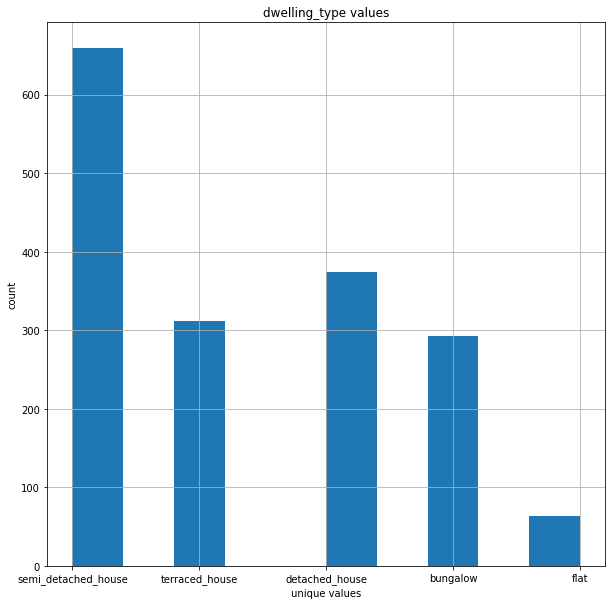

In [71]:
# plotting a histogram for each of the imputed columns in the dataset before imputation
for column in df_info_knn_finished.drop(["meter_id"],axis=1).columns:
    df_temp = df_info_all_meters[column]
    ax = df_temp.hist(figsize=(10,10))
    ax.set_xlabel("unique values")
    ax.set_ylabel("count")
    fig = ax.get_figure()
    plt.title(column+" values")
    plt.show(block=False)
    
#     if(os.path.exists(f"../EDA/plots/addInfo/Pre-Imputation/{column}_preimp_hist.png")==False):
#         fig.savefig(f"../EDA/plots/addInfo/Pre-Imputation/{column}_preimp_hist.png")
    fig.savefig(f"../EDA/plots/addInfo/Pre-Imputation/{column}_preimp_hist.png")
    
    plt.close(fig)

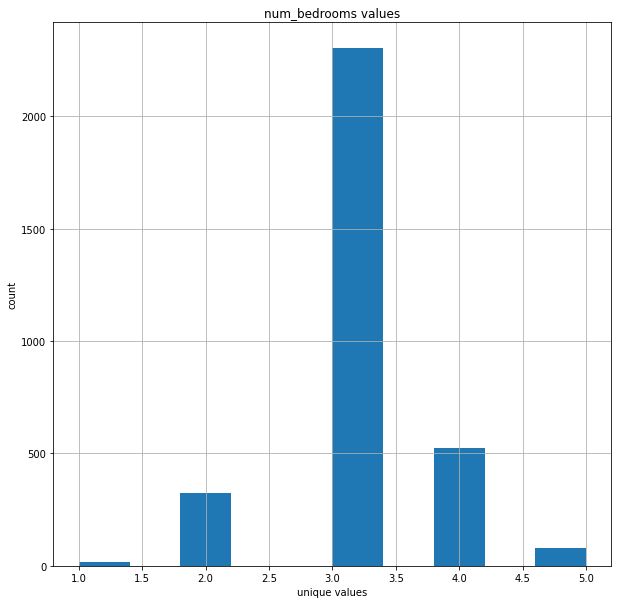

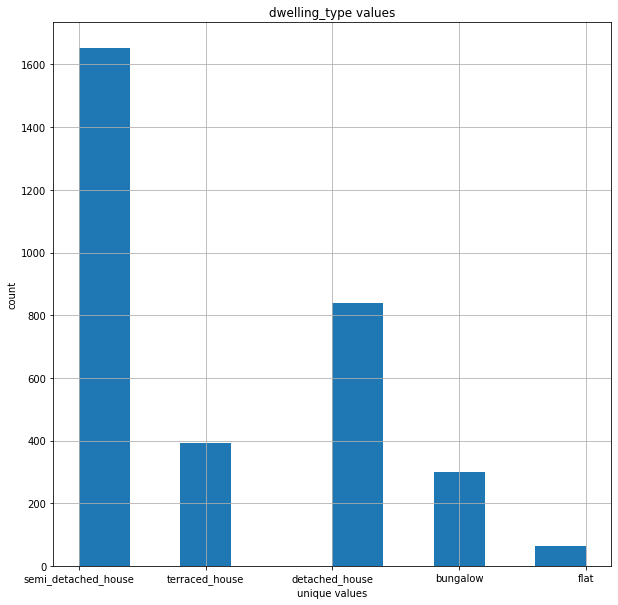

In [72]:
# plotting a histogram for each of the columns in the dataset after imputation
for column in df_info_knn_finished.drop(["meter_id"],axis=1).columns:
    df_temp = df_info_knn_finished[column]
    ax = df_temp.hist(figsize=(10,10))
    ax.set_xlabel("unique values")
    ax.set_ylabel("count")
    fig = ax.get_figure()
    plt.title(column+" values")
    plt.show(block=False)
    
#     if(os.path.exists(f"../EDA/plots/addInfo/Imputed/{column}_imp_hist.png")==False):
#         fig.savefig(f"../EDA/plots/addInfo/Imputed/{column}_imp_hist.png")
    fig.savefig(f"../EDA/plots/addInfo/Imputed/{column}_imp_hist.png")
        
    plt.close(fig)

## OneHot Encoding for models which cannot handle categorical features

In [73]:
#encoding the categorical values via one hot encoding
cat_variables = df_info_knn_finished[df_info_knn_finished.loc[:,df_info_knn_finished.columns!="meter_id"].select_dtypes(include=['object']).columns] # getting the categorical columns (just 'dwelling_type')
cat_dummies = pd.get_dummies(cat_variables, drop_first=True, dummy_na=True) # getting dummies, including a separate one for na

#setting nan rows and droppoing nan column
cat_dummies.loc[cat_dummies.dwelling_type_nan==1, ["dwelling_type_detached_house","dwelling_type_flat","dwelling_type_semi_detached_house","dwelling_type_terraced_house"]]=np.nan
cat_dummies=cat_dummies.drop("dwelling_type_nan",axis=1)
cat_dummies

,dwelling_type_detached_house,dwelling_type_flat,dwelling_type_semi_detached_house,dwelling_type_terraced_house
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
3243,0.0,0.0,1.0,0.0
3244,1.0,0.0,0.0,0.0
3245,0.0,0.0,1.0,0.0
3246,0.0,0.0,1.0,0.0


In [74]:
df_info_knn_finished

,meter_id,num_bedrooms,dwelling_type
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,3.0,semi_detached_house
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,2.0,terraced_house
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,3.0,semi_detached_house
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,4.0,detached_house
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,3.0,semi_detached_house
...,...,...,...
3243,0xdf6a54b92985398af03423426e744c6d40ee8c69,4.0,semi_detached_house
3244,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,3.0,detached_house
3245,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,3.0,semi_detached_house
3246,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,3.0,semi_detached_house


In [75]:
# dropping the original columns then adding the dummy values
#df_info_knn_finished = df_info_knn_finished.drop(df_info_knn_finished.loc[:,df_info_knn_finished.columns!="meter_id"].select_dtypes(include=['object']).columns, axis=1)
df_info_knn_finished = pd.concat([df_info_knn_finished, cat_dummies], axis=1)
# inspecting new state of the dataframe with the dummy variables
df_info_knn_finished

,meter_id,num_bedrooms,dwelling_type,dwelling_type_detached_house,dwelling_type_flat,dwelling_type_semi_detached_house,dwelling_type_terraced_house
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,3.0,semi_detached_house,0.0,0.0,1.0,0.0
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,2.0,terraced_house,0.0,0.0,0.0,1.0
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,3.0,semi_detached_house,0.0,0.0,1.0,0.0
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,4.0,detached_house,1.0,0.0,0.0,0.0
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,3.0,semi_detached_house,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
3243,0xdf6a54b92985398af03423426e744c6d40ee8c69,4.0,semi_detached_house,0.0,0.0,1.0,0.0
3244,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,3.0,detached_house,1.0,0.0,0.0,0.0
3245,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,3.0,semi_detached_house,0.0,0.0,1.0,0.0
3246,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,3.0,semi_detached_house,0.0,0.0,1.0,0.0


## Generating correlation plot of the features to make sure there is minimal redundancy

In [76]:
#generating the correlation matrix
corr_info = df_info_knn_finished.corr()

<AxesSubplot:>

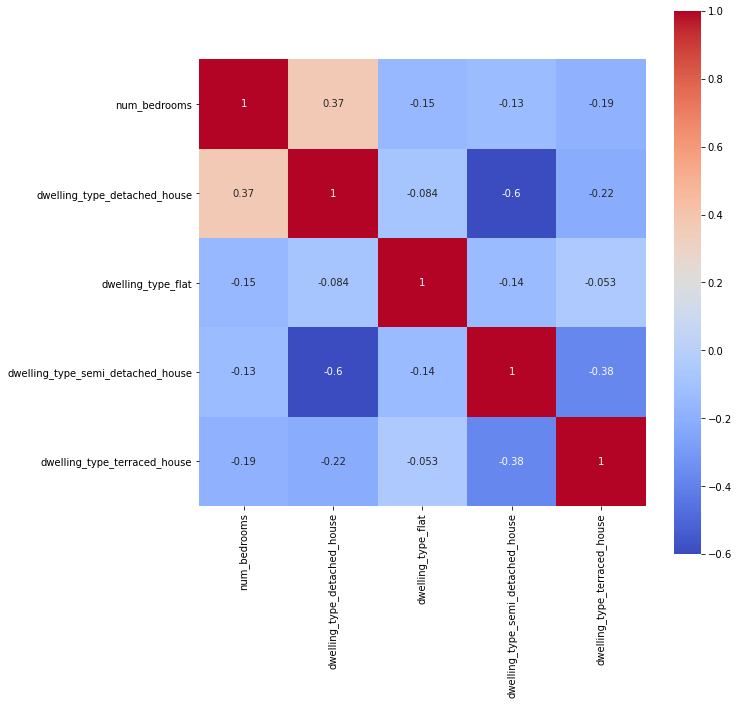

In [77]:
#generating the correlation heat map
plt.figure(figsize=(10, 10))
sns.heatmap(corr_info, cmap="coolwarm", annot=True, square=True)

In [78]:
# for each feature on the x axis
for i in range(corr_info.shape[0]):
    # for each feature after i
    for j in range(i+1, corr_info.shape[0]):
        #check if their correlation is above a threshold % (50%)
        if abs(corr_info.iloc[i,j]) >= 0.5:
            print("\nConsider ",corr_info.columns[j]," for removal as it has a high correlation with ",corr_info.columns[i]," of",round(corr_info.iloc[i,j],2),"\n")
            #set column j to be removed 
            if columns[j]:
                columns[j+1] = False #+1 for meter id
        else: 
            print("Keeping ",corr_info.columns[i]," and ",corr_info.columns[j]," have a correlation of ", round(corr_info.iloc[i,j],2))

Keeping  num_bedrooms  and  dwelling_type_detached_house  have a correlation of  0.37
Keeping  num_bedrooms  and  dwelling_type_flat  have a correlation of  -0.15
Keeping  num_bedrooms  and  dwelling_type_semi_detached_house  have a correlation of  -0.13
Keeping  num_bedrooms  and  dwelling_type_terraced_house  have a correlation of  -0.19
Keeping  dwelling_type_detached_house  and  dwelling_type_flat  have a correlation of  -0.08

Consider  dwelling_type_semi_detached_house  for removal as it has a high correlation with  dwelling_type_detached_house  of -0.6 

Keeping  dwelling_type_detached_house  and  dwelling_type_terraced_house  have a correlation of  -0.22
Keeping  dwelling_type_flat  and  dwelling_type_semi_detached_house  have a correlation of  -0.14
Keeping  dwelling_type_flat  and  dwelling_type_terraced_house  have a correlation of  -0.05
Keeping  dwelling_type_semi_detached_house  and  dwelling_type_terraced_house  have a correlation of  -0.38


##### Features don't have a particularly high correlation; no need to remove them based upon this

## Saving the finished AddInfo

In [79]:
# if(os.path.exists(f"../Data/Preprocessed_Data/addInfo_knn.pkl")==False):
#         df_info_knn_finished.to_pickle(f"../Data/Preprocessed_Data/addInfo_knn.pkl")
df_info_knn_finished.to_pickle(f"../Data/Preprocessed_Data/addInfo_knn.pkl")

# Inspecting the weather data
## Average weather temp

In [80]:
#try to load pickle file as it is quicker
try:
    df_weather_avg = pd.read_pickle("../Data/Original_Data/weather-avg.pkl")
    print("Loading weather-avg via pickle")
# if the file was not found then load the csv then save it to pickle for future loads
except:
    print("Loading weather-avg via csv")
    df_weather_avg = pd.read_csv("../Data/Original_Data/weather-avg.csv")
    df_weather_avg.to_pickle("../Data/Original_Data/weather-avg.pkl")
df_weather_avg

Loading weather-avg via pickle


,meter_id,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-14 00:00:00,2017-01-15 00:00:00,2017-01-16 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-21 00:00:00,2017-01-22 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,...,2017-12-07 00:00:00,2017-12-08 00:00:00,2017-12-09 00:00:00,2017-12-10 00:00:00,2017-12-11 00:00:00,2017-12-12 00:00:00,2017-12-13 00:00:00,2017-12-14 00:00:00,2017-12-15 00:00:00,2017-12-16 00:00:00,2017-12-17 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-21 00:00:00,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,4.904167,1.275000,2.225000,4.266667,0.262500,1.570833,7.833333,8.391667,6.904167,6.079167,7.030000,3.487500,1.812500,1.579167,5.066667,3.954167,1.562500,1.233333,2.429167,0.008333,0.437500,-1.008333,2.275000,2.783333,...,8.212500,1.525000,-0.254167,-0.058333,0.629167,-1.070833,3.908333,3.029167,2.745833,1.050000,3.412500,2.504167,2.358333,8.658333,9.687500,8.666667,8.370833,8.662500,9.645833,4.008333,1.491667,0.562500,2.925000,9.383333,9.462500
1,0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20,4.904167,1.275000,2.225000,4.266667,0.262500,1.570833,7.833333,8.391667,6.904167,6.079167,7.030000,3.487500,1.812500,1.579167,5.066667,3.954167,1.562500,1.233333,2.429167,0.008333,0.437500,-1.008333,2.275000,2.783333,...,8.212500,1.525000,-0.254167,-0.058333,0.629167,-1.070833,3.908333,3.029167,2.745833,1.050000,3.412500,2.504167,2.358333,8.658333,9.687500,8.666667,8.370833,8.662500,9.645833,4.008333,1.491667,0.562500,2.925000,9.383333,9.462500
2,0x99c6ba65bec5c1e83f8c19f6518178c87732c406,5.391667,1.550000,2.883333,4.691667,0.729167,1.566667,7.650000,8.295833,7.345833,6.320833,7.708333,3.950000,2.395833,1.862500,4.341667,3.800000,1.683333,0.254167,1.262500,0.225000,1.016667,-1.066667,1.820833,2.687500,...,8.162500,1.891667,0.166667,0.016667,1.287500,-0.262500,4.629167,3.225000,3.187500,1.195833,2.433333,2.025000,2.533333,8.708333,9.758333,8.695833,8.595833,8.845833,9.591667,4.545833,2.225000,1.262500,3.308333,9.304167,9.708333
3,0x8f04b8efaa48f13810f51e4b361961226d718ef1,5.250000,1.237500,2.287500,4.612500,0.954167,1.791667,6.745833,7.358333,6.908333,5.645833,7.291667,3.845833,1.858333,1.179167,2.266667,2.895833,1.595833,0.754167,2.416667,1.083333,2.450000,-1.333333,1.537500,1.566667,...,8.087500,1.562500,0.029167,0.679167,2.695833,-0.354167,4.091667,2.537500,3.037500,0.837500,0.900000,1.929167,2.129167,7.987500,9.400000,8.195833,8.429167,8.712500,9.987500,4.270833,2.529167,0.337500,2.225000,8.462500,9.404167
4,0x1a586297008785374c9de5073e7781d14d105bc8,5.370833,1.529167,3.045833,4.341667,0.670833,1.812500,6.745833,7.691667,6.841667,6.195833,7.220833,3.691667,2.045833,1.370833,3.166667,3.487500,2.237500,2.108333,4.033333,1.000000,1.637500,-0.304167,1.962500,2.329167,...,8.187500,1.666667,0.183333,1.329167,2.612500,0.012500,3.895833,3.070833,2.691667,0.795833,1.412500,1.720833,3.333333,8.379167,9.262500,8.612500,7.983333,8.650000,9.841667,4.187500,2.370833,1.187500,1.908333,7.775000,9.270833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0xc4c1141f810a191e586c9518ef7d2be58b6f82a7,4.458333,1.795833,3.983333,5.070833,1.412500,2.570833,7.262500,7.462500,6.395833,6.545833,7.350000,3.129167,2.145833,2.625000,6.258333,5.308333,4.108333,4.987500,5.816667,2.870833,1.987500,0.400000,1.795833,1.583333,...,7.995833,1.241667,0.212500,-0.304167,-0.454167,-0.512500,3.312500,3

In [81]:
#number of missing values before interpolation
print(df_weather_avg.isnull().sum().sum())
print(df_weather_avg.notnull().sum().sum())

1753
1187015


In [82]:
#dropping meter_id
meter_id = df_weather_avg["meter_id"] 
df_weather_avg_interpolate=df_weather_avg.drop("meter_id", axis=1)
#interpolating the days we set to nan due to containing a missing value as acceptNaNs is false
df_weather_avg_interpolate = df_weather_avg_interpolate.interpolate(method="linear", axis=1) 
#adding meter_id back on
df_weather_avg_interpolate = pd.concat([pd.DataFrame(meter_id), df_weather_avg_interpolate],axis=1)

In [83]:
#number of missing values after interpolation
print(df_weather_avg_interpolate.isnull().sum().sum())
print(df_weather_avg_interpolate.notnull().sum().sum())

1
1188767


In [84]:
df_weather_avg_interpolate[["meter_id"]+df_weather_avg_interpolate.columns[df_weather_avg_interpolate.isnull().any()].tolist()][df_weather_avg_interpolate.isna().any(axis=1)]

,meter_id,2017-01-01 00:00:00
3160,0x10da3afaf4033f7f19c700a510c982bc0d749be6,NaN


In [85]:
#only one missing value on the 1st of january for meter 3160
# simply backwards fill it 
df_weather_avg_final = df_weather_avg_interpolate.bfill(axis="columns")

In [86]:
#number of missing values before interpolation
print(df_weather_avg_final.isnull().sum().sum())
print(df_weather_avg_final.notnull().sum().sum())

0
1188768


In [87]:
df_weather_avg_final.to_pickle("../Data/Preprocessed_Data/df_weather_avg_final.pkl")

## Min weather temp

In [88]:
#try to load pickle file as it is quicker
try:
    df_weather = pd.read_pickle("../Data/Original_Data/weather-min.pkl")
    print("Loading weather-min via pickle")
# if the file was not found then load the csv then save it to pickle for future loads
except:
    print("Loading weather-min via csv")
    df_weather = pd.read_csv("../Data/Original_Data/weather-min.csv")
    df_weather.to_pickle("../Data/Original_Data/weather-min.pkl")
df_weather

Loading weather-min via pickle


,meter_id,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-14 00:00:00,2017-01-15 00:00:00,2017-01-16 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-21 00:00:00,2017-01-22 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,...,2017-12-07 00:00:00,2017-12-08 00:00:00,2017-12-09 00:00:00,2017-12-10 00:00:00,2017-12-11 00:00:00,2017-12-12 00:00:00,2017-12-13 00:00:00,2017-12-14 00:00:00,2017-12-15 00:00:00,2017-12-16 00:00:00,2017-12-17 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-21 00:00:00,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,1.7,-1.0,-1.2,0.3,-2.4,-2.5,5.7,7.2,2.9,3.4,4.2,0.6,0.0,-0.3,0.7,2.9,-1.3,-2.1,-1.6,-3.3,-2.9,-5.3,0.0,-0.1,...,2.3,-0.6,-1.8,-2.0,-2.3,-4.3,2.1,1.5,0.7,-1.0,-1.1,-1.2,-1.1,6.4,7.8,7.4,7.9,7.7,5.6,2.8,0.2,-2.0,-2.7,3.8,5.9
1,0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20,1.7,-1.0,-1.2,0.3,-2.4,-2.5,5.7,7.2,2.9,3.4,4.2,0.6,0.0,-0.3,0.7,2.9,-1.3,-2.1,-1.6,-3.3,-2.9,-5.3,0.0,-0.1,...,2.3,-0.6,-1.8,-2.0,-2.3,-4.3,2.1,1.5,0.7,-1.0,-1.1,-1.2,-1.1,6.4,7.8,7.4,7.9,7.7,5.6,2.8,0.2,-2.0,-2.7,3.8,5.9
2,0x99c6ba65bec5c1e83f8c19f6518178c87732c406,2.7,-0.2,-0.6,0.4,-1.3,-2.0,5.6,7.1,4.0,3.8,5.2,1.1,0.5,-0.1,0.9,2.1,-0.5,-2.3,-1.7,-4.0,-2.2,-4.4,-0.8,-0.3,...,2.9,-0.4,-1.3,-2.8,-0.9,-3.8,2.7,1.4,1.4,-0.3,-2.7,-0.8,-1.5,6.8,8.8,7.5,7.9,8.0,7.5,2.9,0.2,-1.3,-2.2,3.9,6.7
3,0x8f04b8efaa48f13810f51e4b361961226d718ef1,2.7,-1.7,-2.6,1.4,-3.2,-3.1,4.9,6.2,1.6,1.9,4.7,1.2,-1.0,-1.0,-0.3,1.2,-1.4,-2.1,-2.5,-3.4,-1.4,-5.7,-0.1,-3.8,...,2.2,-0.8,-1.8,-1.5,0.2,-4.3,0.7,0.4,0.9,-0.9,-5.0,-1.0,-1.4,5.4,8.0,6.4,7.7,7.8,9.1,2.8,0.2,-1.2,-2.5,3.7,6.6
4,0x1a586297008785374c9de5073e7781d14d105bc8,1.3,-0.1,-0.2,1.0,-1.5,-0.7,5.0,6.6,3.1,3.3,4.8,0.5,0.2,-0.5,0.3,2.3,-0.1,0.0,2.8,-2.7,-1.4,-3.4,0.2,-0.9,...,2.8,-0.2,-1.4,-1.8,-0.9,-2.0,0.8,1.4,1.1,-0.2,-2.8,0.3,-0.4,4.7,7.7,7.2,7.1,7.3,8.7,2.7,0.6,-0.2,-1.5,3.3,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0xc4c1141f810a191e586c9518ef7d2be58b6f82a7,2.0,-0.1,-0.6,1.4,-0.4,-0.8,4.6,5.6,3.6,3.2,4.9,0.0,-0.1,-0.6,2.2,3.8,3.6,4.1,5.4,-0.1,-0.6,-3.1,-1.0,-2.2,...,2.3,-0.7,-1.2,-1.9,-2.2,-3.4,0.4,1.8,0.7,-0.4,-1.4,2.3,1.2,6.1,8.5,7.7,7.2,8.0,4.0,2.2,-0.4,-0.8,-2.8,2.8,5.0
3244,0x28fd882b064636f482e87ac651b65e18e6c49b60,0.5,-0.5,0.1,-0.7,-3.3,-2.5,6.6,5.2,3.6,3.9,5.0,-0.1,-0.2,0.7,4.3,5.2,3.8,3.6,4.6,-1.3,-1.9,-2.6,2.2,-0.3,...,2.4,-0.8,-1.1,-1.6,-2.8,-4.9,0.8,1.8,0.7,-0.7,-1.3,0.3,0.0,7.6,8.2,8.3,6.3,7.8,4.2,0.4,0.6,-0.9,-2.2,3.2,4.8
3245,0x95283b7803155b07a4b513f6a382444fab2e3d29,3.5,0.5,1.3,3.0,-0.5,0.7,6.2,4.4,3.5,4.4,2.8,-0.7,-1.1,-1.2,1.0,4.1,3.8,6.3,3.1,1.8,1.1,-0.6,0.3,1.3,...,1.7,-0.9,-2.1,-2.7,-3.2,-1.6,1.1,0.7,0.9,-0.8,-1.4,1.8,4.3,7.7,7.4,6.9,7.7,9.3,3.5,0.1,-0.6,-0.5,-1.8,0.4,3.9
3246,0xd667b5e19b196381d8c1cabb649ddb2cf7e7f0aa,2.7,-2.0,-0.2,0.7,-3.3,-0.4,4.9,6.3,4.5,5.6,4.2,0.3,0.0,-1.1,2.1,7.0,5.2,6.0,6.4,3.2,1.9,0.1,0.6,-1.7,...,3.3,0.3,-2.9,-0.9,-2.8,-5.9,1.1,1.4,-1.2,-3.4,-0.3,-0.5,2.9,6.4,8.2,7.8,6.6,7.2,4.3,1.9,-2.0,-2.4,-2.8,1.6,4.3


In [89]:
#number of missing values before interpolation
print(df_weather.isnull().sum().sum())
print(df_weather.notnull().sum().sum())

1753
1187015


In [90]:
#dropping meter_id
meter_id = df_weather["meter_id"] 
df_weather_interpolate=df_weather.drop("meter_id", axis=1)
#interpolating the days we set to nan due to containing a missing value as acceptNaNs is false
df_weather_interpolate = df_weather_interpolate.interpolate(method="linear", axis=1) 
#adding meter_id back on
df_weather_interpolate = pd.concat([pd.DataFrame(meter_id), df_weather_interpolate],axis=1)

In [91]:
#number of missing values after interpolation
print(df_weather_interpolate.isnull().sum().sum())
print(df_weather_interpolate.notnull().sum().sum())

1
1188767


In [92]:
df_weather_interpolate[["meter_id"]+df_weather_interpolate.columns[df_weather_interpolate.isnull().any()].tolist()][df_weather_interpolate.isna().any(axis=1)]

,meter_id,2017-01-01 00:00:00
3160,0x10da3afaf4033f7f19c700a510c982bc0d749be6,NaN


In [93]:
#only one missing value on the 1st of january for meter 3160
# simply backwards fill it 
df_weather_final = df_weather_interpolate.bfill(axis="columns")

In [94]:
#number of missing values before interpolation
print(df_weather_final.isnull().sum().sum())
print(df_weather_final.notnull().sum().sum())

0
1188768


In [95]:
df_weather_final.to_pickle("../Data/Preprocessed_Data/df_weather_min_final.pkl")

## Max weather temp

In [96]:
#try to load pickle file as it is quicker
try:
    df_weather = pd.read_pickle("../Data/Original_Data/weather-max.pkl")
    print("Loading weather-max via pickle")
# if the file was not found then load the csv then save it to pickle for future loads
except:
    print("Loading weather-max via csv")
    df_weather = pd.read_csv("../Data/Original_Data/weather-max.csv")
    df_weather.to_pickle("../Data/Original_Data/weather-max.pkl")
df_weather

Loading weather-max via pickle


,meter_id,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-14 00:00:00,2017-01-15 00:00:00,2017-01-16 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-21 00:00:00,2017-01-22 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,...,2017-12-07 00:00:00,2017-12-08 00:00:00,2017-12-09 00:00:00,2017-12-10 00:00:00,2017-12-11 00:00:00,2017-12-12 00:00:00,2017-12-13 00:00:00,2017-12-14 00:00:00,2017-12-15 00:00:00,2017-12-16 00:00:00,2017-12-17 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-21 00:00:00,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,7.0,3.8,5.1,6.9,4.7,5.4,9.7,11.1,8.8,8.2,10.0,5.4,4.7,4.1,8.5,6.1,5.0,4.4,6.6,4.9,4.3,4.5,5.3,7.6,...,11.9,3.5,2.4,0.7,1.9,2.7,6.7,5.5,5.0,2.9,9.1,6.1,6.2,10.5,11.2,9.9,9.0,9.5,10.8,5.9,4.7,3.7,7.5,12.4,13.0
1,0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20,7.0,3.8,5.1,6.9,4.7,5.4,9.7,11.1,8.8,8.2,10.0,5.4,4.7,4.1,8.5,6.1,5.0,4.4,6.6,4.9,4.3,4.5,5.3,7.6,...,11.9,3.5,2.4,0.7,1.9,2.7,6.7,5.5,5.0,2.9,9.1,6.1,6.2,10.5,11.2,9.9,9.0,9.5,10.8,5.9,4.7,3.7,7.5,12.4,13.0
2,0x99c6ba65bec5c1e83f8c19f6518178c87732c406,7.4,4.1,5.7,6.4,5.6,5.2,9.0,10.3,9.3,8.3,10.2,5.7,5.6,5.2,8.2,5.2,4.8,4.4,6.1,6.2,4.6,4.2,5.1,8.7,...,11.3,3.6,2.9,0.9,3.3,2.9,6.8,5.8,5.0,3.4,8.6,5.7,6.8,10.4,11.4,9.3,9.2,9.7,10.2,6.1,6.2,3.7,8.0,12.3,12.9
3,0x8f04b8efaa48f13810f51e4b361961226d718ef1,7.3,4.0,5.6,6.4,5.7,4.6,8.5,8.7,9.1,8.7,9.6,5.7,4.9,4.4,4.7,5.1,4.0,3.0,5.6,6.8,4.6,3.8,5.4,6.8,...,11.3,3.5,1.5,2.3,4.6,2.3,6.9,5.0,4.9,3.7,7.9,5.2,5.5,9.9,10.9,9.6,8.8,9.7,10.5,6.9,5.5,3.4,5.6,12.4,12.2
4,0x1a586297008785374c9de5073e7781d14d105bc8,7.3,3.8,5.9,6.6,4.7,4.8,8.0,9.2,8.9,8.7,9.9,5.6,5.2,5.1,7.7,5.2,4.3,3.6,5.0,5.9,4.8,3.0,5.6,7.1,...,11.6,3.8,1.7,3.6,4.9,2.6,6.8,5.4,5.1,3.6,6.9,4.9,8.2,11.4,11.0,10.3,8.8,10.2,10.7,6.1,3.6,3.7,4.4,12.1,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0xc4c1141f810a191e586c9518ef7d2be58b6f82a7,7.5,4.4,7.0,7.0,5.8,5.3,9.3,8.8,8.6,8.0,10.6,5.1,4.8,5.3,9.4,7.8,4.8,6.1,6.4,5.8,3.4,2.7,3.9,5.1,...,11.9,3.0,1.4,0.7,1.9,2.9,6.0,4.9,5.5,3.0,8.0,7.4,6.9,11.5,11.2,11.2,9.2,11.2,10.8,5.6,2.7,4.0,5.1,10.8,11.9
3244,0x28fd882b064636f482e87ac651b65e18e6c49b60,7.2,3.9,5.5,8.1,5.4,6.2,9.9,9.4,8.6,8.0,10.9,5.3,4.0,5.5,8.7,8.4,4.7,5.2,6.4,5.4,2.9,3.8,6.3,8.2,...,11.7,2.1,2.3,0.1,1.1,3.2,5.3,4.6,4.3,5.8,9.3,6.8,8.0,12.4,11.1,9.5,9.1,10.0,10.5,6.3,2.9,4.5,6.2,11.8,11.7
3245,0x95283b7803155b07a4b513f6a382444fab2e3d29,7.5,4.8,7.1,7.2,5.2,7.6,8.3,9.3,8.6,8.2,10.1,3.3,3.2,3.7,7.4,6.4,7.0,8.1,6.5,5.3,4.4,3.0,6.0,7.4,...,11.9,1.5,2.0,2.0,2.2,3.2,5.5,4.3,5.4,2.3,7.0,5.5,11.3,10.6,9.3,10.1,10.4,10.5,10.4,4.6,4.1,2.9,3.3,5.7,8.2
3246,0xd667b5e19b196381d8c1cabb649ddb2cf7e7f0aa,7.3,4.2,6.8,7.4,4.8,5.2,8.7,8.0,8.7,8.6,10.4,5.0,4.9,5.5,8.8,9.3,6.6,7.8,7.4,8.0,4.2,3.3,4.5,6.8,...,11.5,3.2,1.5,1.3,3.0,2.8,5.3,5.1,4.7,1.4,8.8,3.8,6.3,10.0,10.1,9.5,8.6,11.3,10.5,4.3,3.3,4.0,5.9,9.0,10.2


In [97]:
#number of missing values before interpolation
print(df_weather.isnull().sum().sum())
print(df_weather.notnull().sum().sum())

1753
1187015


In [98]:
#dropping meter_id
meter_id = df_weather["meter_id"] 
df_weather_interpolate=df_weather.drop("meter_id", axis=1)
#interpolating the days we set to nan due to containing a missing value as acceptNaNs is false
df_weather_interpolate = df_weather_interpolate.interpolate(method="linear", axis=1) 
#adding meter_id back on
df_weather_interpolate = pd.concat([pd.DataFrame(meter_id), df_weather_interpolate],axis=1)

In [99]:
#number of missing values after interpolation
print(df_weather_interpolate.isnull().sum().sum())
print(df_weather_interpolate.notnull().sum().sum())

1
1188767


In [100]:
df_weather_interpolate[["meter_id"]+df_weather_interpolate.columns[df_weather_interpolate.isnull().any()].tolist()][df_weather_interpolate.isna().any(axis=1)]

,meter_id,2017-01-01 00:00:00
3160,0x10da3afaf4033f7f19c700a510c982bc0d749be6,NaN


In [101]:
#only one missing value on the 1st of january for meter 3160
# simply backwards fill it 
df_weather_final = df_weather_interpolate.bfill(axis="columns")

In [102]:
#number of missing values before interpolation
print(df_weather_final.isnull().sum().sum())
print(df_weather_final.notnull().sum().sum())

0
1188768


In [103]:
df_weather_final.to_pickle("../Data/Preprocessed_Data/df_weather_max_final.pkl")